# Functions

In [1]:
def Kauffmann(x):
    return 0.61/(x-0.05)+1.3

def Kewley(x):
    return 0.61/(x-0.47)+1.19

def Stasinska(x):
    # doing this because apparently math.tanh cant handle arrays
    y = []
    for i in range(len(x)):
        y.append((-30.787+1.1358*x[i]+0.27297*x[i]**2)*math.tanh(5.7409*x[i])-31.093)
    return y

def Schawinski(x):
    return 1.05*x+0.45

def horizontal(x, a):
    return 0*x+a

def vertical(y, a):
    return 0*y+a

# Plots parameters

In [2]:
params = {'font.size': 12,
          'figure.figsize': (8.,6.),
          'axes.labelsize': 18,
          'xtick.labelsize': 18,
          'ytick.labelsize': 18
         }

palette = ['#66c2a5', '#fc8d62', '#8da0cb']

# Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
#sns.set_theme(style="whitegrid")

# Importing data

In [4]:
data_raw = pd.read_csv('../../Data/Match07_smalldoubleclean_emlines.csv')

In [5]:
data_raw

CATAID       OBJID_SDSSDR7  ALPHA_J2000  DELTA_J2000  KRON_RADIUS  \
0      585610  588848899914268877     183.6357    -0.180381          3.5   
1      585622  588848899914334317     183.7372    -0.046642          3.5   
2      585630  588848899914334392     183.8403    -0.045170          3.5   
3      585637  588848899914334460     183.7989    -0.059996          3.5   
4      585667  588848899914399953     183.8874    -0.076773          3.5   
...       ...                 ...          ...          ...          ...   
14326  585409  588848899913810261     182.6236    -0.118058          3.5   
14327  585436  588848899913875691     182.8106    -0.015192          3.5   
14328  585450  588848899913875754     182.8055    -0.045858          3.5   
14329  585465  588848899913941263     182.8369    -0.154758          3.5   
14330  585512  588848899914006854     182.9919    -0.122844          3.5   

       PETRO_RADIUS  MAG_PETRO_u  MAGERR_PETRO_u  FLAGS_u  MAG_PETRO_g  ...  \
0              4.62      21.0320          0.0486        2      19.7814  ...   
1              4.62      20.2965          0.0263        0      18.8096  ...   
2              4.62      20.6158          0.0314        2      19.4969  ...   
3              5.28      21.5860          0.1193        2      19.8666  ...   
4              5.28      21.0229          0.0584        0      19.8678  ...   
...             ...          ...             ...      ...          ...  ...   
14326          5.28      20.4630          0.0418        0      19.7666  ...   
14327          4.62      20.2875          0.0338        2      19.1236  ...   
14328          5.28      20.5160          0.0413        2      19.6846  ...   
14329          5.28      20.5227          0.0387        2      19.7014  ...   
14330          5.94      19.9638          0.0545        2      18.8937  ...   

       MAG_ABSOLUTE_I  MAG_ABSOLUTE_Z  MAG_ABSOLUTE_Y  MAG_ABSOLUTE_J  \
0          -21.790239      -21.937685      -21.534065      -21.671768   
1          -20.539217      -20.850392      -20.399912      -20.425870   
2          -21.501279      -21.632659      -21.099273      -21.082411   
3          -22.577848      -22.980033      -22.429262      -22.649492   
4          -22.788999      -23.247800      -22.647159      -22.757948   
...               ...             ...             ...             ...   
14326      -20.191305      -20.612478      -20.227940      -20.381691   
14327      -20.870720      -20.911356      -20.521808      -20.436937   
14328      -21.427449      -21.770306      -21.332929      -21.604374   
14329      -22.046238      -22.454552      -21.799156      -21.927908   
14330      -20.267385      -20.448234      -19.710976      -19.578869   

       MAG_ABSOLUTE_H  MAG_ABSOLUTE_K  UV_CLASS_YI2011  TYPE  BPT_CLASS  \
0          -21.333374      -21.381876              RSF     3         SF   
1          -20.188683      -19.950501              RSF     3         SF   
2          -20.789069      -20.824911              RSF     3         SF   
3          -22.521685      -22.513193              RSF     3        NaN   
4          -22.620589      -22.781031              RSF     3         SF   
...               ...             ...              ...   ...        ...   
14326      -20.215257      -20.145758              RSF     3      LINER   
14327      -20.165621      -20.073729              RSF     3         SF   
14328      -21.472820      -21.495194              RSF     3         SF   
14329      -21.851561      -21.915446              RSF     3         SF   
14330      -19.555765      -19.197397              RSF     3         SF   

            WHAN_CLASS  
0                   SF  
1                   SF  
2                   SF  
3      Retired/Passive  
4                 sAGN  
...                ...  
14326  Retired/Passive  
14327               SF  
14328               SF  
14329               SF  
14330               SF  

[14331 rows x 164 columns]

# Creating data subsets

In [6]:
# BPT diagrams
data_BPT = data_raw[(data_raw['HA_FLUX_COMP']>0) &
                (data_raw['HB_FLUX_COMP']>0) &
                (data_raw['NIIR_FLUX_COMP']>0) &
                (data_raw['OIIIR_FLUX_COMP']>0)]

data_rsf_BPT = data_BPT[data_BPT['UV_CLASS_YI2011']=='RSF']
data_uvweak_BPT = data_BPT[data_BPT['UV_CLASS_YI2011']=='UV_WEAK']
data_uvupturn_BPT = data_BPT[data_BPT['UV_CLASS_YI2011']=='UV_UPTURN']

# WHAN diagrams
data_WHAN = data_raw[(data_raw['HA_FLUX_COMP']>0) &
                (data_raw['NIIR_FLUX_COMP']>0) &
                (data_raw['HA_EW_COMP']>0)]

data_rsf_WHAN = data_WHAN[data_WHAN['UV_CLASS_YI2011']=='RSF']
data_uvweak_WHAN = data_WHAN[data_WHAN['UV_CLASS_YI2011']=='UV_WEAK']
data_uvupturn_WHAN = data_WHAN[data_WHAN['UV_CLASS_YI2011']=='UV_UPTURN']

In [7]:
# heatmaps
data = data_raw[(data_raw['HA_FLUX_COMP']>0) &
                (data_raw['HB_FLUX_COMP']>0) &
                (data_raw['NIIR_FLUX_COMP']>0) &
                (data_raw['OIIIR_FLUX_COMP']>0) & 
                (data_raw['HA_EW_COMP']>0) & 
                (data_raw['HB_EW_COMP']>0) & 
                (data_raw['D4000N']>0)]

data_rsf = data[data['UV_CLASS_YI2011']=='RSF']
data_uvweak = data[data['UV_CLASS_YI2011']=='UV_WEAK']
data_uvupturn = data[data['UV_CLASS_YI2011']=='UV_UPTURN']

# RSF
heatmap_rsf = {}
heatmap_rsf['NUV-r'] = data_rsf['MAG_AB_NUV'].values - data_rsf['MAG_AB_R'].values
heatmap_rsf['FUV-r'] = data_rsf['MAG_AB_FUV'].values - data_rsf['MAG_AB_R'].values
heatmap_rsf['FUV-NUV'] = data_rsf['MAG_AB_FUV'].values - data_rsf['MAG_AB_NUV'].values
heatmap_rsf['M_NUV'] = data_rsf['MAG_ABSOLUTE_NUV'].values
heatmap_rsf['M_FUV'] = data_rsf['MAG_ABSOLUTE_FUV'].values
heatmap_rsf['M_r'] = data_rsf['MAG_ABSOLUTE_R'].values
heatmap_rsf['log([NII]/HA)'] = np.log10(data_rsf['NIIR_FLUX_COMP'].values / data_rsf['HA_FLUX_COMP'].values)
heatmap_rsf['log([OIII]/HB)'] = np.log10(data_rsf['OIIIR_FLUX_COMP'].values / data_rsf['HB_FLUX_COMP'].values)
heatmap_rsf['EW(HA)'] = data_rsf['HA_EW_COMP'].values
heatmap_rsf['EW(HB)'] = data_rsf['HB_EW_COMP'].values
heatmap_rsf['log([NII]/[OIII])'] = np.log10(data_rsf['NIIR_FLUX_COMP'].values / data_rsf['OIIIR_FLUX_COMP'].values)
heatmap_rsf['D4000N'] = data_rsf['D4000N']

heatmap_rsf_df = pd.DataFrame(heatmap_rsf)

# UV weak
heatmap_uvweak = {}
heatmap_uvweak['NUV-r'] = data_uvweak['MAG_AB_NUV'].values - data_uvweak['MAG_AB_R'].values
heatmap_uvweak['FUV-r'] = data_uvweak['MAG_AB_FUV'].values - data_uvweak['MAG_AB_R'].values
heatmap_uvweak['FUV-NUV'] = data_uvweak['MAG_AB_FUV'].values - data_uvweak['MAG_AB_NUV'].values
heatmap_uvweak['M_NUV'] = data_uvweak['MAG_ABSOLUTE_NUV'].values
heatmap_uvweak['M_FUV'] = data_uvweak['MAG_ABSOLUTE_FUV'].values
heatmap_uvweak['M_r'] = data_uvweak['MAG_ABSOLUTE_R'].values
heatmap_uvweak['log([NII]/HA)'] = np.log10(data_uvweak['NIIR_FLUX_COMP'].values / data_uvweak['HA_FLUX_COMP'].values)
heatmap_uvweak['log([OIII]/HB)'] = np.log10(data_uvweak['OIIIR_FLUX_COMP'].values / data_uvweak['HB_FLUX_COMP'].values)
heatmap_uvweak['EW(HA)'] = data_uvweak['HA_EW_COMP'].values
heatmap_uvweak['EW(HB)'] = data_uvweak['HB_EW_COMP'].values
heatmap_uvweak['log([NII]/[OIII])'] = np.log10(data_uvweak['NIIR_FLUX_COMP'].values / data_uvweak['OIIIR_FLUX_COMP'].values)
heatmap_uvweak['D4000N'] = data_uvweak['D4000N']

heatmap_uvweak_df = pd.DataFrame(heatmap_uvweak)

# UV upturn
heatmap_uvupturn = {}
heatmap_uvupturn['NUV-r'] = data_uvupturn['MAG_AB_NUV'].values - data_uvupturn['MAG_AB_R'].values
heatmap_uvupturn['FUV-r'] = data_uvupturn['MAG_AB_FUV'].values - data_uvupturn['MAG_AB_R'].values
heatmap_uvupturn['FUV-NUV'] = data_uvupturn['MAG_AB_FUV'].values - data_uvupturn['MAG_AB_NUV'].values
heatmap_uvupturn['M_NUV'] = data_uvupturn['MAG_ABSOLUTE_NUV'].values
heatmap_uvupturn['M_FUV'] = data_uvupturn['MAG_ABSOLUTE_FUV'].values
heatmap_uvupturn['M_r'] = data_uvupturn['MAG_ABSOLUTE_R'].values
heatmap_uvupturn['log([NII]/HA)'] = np.log10(data_uvupturn['NIIR_FLUX_COMP'].values / data_uvupturn['HA_FLUX_COMP'].values)
heatmap_uvupturn['log([OIII]/HB)'] = np.log10(data_uvupturn['OIIIR_FLUX_COMP'].values / data_uvupturn['HB_FLUX_COMP'].values)
heatmap_uvupturn['EW(HA)'] = data_uvupturn['HA_EW_COMP'].values
heatmap_uvupturn['EW(HB)'] = data_uvupturn['HB_EW_COMP'].values
heatmap_uvupturn['log([NII]/[OIII])'] = np.log10(data_uvupturn['NIIR_FLUX_COMP'].values / data_uvupturn['OIIIR_FLUX_COMP'].values)
heatmap_uvupturn['D4000N'] = data_uvupturn['D4000N']

heatmap_uvupturn_df = pd.DataFrame(heatmap_uvupturn)

In [8]:
# individual plots
data_NII_HA = data_raw[(data_raw['HA_FLUX_COMP']>0) &
                       (data_raw['NIIR_FLUX_COMP']>0)]
data_OIII_HB = data_raw[(data_raw['HB_FLUX_COMP']>0) &
                        (data_raw['OIIIR_FLUX_COMP']>0)]
data_EW_HA = data_raw[data_raw['HA_EW_COMP']>0]
data_EW_HB = data_raw[data_raw['HB_EW_COMP']>0]
data_NII_OIII = data_raw[(data_raw['OIIIR_FLUX_COMP']>0) &
                       (data_raw['NIIR_FLUX_COMP']>0)]
data_DN4000 = data_raw[data_raw['D4000N']>0]

# RSF
data_NII_HA_rsf = data_NII_HA[data_NII_HA['UV_CLASS_YI2011']=='RSF']
data_OIII_HB_rsf = data_OIII_HB[data_OIII_HB['UV_CLASS_YI2011']=='RSF']
data_EW_HA_rsf = data_EW_HA[data_EW_HA['UV_CLASS_YI2011']=='RSF']
data_EW_HB_rsf = data_EW_HB[data_EW_HB['UV_CLASS_YI2011']=='RSF']
data_NII_OIII_rsf = data_NII_OIII[data_NII_OIII['UV_CLASS_YI2011']=='RSF']
data_DN4000_rsf = data_DN4000[data_DN4000['UV_CLASS_YI2011']=='RSF']

# UV weak
data_NII_HA_uvweak = data_NII_HA[data_NII_HA['UV_CLASS_YI2011']=='UV_WEAK']
data_OIII_HB_uvweak = data_OIII_HB[data_OIII_HB['UV_CLASS_YI2011']=='UV_WEAK']
data_EW_HA_uvweak = data_EW_HA[data_EW_HA['UV_CLASS_YI2011']=='UV_WEAK']
data_EW_HB_uvweak = data_EW_HB[data_EW_HB['UV_CLASS_YI2011']=='UV_WEAK']
data_NII_OIII_uvweak = data_NII_OIII[data_NII_OIII['UV_CLASS_YI2011']=='UV_WEAK']
data_DN4000_uvweak = data_DN4000[data_DN4000['UV_CLASS_YI2011']=='UV_WEAK']

# UV upturn
data_NII_HA_uvupturn = data_NII_HA[data_NII_HA['UV_CLASS_YI2011']=='UV_UPTURN']
data_OIII_HB_uvupturn = data_OIII_HB[data_OIII_HB['UV_CLASS_YI2011']=='UV_UPTURN']
data_EW_HA_uvupturn = data_EW_HA[data_EW_HA['UV_CLASS_YI2011']=='UV_UPTURN']
data_EW_HB_uvupturn = data_EW_HB[data_EW_HB['UV_CLASS_YI2011']=='UV_UPTURN']
data_NII_OIII_uvupturn = data_NII_OIII[data_NII_OIII['UV_CLASS_YI2011']=='UV_UPTURN']
data_DN4000_uvupturn = data_DN4000[data_DN4000['UV_CLASS_YI2011']=='UV_UPTURN']

In [237]:
# main dataset
data_main = data_raw[(data_raw['HA_FLUX_COMP']>0) &
                     (data_raw['HB_FLUX_COMP']>0) &
                     (data_raw['NIIR_FLUX_COMP']>0) &
                     (data_raw['OIIIR_FLUX_COMP']>0) & 
                     (data_raw['HA_EW_COMP']>0) & 
                     (data_raw['HB_EW_COMP']>0)]
# partial dataset
data_partial1 = data_raw[(data_raw['NIIR_FLUX_COMP']>0) & 
                         (data_raw['HA_FLUX_COMP']>0) & 
                         (data_raw['HA_EW_COMP']>0) & 
                         (data_raw['OIIIR_FLUX_COMP']<=0) & 
                         (data_raw['HB_FLUX_COMP']<=0)]

data_partial2 = data_raw[(data_raw['NIIR_FLUX_COMP']<=0) & 
                         (data_raw['HA_FLUX_COMP']<=0) & 
                         (data_raw['HA_EW_COMP']<=0) & 
                         (data_raw['OIIIR_FLUX_COMP']>0) & 
                         (data_raw['HB_FLUX_COMP']>0)]
# lineless dataset
data_lineless = data_raw[(data_raw['NIIR_FLUX_COMP']<=0) & 
                         (data_raw['HA_FLUX_COMP']<=0) & 
                         (data_raw['HA_EW_COMP']<=0) & 
                         (data_raw['OIIIR_FLUX_COMP']<=0) & 
                         (data_raw['HB_FLUX_COMP']<=0)]

In [241]:
data_partial1

CATAID       OBJID_SDSSDR7  ALPHA_J2000  DELTA_J2000  KRON_RADIUS  \
3      585637  588848899914334460     183.7989    -0.059996          3.5   
94     594422  588848899930194335     220.0081    -0.178982          3.5   
163    599983  588848900429119827     133.3983     0.301633          3.5   
204    601015  588848900431282478     138.2987     0.273487          3.5   
233    601598  588848900432331175     140.6466     0.368814          3.5   
...       ...                 ...          ...          ...          ...   
13913  237743  587726014546116841     212.0790     1.723240          3.5   
13955  238173  587726014546706704     213.5440     1.628696          3.5   
14050  239012  587726014547821244     216.0585     1.720403          3.5   
14161  240134  587726014549917930     220.8128     1.499597          3.5   
14302  584840  588848899912827234     180.3407    -0.138692          3.5   

       PETRO_RADIUS  MAG_PETRO_u  MAGERR_PETRO_u  FLAGS_u  MAG_PETRO_g  ...  \
3              5.28      21.5860          0.1193        2      19.8666  ...   
94             5.28      20.7284          0.0588        2      19.5223  ...   
163            3.50      21.5094          0.0616        3      20.0105  ...   
204            5.28      20.7083          0.0683        2      19.1439  ...   
233            5.28      20.0005          0.0738        2      19.1811  ...   
...             ...          ...             ...      ...          ...  ...   
13913          4.62      21.1027          0.0874        2      19.3968  ...   
13955          4.62      20.7540          0.0847        2      19.0462  ...   
14050          5.28      21.0497          0.0760        2      20.4215  ...   
14161          5.28      21.6663          0.1836        0      19.4055  ...   
14302          5.28      20.9569          0.0553        0      20.1529  ...   

       MAG_ABSOLUTE_I  MAG_ABSOLUTE_Z  MAG_ABSOLUTE_Y  MAG_ABSOLUTE_J  \
3          -22.577848      -22.980033      -22.429262      -22.649492   
94         -21.281483      -21.511054      -20.981237      -20.855120   
163        -22.788788      -23.149517      -22.747692      -22.766783   
204        -22.015853      -22.373200      -21.834502      -21.936577   
233        -23.020223      -23.445821      -22.818259      -23.060359   
...               ...             ...             ...             ...   
13913      -22.075315      -22.504815      -21.851616      -22.050024   
13955      -21.671399      -22.047300      -21.621328      -21.689036   
14050      -20.497347      -20.762151      -20.433254      -20.449362   
14161      -22.078855      -22.496123      -21.881491      -22.042797   
14302      -22.755719      -23.254311      -22.797658      -22.982707   

       MAG_ABSOLUTE_H  MAG_ABSOLUTE_K  UV_CLASS_YI2011  TYPE  BPT_CLASS  \
3          -22.521685      -22.513193              RSF     3        NaN   
94         -20.643234      -20.354296              RSF     3        NaN   
163        -22.512647      -22.537530              RSF     3        NaN   
204        -21.720451      -21.671633          UV_WEAK     3        NaN   
233        -22.683231      -22.836084              RSF     3        NaN   
...               ...             ...              ...   ...        ...   
13913      -21.892924      -21.933271        UV_UPTURN     3        NaN   
13955      -21.368005      -21.223234          UV_WEAK     3        NaN   
14050      -19.975205      -19.887245              RSF     3        NaN   
14161      -21.770649      -21.691106          UV_WEAK     3        NaN   
14302      -22.894669      -23.100225              RSF     3        NaN   

            WHAN_CLASS  
3      Retired/Passive  
94                  SF  
163    Retired/Passive  
204    Retired/Passive  
233               wAGN  
...                ...  
13913               SF  
13955               SF  
14050               SF  
14161             sAGN  
14302             sAGN  

[95 rows x 164 columns]

In [242]:
data_partial2

CATAID       OBJID_SDSSDR7  ALPHA_J2000  DELTA_J2000  KRON_RADIUS  \
10     586349  588848899914662184     184.5967    -0.070609         3.50   
23     592195  588848899926655820   -9999.0000 -9999.000000     -9999.00   
31     592785  588848899927507469     213.9346    -0.125655         3.50   
38     593183  588848899928293795     215.6578    -0.172423         3.50   
48     593568  588848899928818146     216.9410    -0.158621         3.50   
...       ...                 ...          ...          ...          ...   
14260  583320  588848899910074554     174.0914    -0.054150         3.83   
14262  583351  588848899910140228     174.1482    -0.116279         4.01   
14270  583580  588848899910729981     175.4965    -0.152950         3.85   
14310  585023  588848899913023913     180.8754    -0.010290         3.71   
14318  585173  588848899913285974     181.4283    -0.017446         3.79   

       PETRO_RADIUS  MAG_PETRO_u  MAGERR_PETRO_u  FLAGS_u  MAG_PETRO_g  ...  \
10             5.28      21.2640          0.0570        3      20.6176  ...   
23         -9999.00   -9999.0000      -9999.0000    -9999   -9999.0000  ...   
31             5.28      21.0890          0.0604        2      20.5459  ...   
38             5.28      20.9905          0.0678        2      20.6649  ...   
48             4.62      20.6780          0.0462        2      20.2676  ...   
...             ...          ...             ...      ...          ...  ...   
14260          4.62      21.1488          0.0689        3      19.8441  ...   
14262          5.28      20.8116          0.0517        0      20.5530  ...   
14270          5.28      21.0293          0.0595        2      20.4665  ...   
14310          5.94      21.1243          0.1459        0      20.4072  ...   
14318          5.28      20.5949          0.0395        2      20.0711  ...   

       MAG_ABSOLUTE_I  MAG_ABSOLUTE_Z  MAG_ABSOLUTE_Y  MAG_ABSOLUTE_J  \
10         -22.483157      -22.883192      -22.439146      -22.501187   
23         -23.286060      -23.353375   -10041.565860   -10041.201138   
31         -22.615381      -23.079830      -22.341869      -22.248833   
38         -22.392570      -22.899738      -22.430541      -22.404971   
48         -22.717523      -23.117484      -22.830132      -22.934163   
...               ...             ...             ...             ...   
14260      -22.980868      -23.465591      -22.914721      -22.846057   
14262      -23.149889      -23.626784      -23.172587      -22.815423   
14270      -22.547038      -23.088828      -22.320500      -22.392020   
14310      -22.373616      -22.772337      -22.194834      -22.072578   
14318      -23.007363      -23.517331      -22.654102      -22.643790   

       MAG_ABSOLUTE_H  MAG_ABSOLUTE_K  UV_CLASS_YI2011  TYPE  BPT_CLASS  \
10         -22.515531      -22.580551              RSF     3        NaN   
23      -10040.790408   -10040.517636              RSF     3        NaN   
31         -22.134250      -22.273559              RSF     3        NaN   
38         -22.290481      -22.338816              RSF     3        NaN   
48         -22.775319      -23.153528              RSF     3        NaN   
...               ...             ...              ...   ...        ...   
14260      -22.876107      -22.853132              RSF     3        NaN   
14262      -23.372654      -23.462226              RSF     3        NaN   
14270      -22.582618      -22.901062              RSF     3        NaN   
14310      -22.107019      -22.320181              RSF     3        NaN   
14318      -22.588832      -22.809268              RSF     3        NaN   

       WHAN_CLASS  
10            NaN  
23            NaN  
31            NaN  
38            NaN  
48            NaN  
...           ...  
14260         NaN  
14262         NaN  
14270         NaN  
14310         NaN  
14318         NaN  

[919 rows x 164 columns]

In [243]:
data_lineless

CATAID       OBJID_SDSSDR7  ALPHA_J2000  DELTA_J2000  KRON_RADIUS  \
1102    16471  588848901003412112     218.8425     0.692934         3.68   
1639   250575  587726015084298599     215.0587     1.975104         3.50   
2991   289570  587726031712878779     182.7482     1.838380         3.50   
6452   492701  587729778519507274     217.9453    -1.319284         3.50   
8093    39343  587722982275416221     176.4393    -0.827943         3.68   
8705    55601  587722982815039630     182.7922    -0.275710         3.50   
10616  534849  588848898836922580     175.4472    -0.875071         3.50   

       PETRO_RADIUS  MAG_PETRO_u  MAGERR_PETRO_u  FLAGS_u  MAG_PETRO_g  ...  \
1102           5.28      22.8317          0.3419        2      20.8895  ...   
1639           3.96      21.7206          0.1056        2      20.1870  ...   
2991           5.28      99.0000         99.0000        2      20.1114  ...   
6452           5.28      99.0000         99.0000        2      19.7195  ...   
8093           4.62      21.2911          0.1152        2      20.3320  ...   
8705           5.28      21.0887          0.1175        2      19.7417  ...   
10616          4.62      24.7868          1.7388        2      20.4055  ...   

       MAG_ABSOLUTE_I  MAG_ABSOLUTE_Z  MAG_ABSOLUTE_Y  MAG_ABSOLUTE_J  \
1102       -22.643688      -23.187337      -22.342947      -22.499521   
1639       -23.457380      -23.921816      -23.445040      -23.533221   
2991       -22.664964      -23.081806      -22.682985      -22.803026   
6452       -21.805969      -22.128703      -21.781618      -21.949109   
8093       -23.020032      -23.485521      -22.961709      -23.187724   
8705       -21.789965      -22.139231      -21.736051      -21.939888   
10616      -23.126869      -23.614099      -23.140296      -23.276815   

       MAG_ABSOLUTE_H  MAG_ABSOLUTE_K  UV_CLASS_YI2011  TYPE  BPT_CLASS  \
1102       -22.384765      -22.634302              RSF     3        NaN   
1639       -23.387900      -23.521933              RSF     3        NaN   
2991       -22.622955      -22.768964          UV_WEAK     3        NaN   
6452       -21.629636      -21.599745        UV_UPTURN     3        NaN   
8093       -23.048445      -23.214043              RSF     3        NaN   
8705       -21.577373      -21.665397        UV_UPTURN     3        NaN   
10616      -23.170165      -23.427455              RSF     3        NaN   

       WHAN_CLASS  
1102          NaN  
1639          NaN  
2991          NaN  
6452          NaN  
8093          NaN  
8705          NaN  
10616         NaN  

[7 rows x 164 columns]

# Diagrams for all the data

# BPT diagram

In [9]:
x1 = data_BPT['NIIR_FLUX_COMP']/data_BPT['HA_FLUX_COMP']
y1 = data_BPT['OIIIR_FLUX_COMP']/data_BPT['HB_FLUX_COMP']

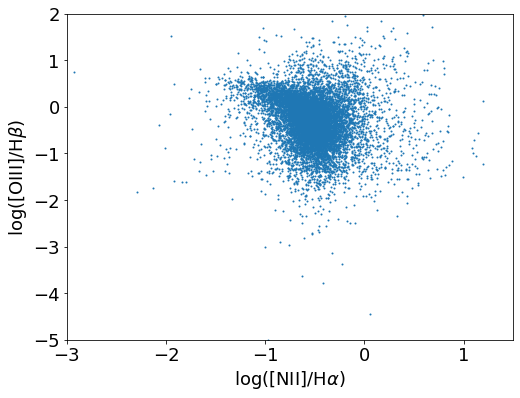

In [10]:
plt.rcParams.update(params)
plt.plot(np.log10(x1), np.log10(y1), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-3,1.5)
plt.ylim(-5,2)
plt.show()

# WHAN diagram

In [11]:
x2 = data_WHAN['NIIR_FLUX_COMP']/data_WHAN['HA_FLUX_COMP']
y2 = data_WHAN['HA_EW_COMP']

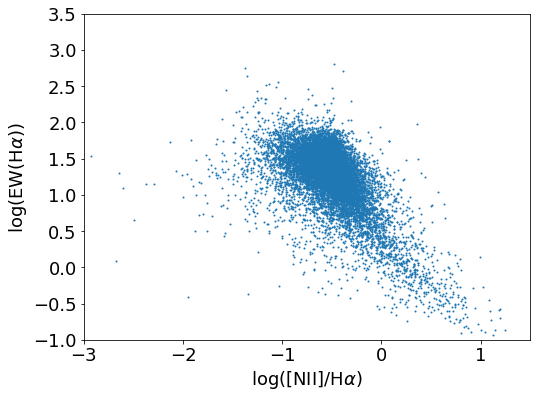

In [12]:
plt.plot(np.log10(x2), np.log10(y2), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-3,1.5)
plt.ylim(-1,3.5)
plt.show()

# Diagrams for RSF

# BPT

In [13]:
x3 = data_rsf_BPT['NIIR_FLUX_COMP']/data_rsf_BPT['HA_FLUX_COMP']
y3 = data_rsf_BPT['OIIIR_FLUX_COMP']/data_rsf_BPT['HB_FLUX_COMP']

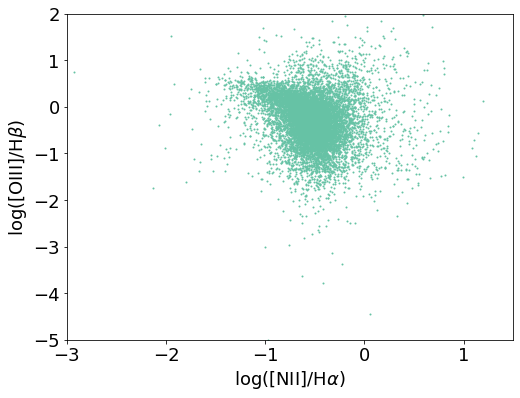

In [14]:
plt.plot(np.log10(x3), np.log10(y3), ls='', marker='o', markersize=1, c=palette[0])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-3,1.5)
plt.ylim(-5,2)
plt.show()

# WHAN

In [15]:
x4 = data_rsf_WHAN['NIIR_FLUX_COMP']/data_rsf_WHAN['HA_FLUX_COMP']
y4 = data_rsf_WHAN['HA_EW_COMP']

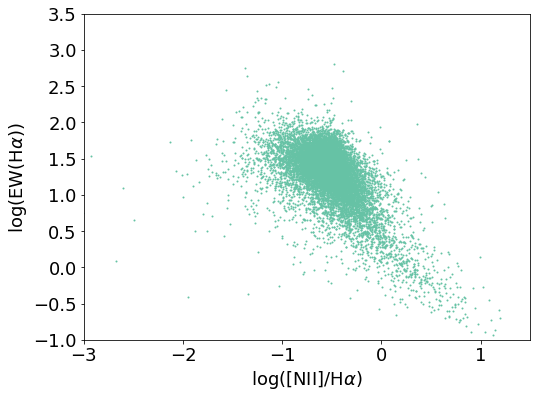

In [16]:
plt.plot(np.log10(x4), np.log10(y4), ls='', marker='o', markersize=1, c=palette[0])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-3,1.5)
plt.ylim(-1,3.5)
plt.show()

# Diagrams for UV weak

# BPT

In [17]:
x5 = data_uvweak_BPT['NIIR_FLUX_COMP']/data_uvweak_BPT['HA_FLUX_COMP']
y5 = data_uvweak_BPT['OIIIR_FLUX_COMP']/data_uvweak_BPT['HB_FLUX_COMP']

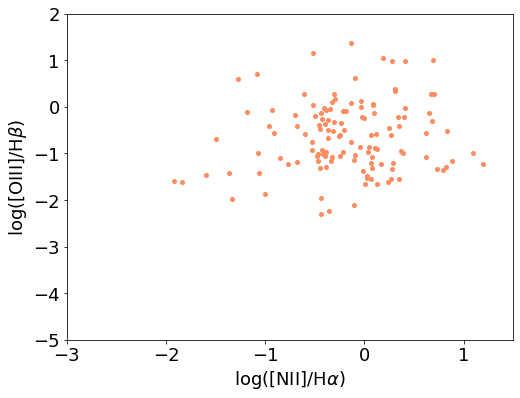

In [18]:
plt.plot(np.log10(x5), np.log10(y5), ls='', marker='o', markersize=4, c=palette[1])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-3,1.5)
plt.ylim(-5,2)
plt.show()

# WHAN

In [19]:
x6 = data_uvweak_WHAN['NIIR_FLUX_COMP']/data_uvweak_WHAN['HA_FLUX_COMP']
y6 = data_uvweak_WHAN['HA_EW_COMP']

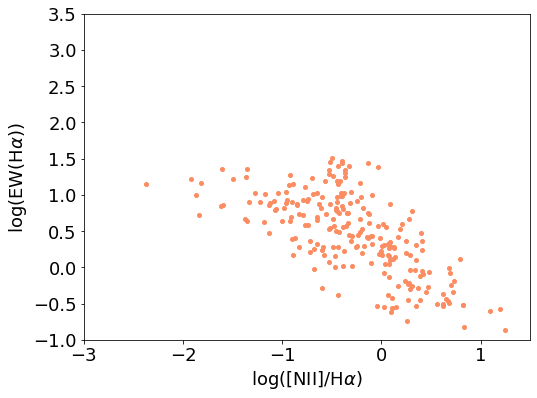

In [20]:
plt.plot(np.log10(x6), np.log10(y6), ls='', marker='o', markersize=4, c=palette[1])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-3,1.5)
plt.ylim(-1,3.5)
plt.show()

# Diagrams for UV upturn

# BPT

In [21]:
x7 = data_uvupturn_BPT['NIIR_FLUX_COMP']/data_uvupturn_BPT['HA_FLUX_COMP']
y7 = data_uvupturn_BPT['OIIIR_FLUX_COMP']/data_uvupturn_BPT['HB_FLUX_COMP']

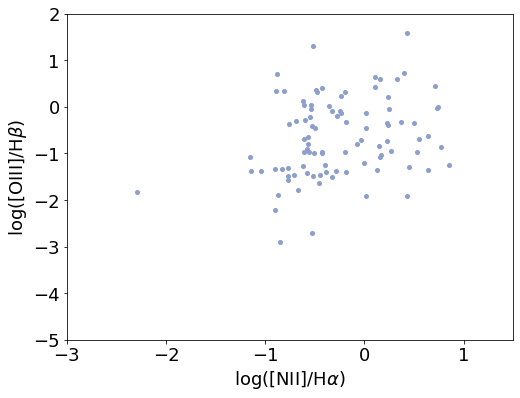

In [22]:
plt.plot(np.log10(x7), np.log10(y7), ls='', marker='o', markersize=4, c=palette[2])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-3,1.5)
plt.ylim(-5,2)
plt.show()

# WHAN

In [23]:
x8 = data_uvupturn_WHAN['NIIR_FLUX_COMP']/data_uvupturn_WHAN['HA_FLUX_COMP']
y8 = data_uvupturn_WHAN['HA_EW_COMP']

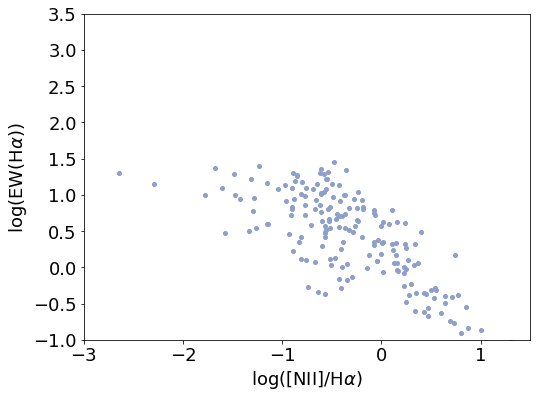

In [24]:
plt.plot(np.log10(x8), np.log10(y8), ls='', marker='o', markersize=4, c=palette[2])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-3,1.5)
plt.ylim(-1,3.5)
plt.show()

# Extra plots

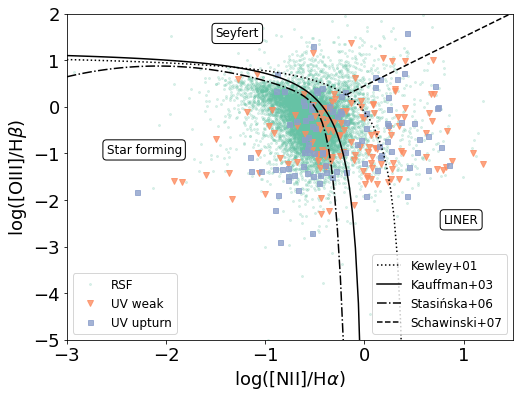

In [25]:
lines = []
lines += plt.plot(np.log10(x3), np.log10(y3), ls='', marker='o', markersize=2, c=palette[0], alpha=0.2, label='RSF')
lines += plt.plot(np.log10(x5), np.log10(y5), ls='', marker='v', markersize=6, c=palette[1], alpha=0.8, label='UV weak')
lines += plt.plot(np.log10(x7), np.log10(y7), ls='', marker='s', markersize=5, c=palette[2], alpha=0.8, label='UV upturn')

xx1 = np.linspace(-3, 0.4, 100)
xx2 = np.linspace(-3, 0, 100)
xx3 = np.linspace(-3, 0, 100)
xx4 = np.linspace(-0.18, 1.5, 100)

lines += plt.plot(xx1, Kewley(xx1), ls='dotted', c='k', label='Kewley+01')
lines += plt.plot(xx2, Kauffmann(xx2), ls='-', c='k', label='Kauffman+03')
lines += plt.plot(xx3, Stasinska(xx3), ls='-.', c='k', label='Stasińska+06')
lines += plt.plot(xx4, Schawinski(xx4), ls='--', c='k', label='Schawinski+07')

plt.text(-1.5, 1.5, 'Seyfert', bbox=dict(boxstyle="round", ec='k', fc='w'))
plt.text(-2.6, -1.0, 'Star forming', bbox=dict(boxstyle="round", ec='k', fc='w'))
plt.text(0.8, -2.5, 'LINER', bbox=dict(boxstyle="round", ec='k', fc='w'))

plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-3,1.5)
plt.ylim(-5,2)

legend1 = plt.legend(lines[:3], ['RSF', 'UV weak', 'UV upturn'], loc='lower left')
plt.legend(lines[3:], ['Kewley+01', 'Kauffman+03', 'Stasińska+06', 'Schawinski+07'], loc='lower right')
plt.gca().add_artist(legend1)

plt.show()

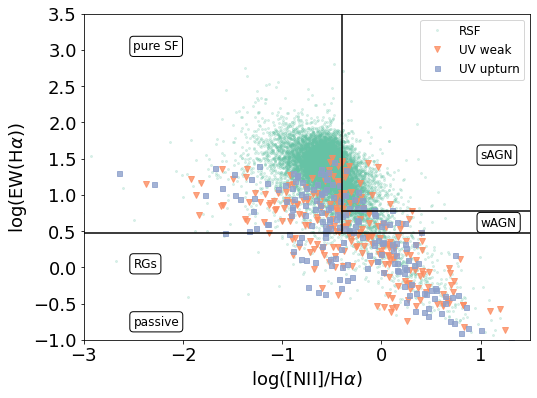

In [26]:
plt.plot(np.log10(x4), np.log10(y4), ls='', marker='o', markersize=2, c=palette[0], alpha=0.2, label='RSF')
plt.plot(np.log10(x6), np.log10(y6), ls='', marker='v', markersize=6, c=palette[1], alpha=0.8, label='UV weak')
plt.plot(np.log10(x8), np.log10(y8), ls='', marker='s', markersize=5, c=palette[2], alpha=0.8, label='UV upturn')

xx5 = np.linspace(-3, -0.4, 100)
xx6 = np.linspace(-0.4, 1.5, 100)
xx7 = np.linspace(np.log10(3), 3.5, 100)

plt.plot(xx5, horizontal(xx5, np.log10(3)), ls='-', c='k') # pure SF
plt.plot(xx6, horizontal(xx6, np.log10(6)), ls='-', c='k') # sAGN
plt.plot(xx6, horizontal(xx6, np.log10(3)), ls='-', c='k') # wAGN
plt.plot(vertical(xx7, -0.4), xx7, ls='-', c='k')

plt.text(-2.5, 3.0, 'pure SF', bbox=dict(boxstyle="round", ec='k', fc='w'))
plt.text(1.0, 1.5, 'sAGN', bbox=dict(boxstyle="round", ec='k', fc='w'))
plt.text(1.0, 0.57, 'wAGN', bbox=dict(boxstyle="round", ec='k', fc='w'))
plt.text(-2.5, 0.0, 'RGs', bbox=dict(boxstyle="round", ec='k', fc='w'))
plt.text(-2.5, -0.8, 'passive', bbox=dict(boxstyle="round", ec='k', fc='w'))

plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-3,1.5)
plt.ylim(-1,3.5)
plt.legend()
plt.show()

# Heatmaps

# RSF

In [27]:
labels = [r'NUV$-$r', r'RUV$-$r', r'FUV$-$NUV', r'M$_\mathrm{NUV}$', r'M$_\mathrm{FUV}$', r'M$_\mathrm{r}$', 
          r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$', r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$', 
          r'$\mathrm{EW}(\mathrm{H}\alpha)$', r'$\mathrm{EW}(\mathrm{H}\beta)$', 
          r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$', r'D$_n$4000']

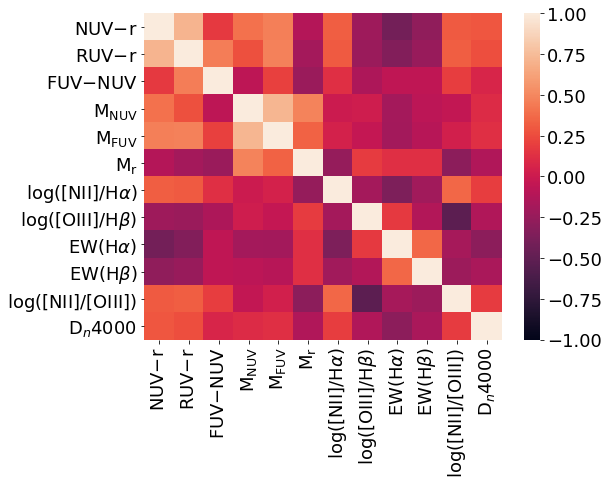

In [28]:
sns.heatmap(data=heatmap_rsf_df.corr(method='kendall'), vmin=-1., vmax=1., yticklabels=labels, xticklabels=labels)
plt.show()

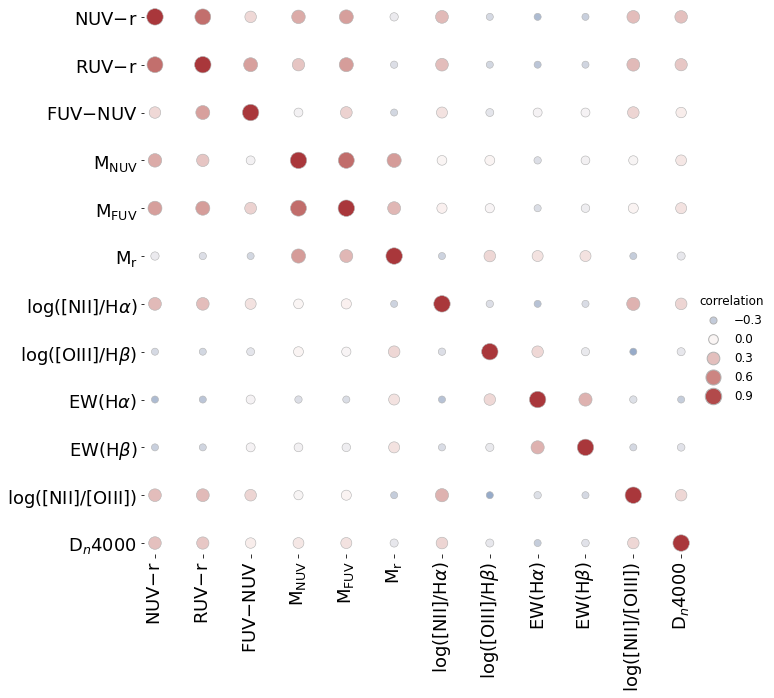

In [222]:
corr_mat_rsf = heatmap_rsf_df.corr(method='kendall').stack().reset_index(name="correlation")

g_rsf = sns.relplot(
    data=corr_mat_rsf,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 270), size_norm=(-.2, .8),
)

g_rsf.set(xlabel="", ylabel="", aspect="equal")
g_rsf.despine(left=True, bottom=True)
g_rsf.ax.margins(.02)

g_rsf.ax.set_xticks(g_rsf.ax.get_xticks())
g_rsf.ax.set_xticklabels(labels)
g_rsf.ax.set_yticks(g_rsf.ax.get_yticks())
g_rsf.ax.set_yticklabels(labels)

for label in g_rsf.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g_rsf.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

# UV weak

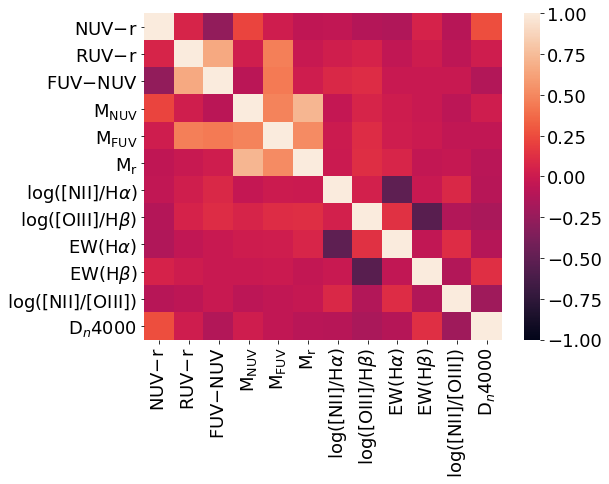

In [30]:
sns.heatmap(data=heatmap_uvweak_df.corr(method='kendall'), vmin=-1., vmax=1., yticklabels=labels, xticklabels=labels)
plt.show()

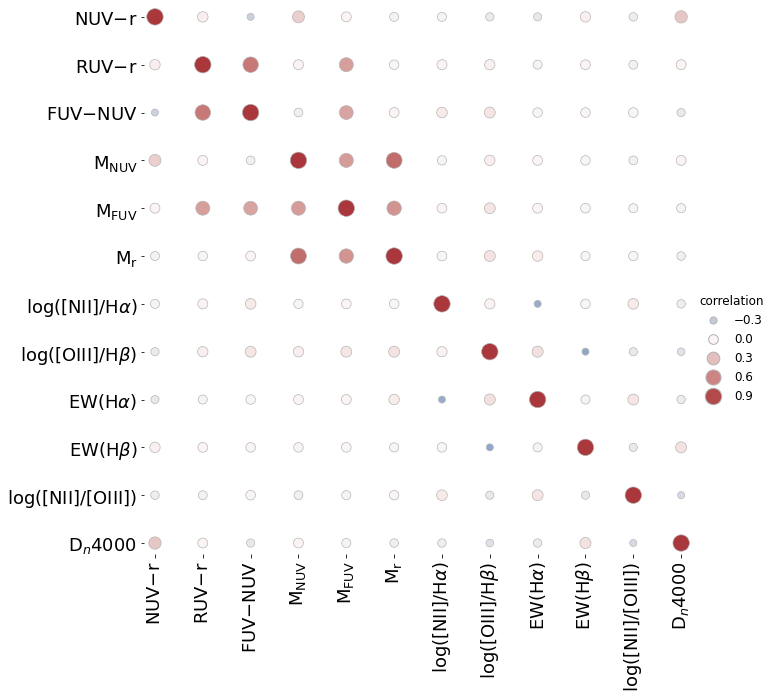

In [223]:
corr_mat_uvweak = heatmap_uvweak_df.corr(method='kendall').stack().reset_index(name="correlation")

g_uvweak = sns.relplot(
    data=corr_mat_uvweak,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 270), size_norm=(-.2, .8),
)

g_uvweak.set(xlabel="", ylabel="", aspect="equal")
g_uvweak.despine(left=True, bottom=True)
g_uvweak.ax.margins(.02)

g_uvweak.ax.set_xticks(g_uvweak.ax.get_xticks())
g_uvweak.ax.set_xticklabels(labels)
g_uvweak.ax.set_yticks(g_uvweak.ax.get_yticks())
g_uvweak.ax.set_yticklabels(labels)

for label in g_uvweak.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g_uvweak.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

# UV upturn

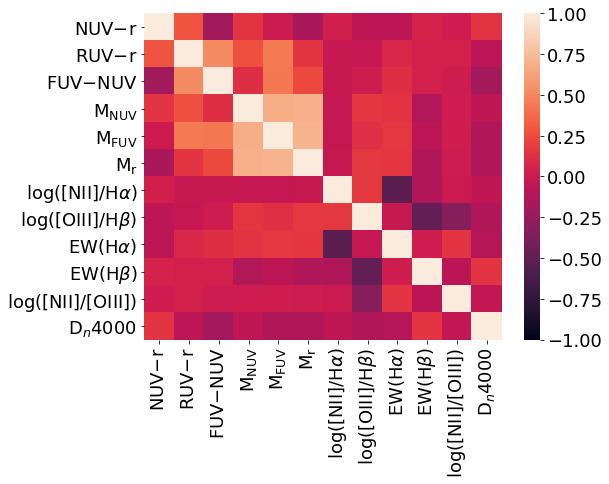

In [32]:
sns.heatmap(data=heatmap_uvupturn_df.corr(method='kendall'), vmin=-1., vmax=1., yticklabels=labels, xticklabels=labels)
plt.show()

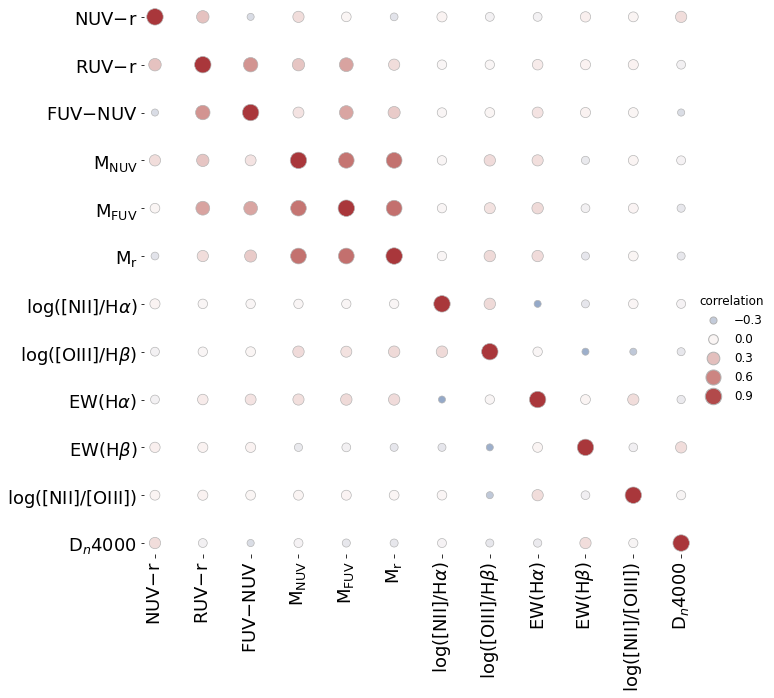

In [227]:
corr_mat_uvupturn = heatmap_uvupturn_df.corr(method='kendall').stack().reset_index(name="correlation")

g_uvupturn = sns.relplot(
    data=corr_mat_uvupturn,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 270), size_norm=(-.2, .8),
)

g_uvupturn.set(xlabel="", ylabel="", aspect="equal")
g_uvupturn.despine(left=True, bottom=True)
g_uvupturn.ax.margins(.02)

g_uvupturn.ax.set_xticks(g_uvupturn.ax.get_xticks())
g_uvupturn.ax.set_xticklabels(labels)
g_uvupturn.ax.set_yticks(g_uvupturn.ax.get_yticks())
g_uvupturn.ax.set_yticklabels(labels)

for label in g_uvupturn.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g_uvupturn.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

# Indivitual plots

# RSF

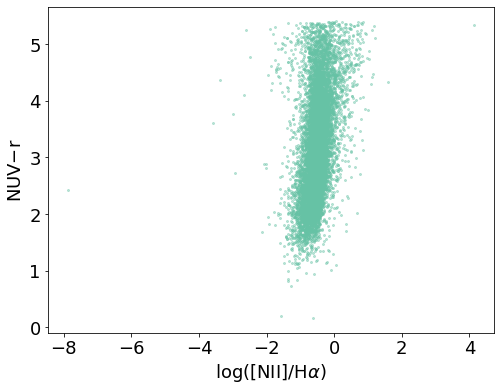

In [34]:
x9 = data_NII_HA_rsf['NIIR_FLUX_COMP']/data_NII_HA_rsf['HA_FLUX_COMP']
y9 = data_NII_HA_rsf['MAG_AB_NUV']-data_NII_HA_rsf['MAG_AB_R']

plt.plot(np.log10(x9), y9, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel('NUV$-$r')
plt.show()

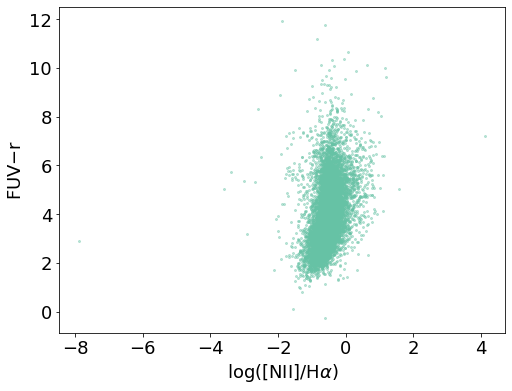

In [35]:
x10 = data_NII_HA_rsf['NIIR_FLUX_COMP']/data_NII_HA_rsf['HA_FLUX_COMP']
y10 = data_NII_HA_rsf['MAG_AB_FUV']-data_NII_HA_rsf['MAG_AB_R']

plt.plot(np.log10(x10), y10, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel('FUV$-$r')
plt.show()

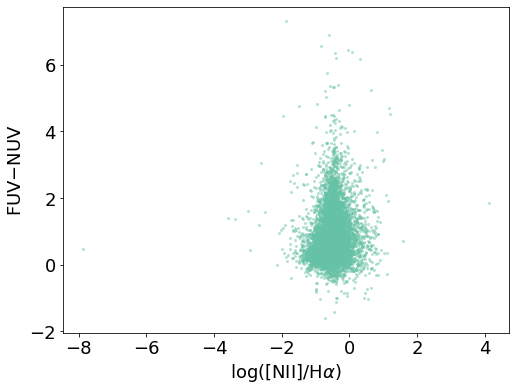

In [36]:
x11 = data_NII_HA_rsf['NIIR_FLUX_COMP']/data_NII_HA_rsf['HA_FLUX_COMP']
y11 = data_NII_HA_rsf['MAG_AB_FUV']-data_NII_HA_rsf['MAG_AB_NUV']

plt.plot(np.log10(x11), y11, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel('FUV$-$NUV')
plt.show()

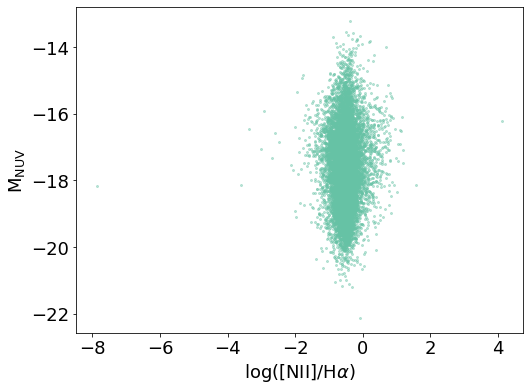

In [37]:
x12 = data_NII_HA_rsf['NIIR_FLUX_COMP']/data_NII_HA_rsf['HA_FLUX_COMP']
y12 = data_NII_HA_rsf['MAG_ABSOLUTE_NUV']

plt.plot(np.log10(x12), y12, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

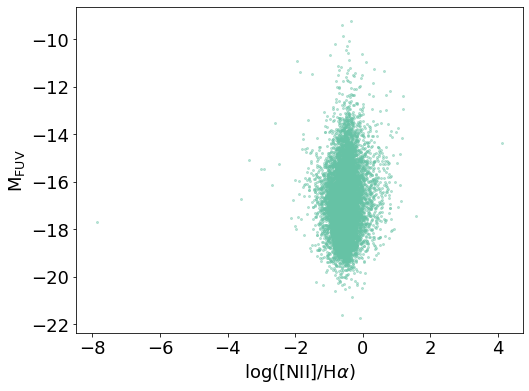

In [38]:
x13 = data_NII_HA_rsf['NIIR_FLUX_COMP']/data_NII_HA_rsf['HA_FLUX_COMP']
y13 = data_NII_HA_rsf['MAG_ABSOLUTE_FUV']

plt.plot(np.log10(x13), y13, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

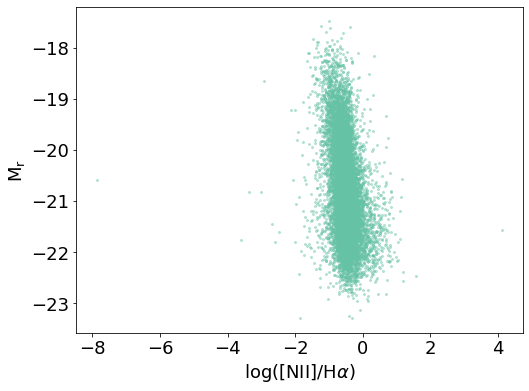

In [39]:
x14 = data_NII_HA_rsf['NIIR_FLUX_COMP']/data_NII_HA_rsf['HA_FLUX_COMP']
y14 = data_NII_HA_rsf['MAG_ABSOLUTE_R']

plt.plot(np.log10(x14), y14, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

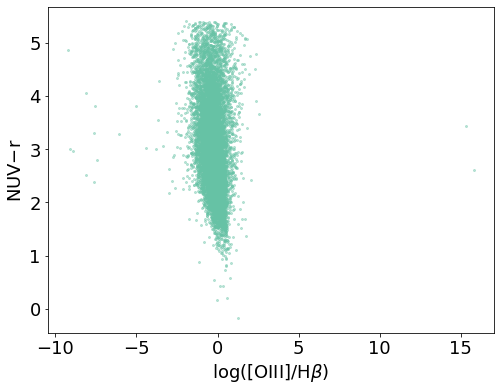

In [40]:
x15 = data_OIII_HB_rsf['OIIIR_FLUX_COMP']/data_OIII_HB_rsf['HB_FLUX_COMP']
y15 = data_OIII_HB_rsf['MAG_AB_NUV']-data_OIII_HB_rsf['MAG_AB_R']

plt.plot(np.log10(x15), y15, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.ylabel('NUV$-$r')
plt.show()

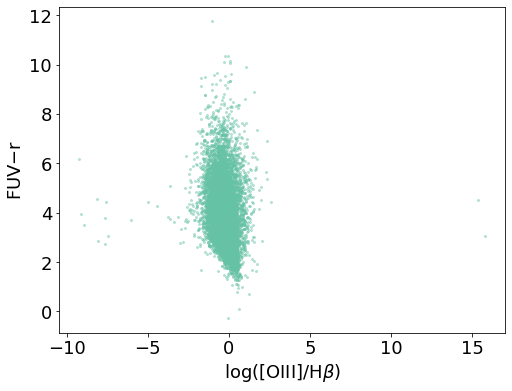

In [41]:
x16 = data_OIII_HB_rsf['OIIIR_FLUX_COMP']/data_OIII_HB_rsf['HB_FLUX_COMP']
y16 = data_OIII_HB_rsf['MAG_AB_FUV']-data_OIII_HB_rsf['MAG_AB_R']

plt.plot(np.log10(x16), y16, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.ylabel('FUV$-$r')
plt.show()

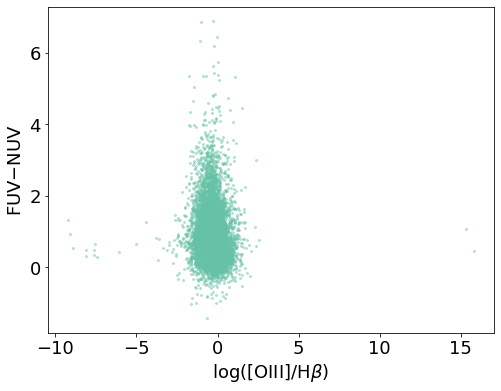

In [42]:
x17 = data_OIII_HB_rsf['OIIIR_FLUX_COMP']/data_OIII_HB_rsf['HB_FLUX_COMP']
y17 = data_OIII_HB_rsf['MAG_AB_FUV']-data_OIII_HB_rsf['MAG_AB_NUV']

plt.plot(np.log10(x17), y17, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.ylabel('FUV$-$NUV')
plt.show()

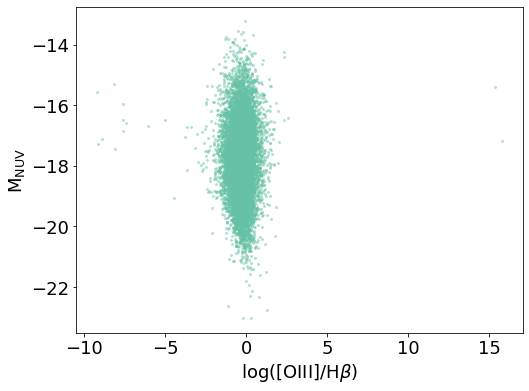

In [43]:
x18 = data_OIII_HB_rsf['OIIIR_FLUX_COMP']/data_OIII_HB_rsf['HB_FLUX_COMP']
y18 = data_OIII_HB_rsf['MAG_ABSOLUTE_NUV']

plt.plot(np.log10(x18), y18, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

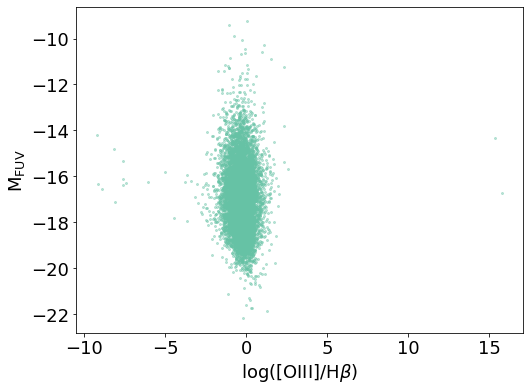

In [44]:
x19 = data_OIII_HB_rsf['OIIIR_FLUX_COMP']/data_OIII_HB_rsf['HB_FLUX_COMP']
y19 = data_OIII_HB_rsf['MAG_ABSOLUTE_FUV']

plt.plot(np.log10(x19), y19, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

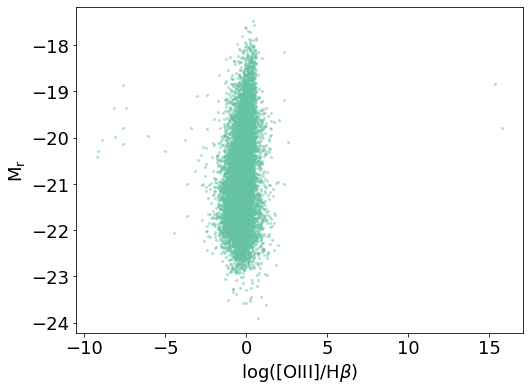

In [45]:
x20 = data_OIII_HB_rsf['OIIIR_FLUX_COMP']/data_OIII_HB_rsf['HB_FLUX_COMP']
y20 = data_OIII_HB_rsf['MAG_ABSOLUTE_R']

plt.plot(np.log10(x20), y20, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

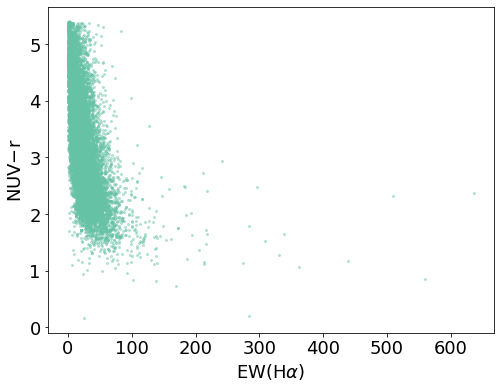

In [46]:
x21 = data_EW_HA_rsf['HA_EW_COMP']
y21 = data_EW_HA_rsf['MAG_AB_NUV']-data_EW_HA_rsf['MAG_AB_R']

plt.plot(x21, y21, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'EW(H$\alpha$)')
plt.ylabel('NUV$-$r')
plt.show()

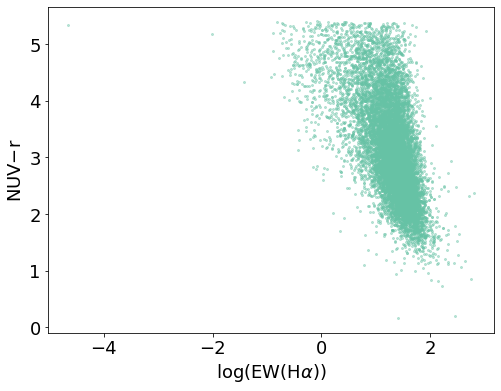

In [47]:
plt.plot(np.log10(x21), y21, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.ylabel('NUV$-$r')
plt.show()

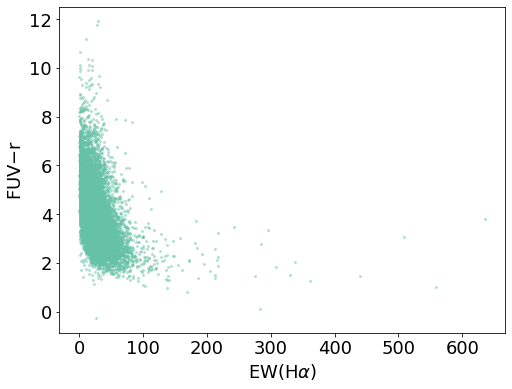

In [48]:
x22 = data_EW_HA_rsf['HA_EW_COMP']
y22 = data_EW_HA_rsf['MAG_AB_FUV']-data_EW_HA_rsf['MAG_AB_R']

plt.plot(x22, y22, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'EW(H$\alpha$)')
plt.ylabel('FUV$-$r')
plt.show()

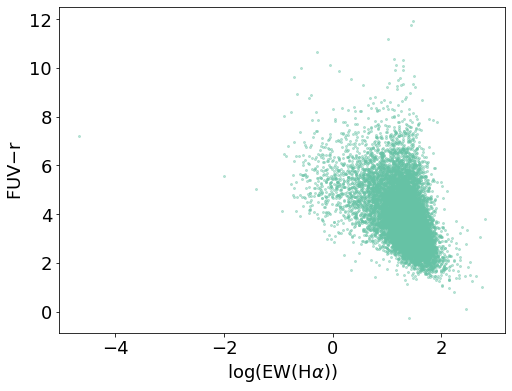

In [49]:
plt.plot(np.log10(x22), y22, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.ylabel('FUV$-$r')
plt.show()

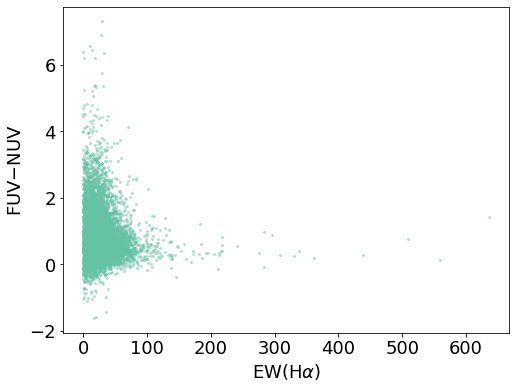

In [50]:
x23 = data_EW_HA_rsf['HA_EW_COMP']
y23 = data_EW_HA_rsf['MAG_AB_FUV']-data_EW_HA_rsf['MAG_AB_NUV']

plt.plot(x23, y23, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'EW(H$\alpha$)')
plt.ylabel('FUV$-$NUV')
plt.show()

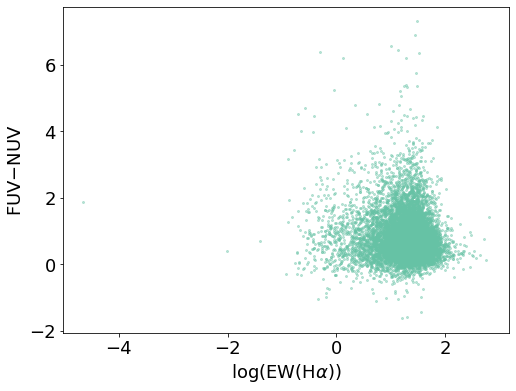

In [51]:
plt.plot(np.log10(x23), y23, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.ylabel('FUV$-$NUV')
plt.show()

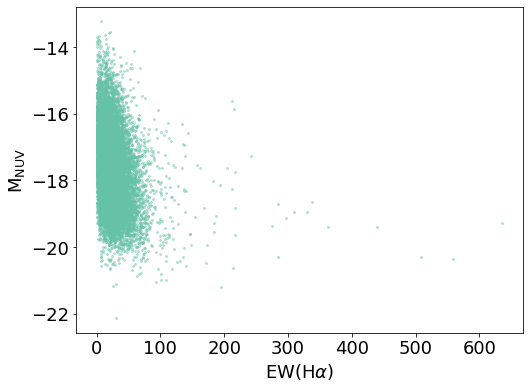

In [52]:
x24 = data_EW_HA_rsf['HA_EW_COMP']
y24 = data_EW_HA_rsf['MAG_ABSOLUTE_NUV']

plt.plot(x24, y24, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'EW(H$\alpha$)')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

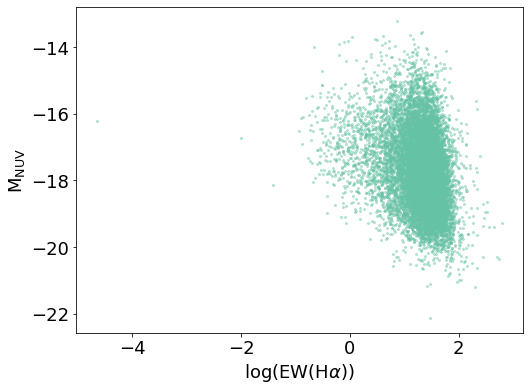

In [53]:
plt.plot(np.log10(x24), y24, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

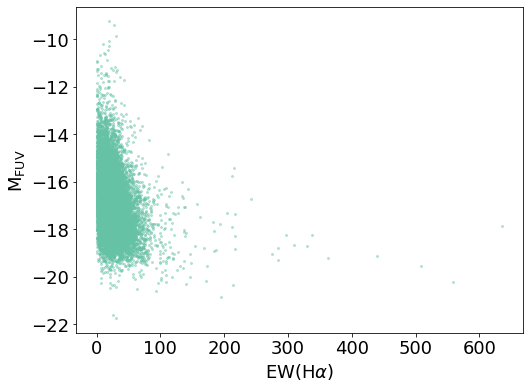

In [54]:
x25 = data_EW_HA_rsf['HA_EW_COMP']
y25 = data_EW_HA_rsf['MAG_ABSOLUTE_FUV']

plt.plot(x25, y25, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'EW(H$\alpha$)')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

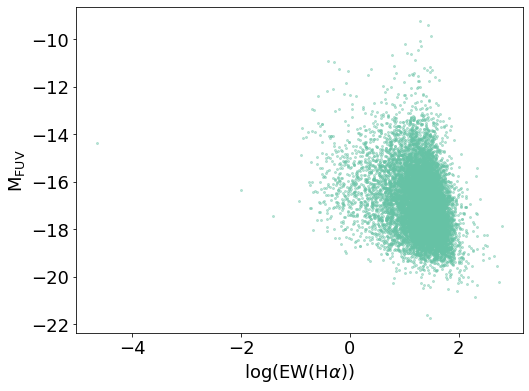

In [55]:
plt.plot(np.log10(x25), y25, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

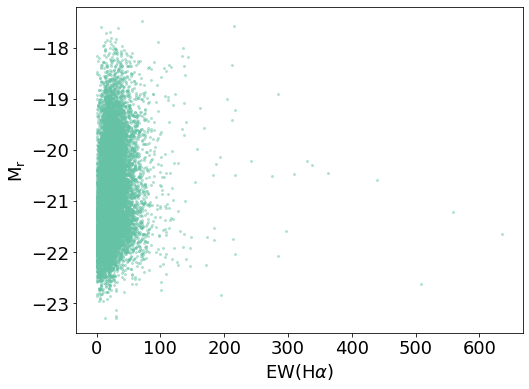

In [56]:
x26 = data_EW_HA_rsf['HA_EW_COMP']
y26 = data_EW_HA_rsf['MAG_ABSOLUTE_R']

plt.plot(x26, y26, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'EW(H$\alpha$)')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

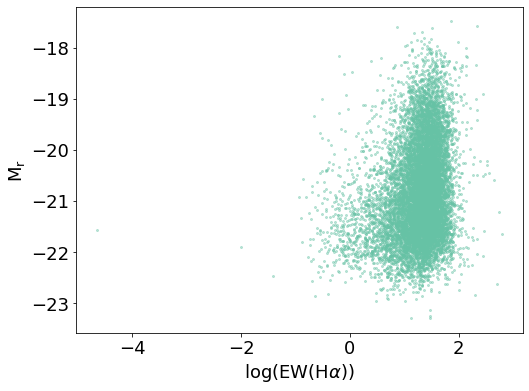

In [57]:
plt.plot(np.log10(x26), y26, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

In [58]:
x27 = data_EW_HB_rsf['HB_EW_COMP']
y27 = data_EW_HB_rsf['MAG_AB_NUV']-data_EW_HB_rsf['MAG_AB_R']

plt.plot(x27, y27, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'EW(H$\beta$)')
plt.ylabel('NUV$-$r')
plt.show()

In [59]:
plt.plot(np.log10(x27), y27, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')
plt.ylabel('NUV$-$r')
plt.show()

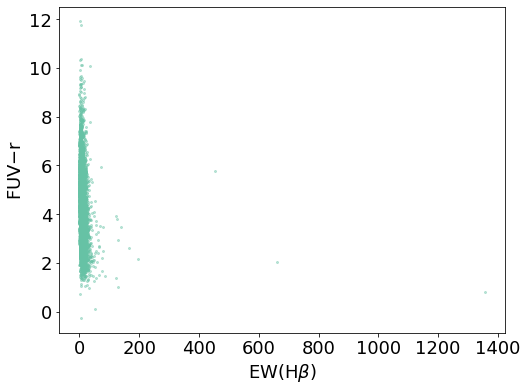

In [60]:
x28 = data_EW_HB_rsf['HB_EW_COMP']
y28 = data_EW_HB_rsf['MAG_AB_FUV']-data_EW_HB_rsf['MAG_AB_R']

plt.plot(x28, y28, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'EW(H$\beta$)')
plt.ylabel('FUV$-$r')
plt.show()

In [61]:
plt.plot(np.log10(x28), y28, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')
plt.ylabel('FUV$-$r')
plt.show()

In [62]:
x29 = data_EW_HB_rsf['HB_EW_COMP']
y29 = data_EW_HB_rsf['MAG_AB_FUV']-data_EW_HB_rsf['MAG_AB_NUV']

plt.plot(x29, y29, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'EW(H$\beta$)')
plt.ylabel('FUV$-$NUV')
plt.show()

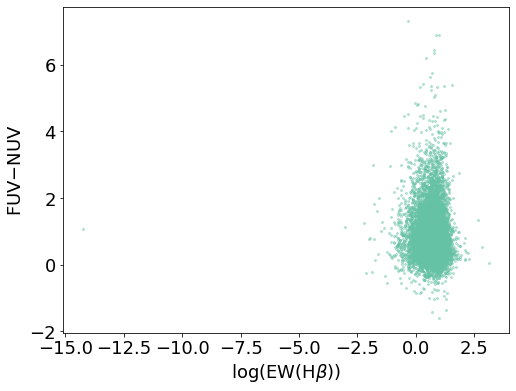

In [63]:
plt.plot(np.log10(x29), y29, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')
plt.ylabel('FUV$-$NUV')
plt.show()

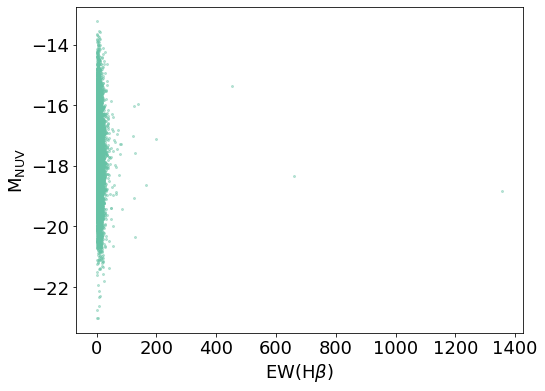

In [64]:
x30 = data_EW_HB_rsf['HB_EW_COMP']
y30 = data_EW_HB_rsf['MAG_ABSOLUTE_NUV']

plt.plot(x30, y30, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'EW(H$\beta$)')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

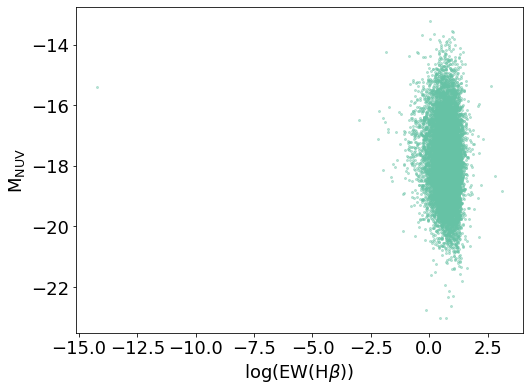

In [65]:
plt.plot(np.log10(x30), y30, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

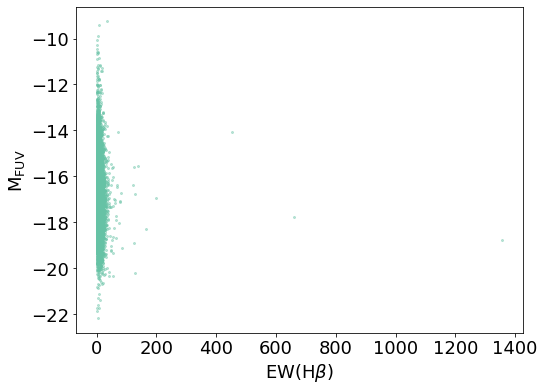

In [66]:
x31 = data_EW_HB_rsf['HB_EW_COMP']
y31 = data_EW_HB_rsf['MAG_ABSOLUTE_FUV']

plt.plot(x31, y31, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'EW(H$\beta$)')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

In [67]:
plt.plot(np.log10(x31), y31, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

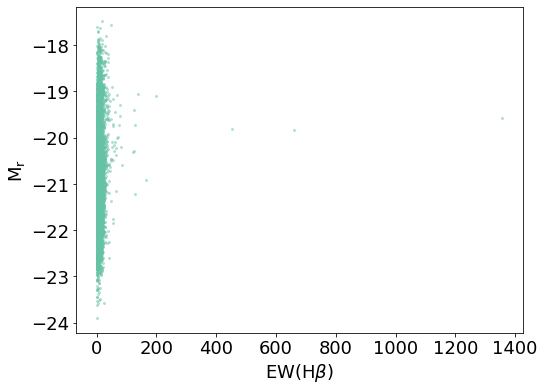

In [68]:
x32 = data_EW_HB_rsf['HB_EW_COMP']
y32 = data_EW_HB_rsf['MAG_ABSOLUTE_R']

plt.plot(x32, y32, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'EW(H$\beta$)')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

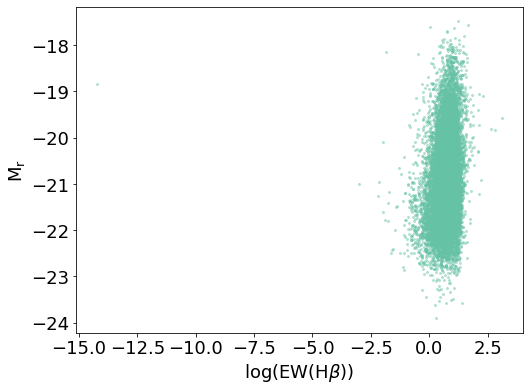

In [69]:
plt.plot(np.log10(x32), y32, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

In [70]:
x33 = data_NII_OIII_rsf['NIIR_FLUX_COMP']/data_NII_OIII_rsf['OIIIR_FLUX_COMP']
y33 = data_NII_OIII_rsf['MAG_AB_NUV']-data_NII_OIII_rsf['MAG_AB_R']

plt.plot(np.log10(x33), y33, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')
plt.ylabel('NUV$-$r')
plt.show()

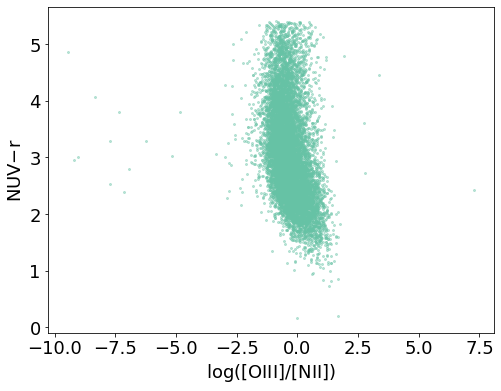

In [71]:
plt.plot(np.log10(1/x33), y33, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')
plt.ylabel('NUV$-$r')
plt.show()

In [72]:
x34 = data_NII_OIII_rsf['NIIR_FLUX_COMP']/data_NII_OIII_rsf['OIIIR_FLUX_COMP']
y34 = data_NII_OIII_rsf['MAG_AB_FUV']-data_NII_OIII_rsf['MAG_AB_R']

plt.plot(np.log10(x34), y34, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')
plt.ylabel('FUV$-$r')
plt.show()

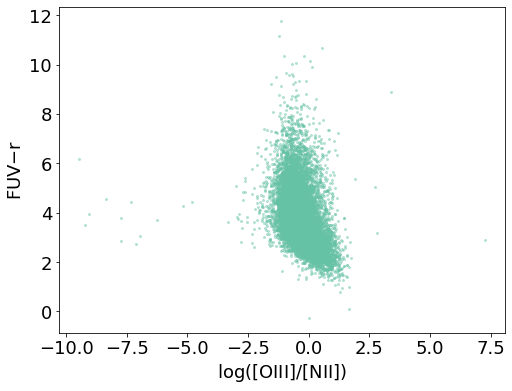

In [73]:
plt.plot(np.log10(1/x34), y34, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')
plt.ylabel('FUV$-$r')
plt.show()

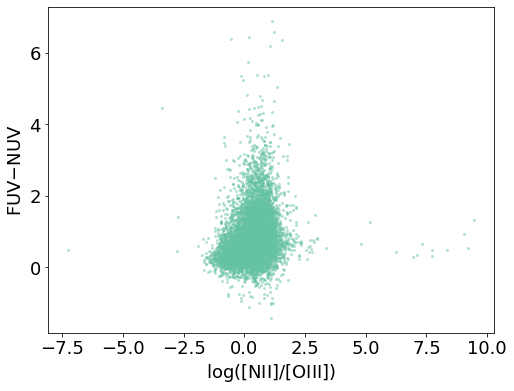

In [74]:
x35 = data_NII_OIII_rsf['NIIR_FLUX_COMP']/data_NII_OIII_rsf['OIIIR_FLUX_COMP']
y35 = data_NII_OIII_rsf['MAG_AB_FUV']-data_NII_OIII_rsf['MAG_AB_NUV']

plt.plot(np.log10(x35), y35, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')
plt.ylabel('FUV$-$NUV')
plt.show()

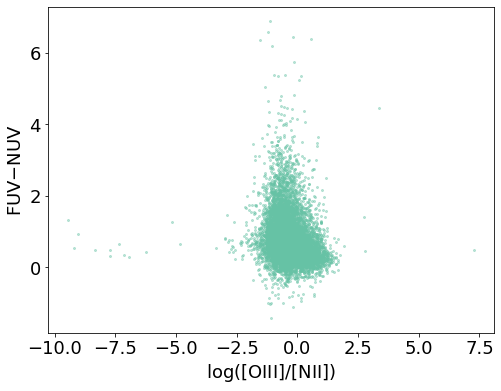

In [75]:
plt.plot(np.log10(1/x35), y35, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')
plt.ylabel('FUV$-$NUV')
plt.show()

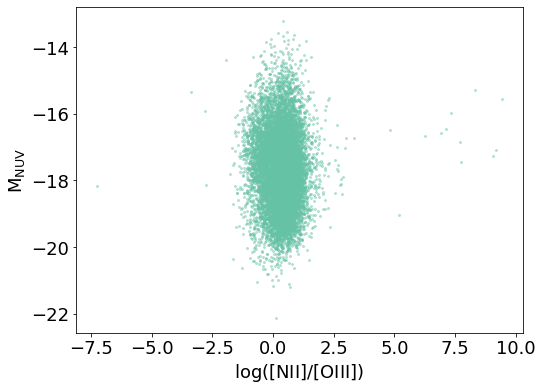

In [76]:
x36 = data_NII_OIII_rsf['NIIR_FLUX_COMP']/data_NII_OIII_rsf['OIIIR_FLUX_COMP']
y36 = data_NII_OIII_rsf['MAG_ABSOLUTE_NUV']

plt.plot(np.log10(x36), y36, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

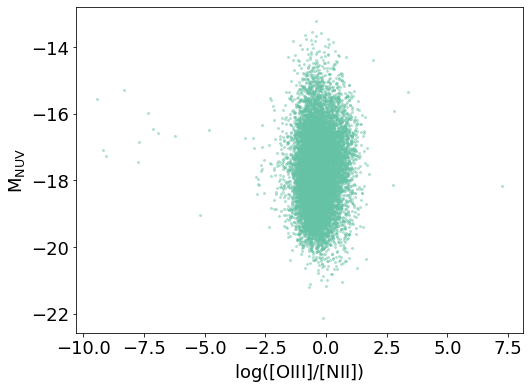

In [77]:
plt.plot(np.log10(1/x36), y36, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

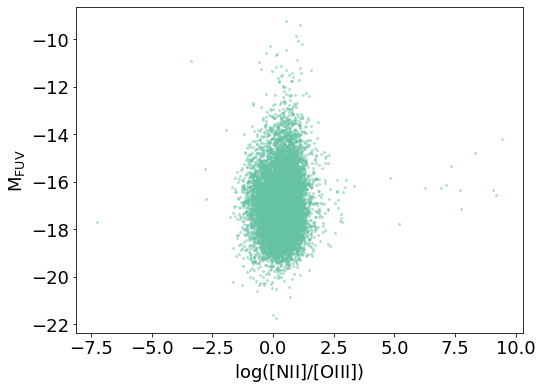

In [78]:
x37 = data_NII_OIII_rsf['NIIR_FLUX_COMP']/data_NII_OIII_rsf['OIIIR_FLUX_COMP']
y37 = data_NII_OIII_rsf['MAG_ABSOLUTE_FUV']

plt.plot(np.log10(x37), y37, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

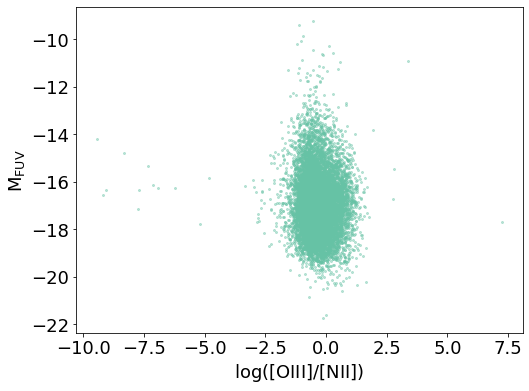

In [79]:
plt.plot(np.log10(1/x37), y37, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

In [80]:
x38 = data_NII_OIII_rsf['NIIR_FLUX_COMP']/data_NII_OIII_rsf['OIIIR_FLUX_COMP']
y38 = data_NII_OIII_rsf['MAG_ABSOLUTE_R']

plt.plot(np.log10(x38), y38, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

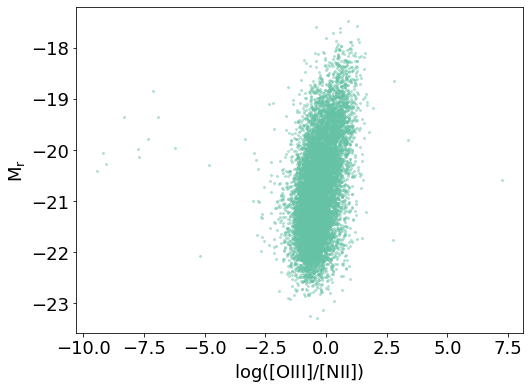

In [81]:
plt.plot(np.log10(1/x38), y38, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

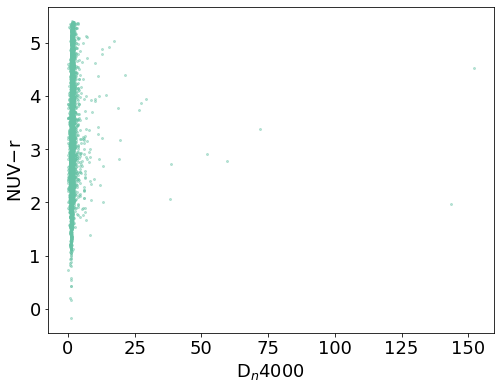

In [82]:
x39 = data_DN4000_rsf['D4000N']
y39 = data_DN4000_rsf['MAG_AB_NUV']-data_DN4000_rsf['MAG_AB_R']

plt.plot(x39, y39, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel('D$_n$4000')
plt.ylabel('NUV$-$r')
plt.show()

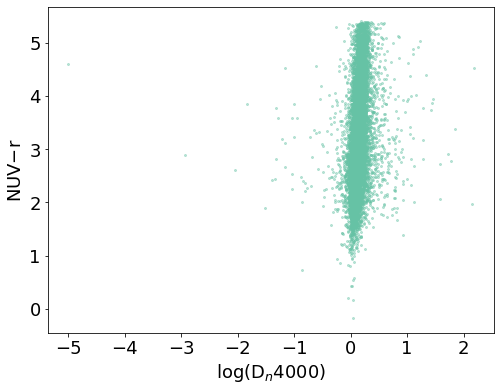

In [83]:
plt.plot(np.log10(x39), y39, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log(\mathrm{D}_n4000)$')
plt.ylabel('NUV$-$r')
plt.show()

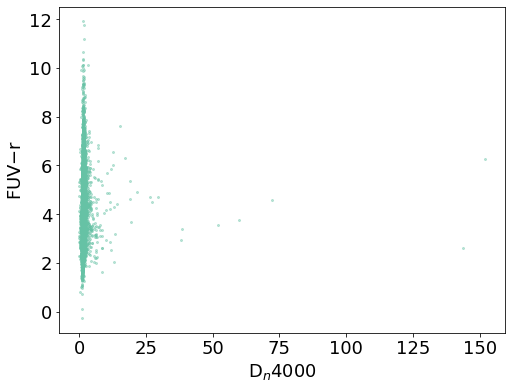

In [84]:
x40 = data_DN4000_rsf['D4000N']
y40 = data_DN4000_rsf['MAG_AB_FUV']-data_DN4000_rsf['MAG_AB_R']

plt.plot(x40, y40, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel('D$_n$4000')
plt.ylabel('FUV$-$r')
plt.show()

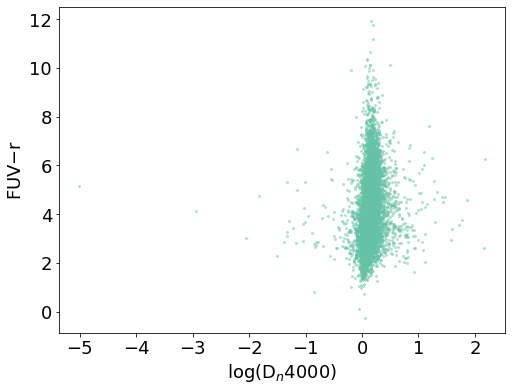

In [85]:
plt.plot(np.log10(x40), y40, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log(\mathrm{D}_n4000)$')
plt.ylabel('FUV$-$r')
plt.show()

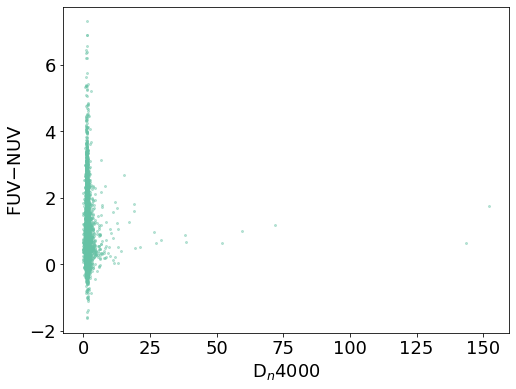

In [86]:
x41 = data_DN4000_rsf['D4000N']
y41 = data_DN4000_rsf['MAG_AB_FUV']-data_DN4000_rsf['MAG_AB_NUV']

plt.plot(x41, y41, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel('D$_n$4000')
plt.ylabel('FUV$-$NUV')
plt.show()

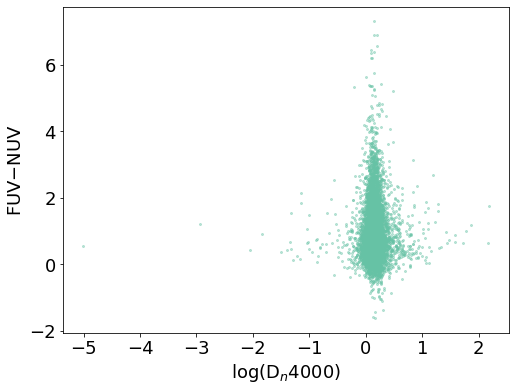

In [87]:
plt.plot(np.log10(x41), y41, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log(\mathrm{D}_n4000)$')
plt.ylabel('FUV$-$NUV')
plt.show()

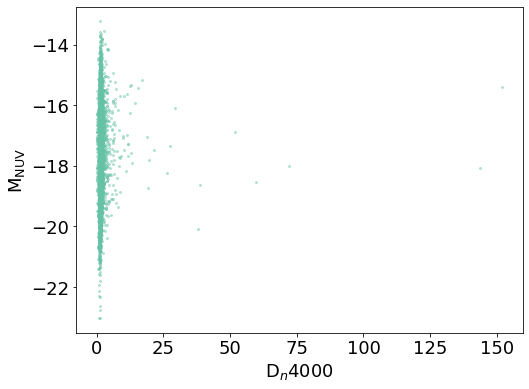

In [88]:
x42 = data_DN4000_rsf['D4000N']
y42 = data_DN4000_rsf['MAG_ABSOLUTE_NUV']

plt.plot(x42, y42, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel('D$_n$4000')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

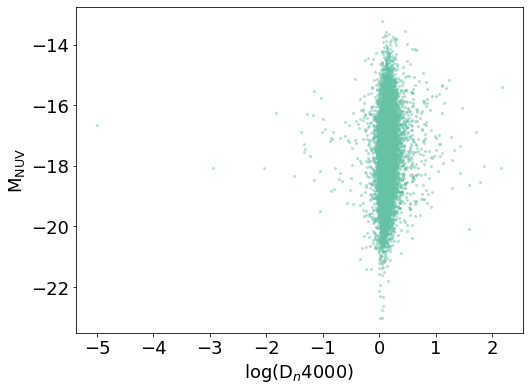

In [89]:
plt.plot(np.log10(x42), y42, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log(\mathrm{D}_n4000)$')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

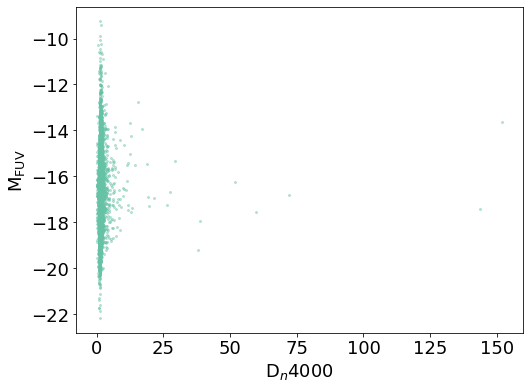

In [90]:
x43 = data_DN4000_rsf['D4000N']
y43 = data_DN4000_rsf['MAG_ABSOLUTE_FUV']

plt.plot(x43, y43, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel('D$_n$4000')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

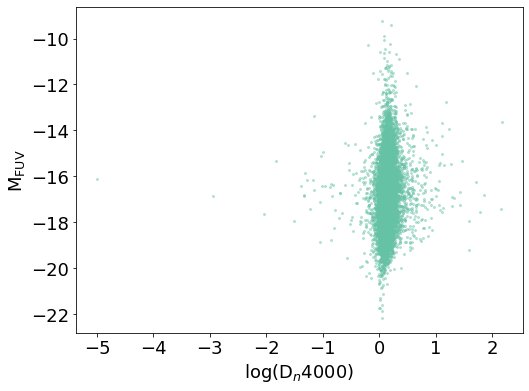

In [91]:
plt.plot(np.log10(x43), y43, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log(\mathrm{D}_n4000)$')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

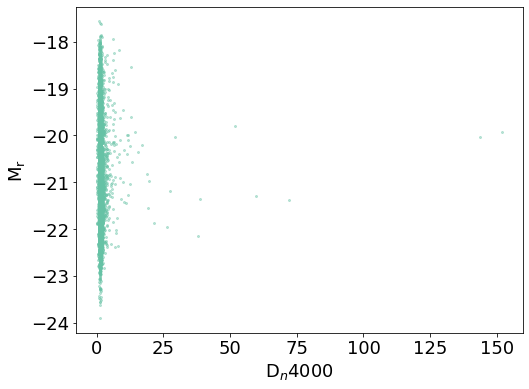

In [92]:
x44 = data_DN4000_rsf['D4000N']
y44 = data_DN4000_rsf['MAG_ABSOLUTE_R']

plt.plot(x44, y44, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel('D$_n$4000')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

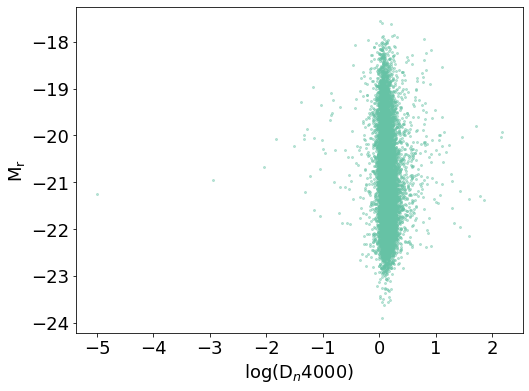

In [93]:
plt.plot(np.log10(x44), y44, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
plt.xlabel(r'$\log(\mathrm{D}_n4000)$')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

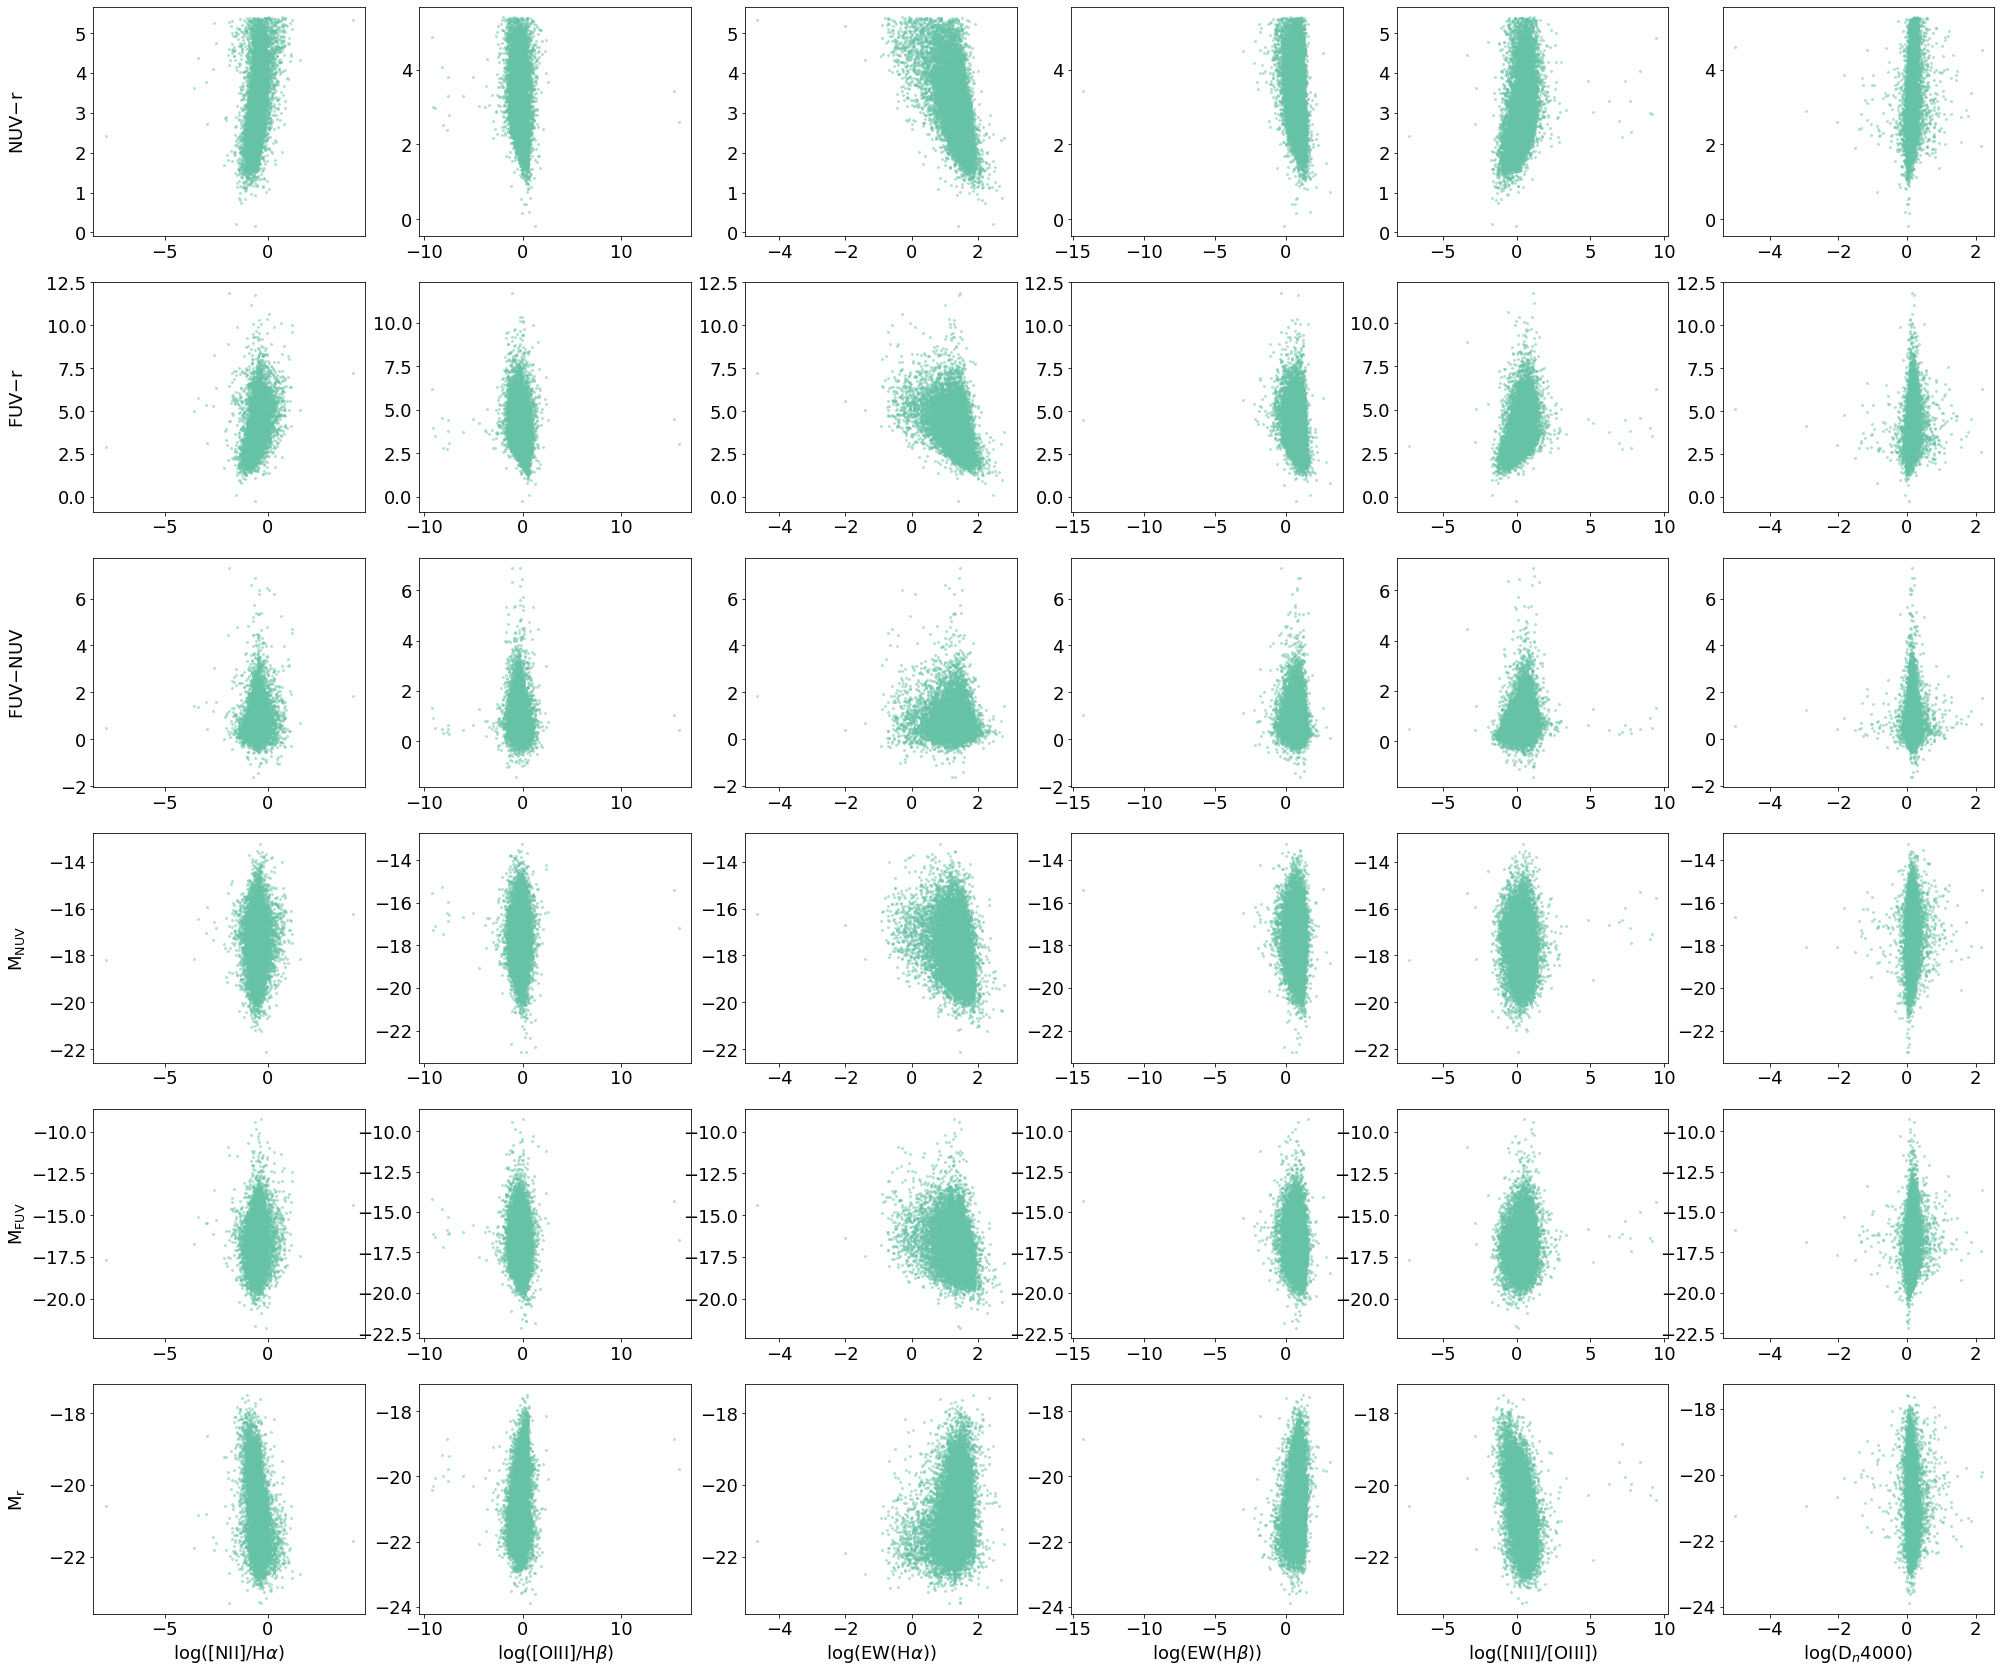

In [94]:
fig, ax = plt.subplots(nrows=6, ncols=6, figsize=(30,24))
plt.subplots_adjust(left=0.08, right=0.96, bottom=0.05, top=0.98)


ax[0,0].plot(np.log10(x9), y9, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[0,0].set_ylabel('NUV$-$r')
ax[1,0].plot(np.log10(x10), y10, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,0].set_ylabel('FUV$-$r')
ax[2,0].plot(np.log10(x11), y11, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,0].set_ylabel('FUV$-$NUV')
ax[3,0].plot(np.log10(x12), y12, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,0].set_ylabel('M$_\mathrm{NUV}$')
ax[4,0].plot(np.log10(x13), y13, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,0].set_ylabel('M$_\mathrm{FUV}$')
ax[5,0].plot(np.log10(x14), y14, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,0].set_ylabel('M$_\mathrm{r}$')
ax[5,0].set_xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')

ax[0,1].plot(np.log10(x15), y15, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,1].plot(np.log10(x16), y16, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,1].plot(np.log10(x17), y17, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,1].plot(np.log10(x18), y18, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,1].plot(np.log10(x19), y19, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,1].plot(np.log10(x20), y20, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,1].set_xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')

ax[0,2].plot(np.log10(x21), y21, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,2].plot(np.log10(x22), y22, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,2].plot(np.log10(x23), y23, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,2].plot(np.log10(x24), y24, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,2].plot(np.log10(x25), y25, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,2].plot(np.log10(x26), y26, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,2].set_xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')

ax[0,3].plot(np.log10(x27), y27, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,3].plot(np.log10(x28), y28, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,3].plot(np.log10(x29), y29, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,3].plot(np.log10(x30), y30, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,3].plot(np.log10(x31), y31, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,3].plot(np.log10(x32), y32, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,3].set_xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')

ax[0,4].plot(np.log10(x33), y33, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,4].plot(np.log10(x34), y34, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,4].plot(np.log10(x35), y35, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,4].plot(np.log10(x36), y36, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,4].plot(np.log10(x37), y37, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,4].plot(np.log10(x38), y38, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,4].set_xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')

ax[0,5].plot(np.log10(x39), y39, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,5].plot(np.log10(x40), y40, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,5].plot(np.log10(x41), y41, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,5].plot(np.log10(x42), y42, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,5].plot(np.log10(x43), y43, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,5].plot(np.log10(x44), y44, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,5].set_xlabel(r'$\log(\mathrm{D}_n4000)$')

fig.align_xlabels(ax[5, :])
fig.align_ylabels(ax[:, 0])

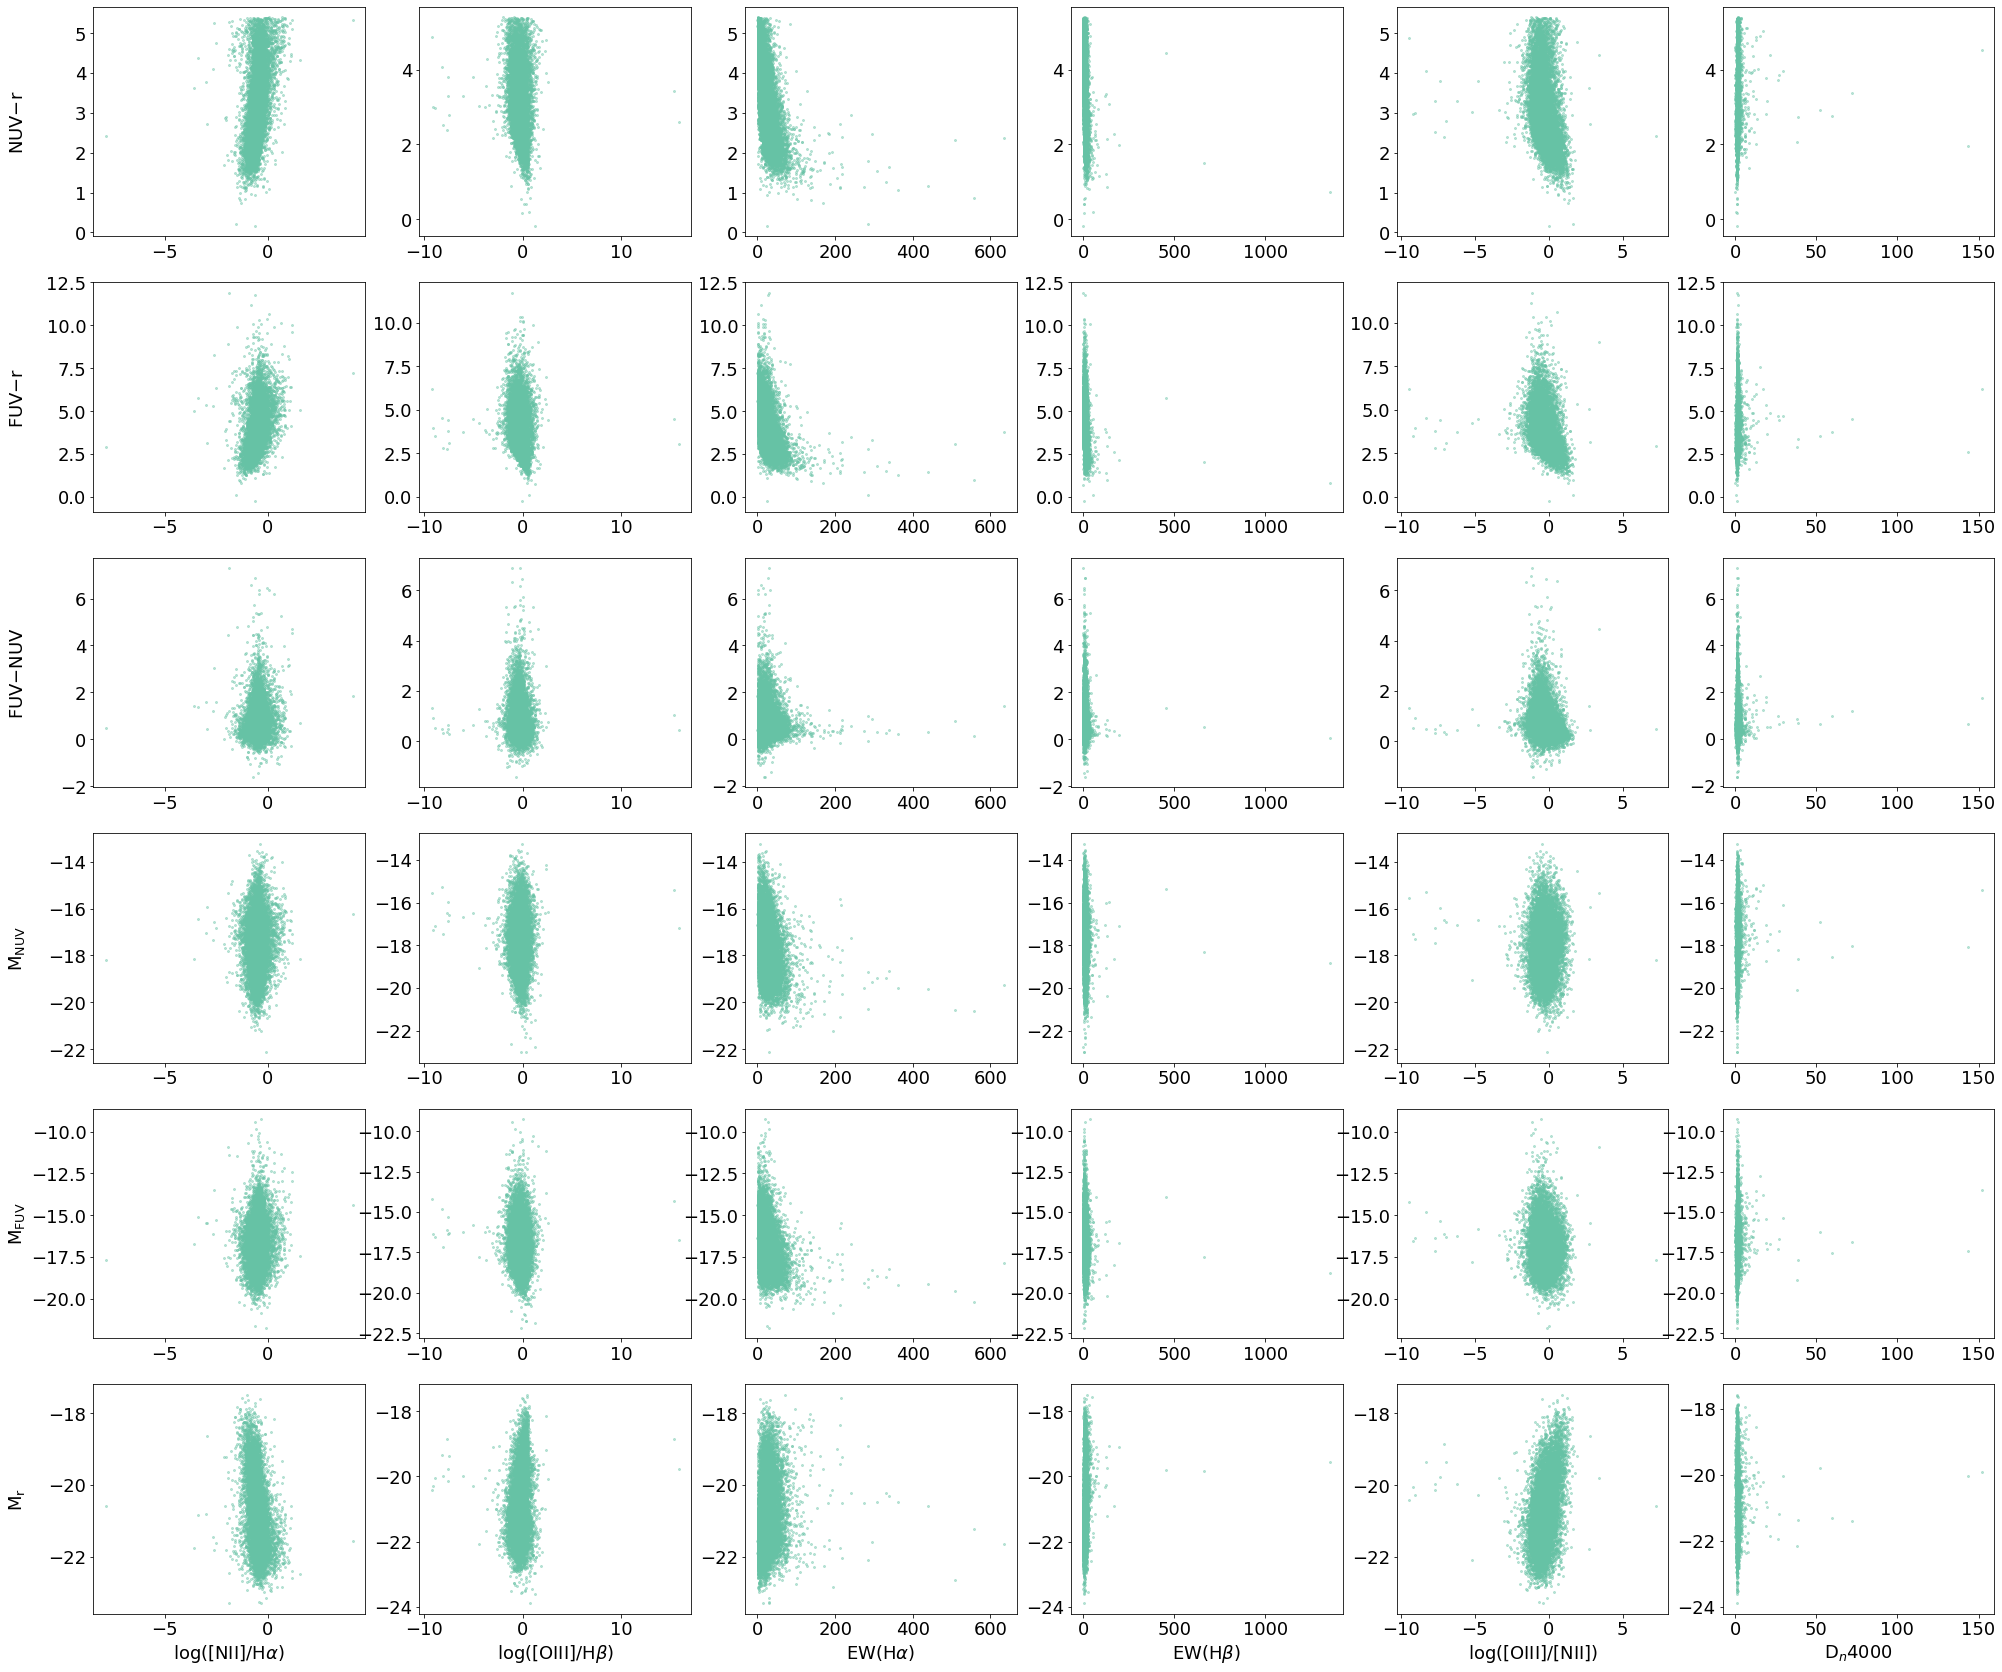

In [95]:
fig, ax = plt.subplots(nrows=6, ncols=6, figsize=(30,24))
plt.subplots_adjust(left=0.08, right=0.96, bottom=0.05, top=0.98)


ax[0,0].plot(np.log10(x9), y9, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[0,0].set_ylabel('NUV$-$r')
ax[1,0].plot(np.log10(x10), y10, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,0].set_ylabel('FUV$-$r')
ax[2,0].plot(np.log10(x11), y11, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,0].set_ylabel('FUV$-$NUV')
ax[3,0].plot(np.log10(x12), y12, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,0].set_ylabel('M$_\mathrm{NUV}$')
ax[4,0].plot(np.log10(x13), y13, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,0].set_ylabel('M$_\mathrm{FUV}$')
ax[5,0].plot(np.log10(x14), y14, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,0].set_ylabel('M$_\mathrm{r}$')
ax[5,0].set_xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')

ax[0,1].plot(np.log10(x15), y15, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,1].plot(np.log10(x16), y16, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,1].plot(np.log10(x17), y17, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,1].plot(np.log10(x18), y18, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,1].plot(np.log10(x19), y19, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,1].plot(np.log10(x20), y20, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,1].set_xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')

ax[0,2].plot(x21, y21, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,2].plot(x22, y22, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,2].plot(x23, y23, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,2].plot(x24, y24, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,2].plot(x25, y25, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,2].plot(x26, y26, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,2].set_xlabel(r'EW(H$\alpha$)')

ax[0,3].plot(x27, y27, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,3].plot(x28, y28, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,3].plot(x29, y29, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,3].plot(x30, y30, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,3].plot(x31, y31, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,3].plot(x32, y32, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,3].set_xlabel(r'EW(H$\beta$)')

ax[0,4].plot(np.log10(1/x33), y33, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,4].plot(np.log10(1/x34), y34, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,4].plot(np.log10(1/x35), y35, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,4].plot(np.log10(1/x36), y36, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,4].plot(np.log10(1/x37), y37, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,4].plot(np.log10(1/x38), y38, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,4].set_xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')

ax[0,5].plot(x39, y39, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,5].plot(x40, y40, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,5].plot(x41, y41, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,5].plot(x42, y42, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,5].plot(x43, y43, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,5].plot(x44, y44, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,5].set_xlabel('D$_n$4000')

fig.align_xlabels(ax[5, :])
fig.align_ylabels(ax[:, 0])

# UV weak

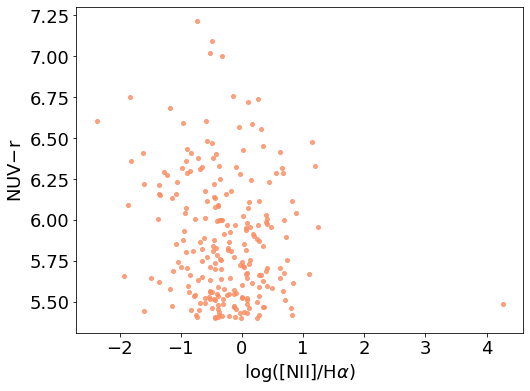

In [96]:
x45 = data_NII_HA_uvweak['NIIR_FLUX_COMP']/data_NII_HA_uvweak['HA_FLUX_COMP']
y45 = data_NII_HA_uvweak['MAG_AB_NUV']-data_NII_HA_uvweak['MAG_AB_R']

plt.plot(np.log10(x45), y45, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel('NUV$-$r')
plt.show()

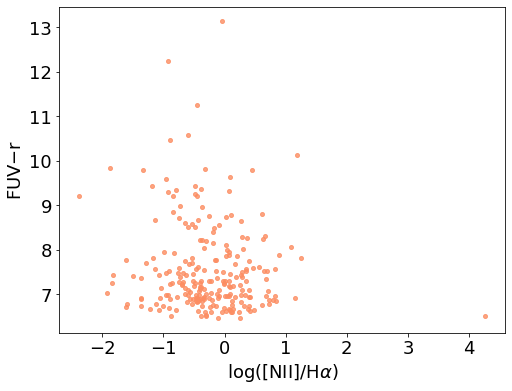

In [97]:
x46 = data_NII_HA_uvweak['NIIR_FLUX_COMP']/data_NII_HA_uvweak['HA_FLUX_COMP']
y46 = data_NII_HA_uvweak['MAG_AB_FUV']-data_NII_HA_uvweak['MAG_AB_R']

plt.plot(np.log10(x46), y46, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel('FUV$-$r')
plt.show()

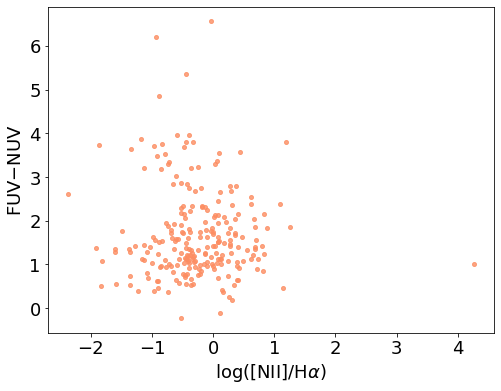

In [98]:
x47 = data_NII_HA_uvweak['NIIR_FLUX_COMP']/data_NII_HA_uvweak['HA_FLUX_COMP']
y47 = data_NII_HA_uvweak['MAG_AB_FUV']-data_NII_HA_uvweak['MAG_AB_NUV']

plt.plot(np.log10(x47), y47, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel('FUV$-$NUV')
plt.show()

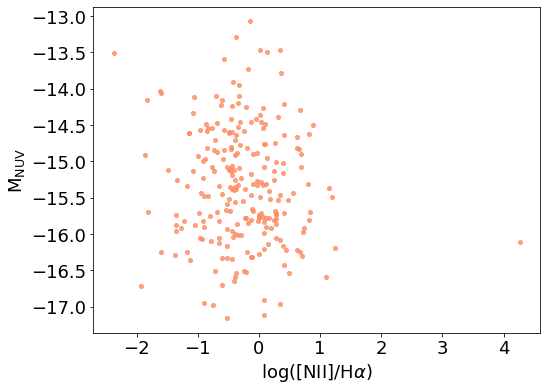

In [99]:
x48 = data_NII_HA_uvweak['NIIR_FLUX_COMP']/data_NII_HA_uvweak['HA_FLUX_COMP']
y48 = data_NII_HA_uvweak['MAG_ABSOLUTE_NUV']

plt.plot(np.log10(x48), y48, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

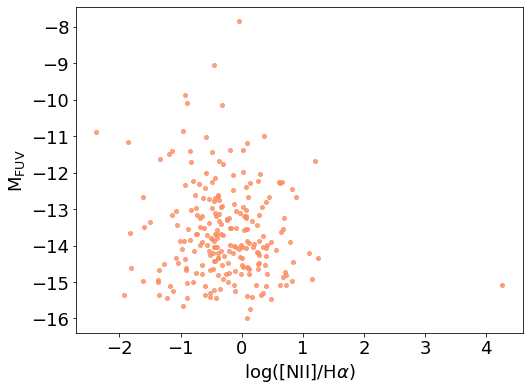

In [100]:
x49 = data_NII_HA_uvweak['NIIR_FLUX_COMP']/data_NII_HA_uvweak['HA_FLUX_COMP']
y49 = data_NII_HA_uvweak['MAG_ABSOLUTE_FUV']

plt.plot(np.log10(x49), y49, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

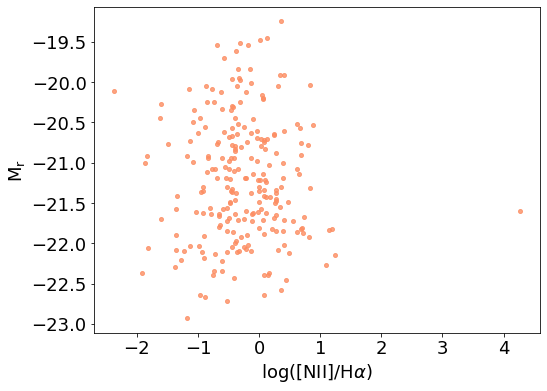

In [101]:
x50 = data_NII_HA_uvweak['NIIR_FLUX_COMP']/data_NII_HA_uvweak['HA_FLUX_COMP']
y50 = data_NII_HA_uvweak['MAG_ABSOLUTE_R']

plt.plot(np.log10(x50), y50, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

In [102]:
x51 = data_OIII_HB_uvweak['OIIIR_FLUX_COMP']/data_OIII_HB_uvweak['HB_FLUX_COMP']
y51 = data_OIII_HB_uvweak['MAG_AB_NUV']-data_OIII_HB_uvweak['MAG_AB_R']

plt.plot(np.log10(x51), y51, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.ylabel('NUV$-$r')
plt.show()

In [103]:
x52 = data_OIII_HB_uvweak['OIIIR_FLUX_COMP']/data_OIII_HB_uvweak['HB_FLUX_COMP']
y52 = data_OIII_HB_uvweak['MAG_AB_FUV']-data_OIII_HB_uvweak['MAG_AB_R']

plt.plot(np.log10(x52), y52, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.ylabel('FUV$-$r')
plt.show()

In [104]:
x53 = data_OIII_HB_uvweak['OIIIR_FLUX_COMP']/data_OIII_HB_uvweak['HB_FLUX_COMP']
y53 = data_OIII_HB_uvweak['MAG_AB_FUV']-data_OIII_HB_uvweak['MAG_AB_NUV']

plt.plot(np.log10(x53), y53, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.ylabel('FUV$-$NUV')
plt.show()

In [105]:
x54 = data_OIII_HB_uvweak['OIIIR_FLUX_COMP']/data_OIII_HB_uvweak['HB_FLUX_COMP']
y54 = data_OIII_HB_uvweak['MAG_ABSOLUTE_NUV']

plt.plot(np.log10(x54), y54, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

In [106]:
x55 = data_OIII_HB_uvweak['OIIIR_FLUX_COMP']/data_OIII_HB_uvweak['HB_FLUX_COMP']
y55 = data_OIII_HB_uvweak['MAG_ABSOLUTE_FUV']

plt.plot(np.log10(x55), y55, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

In [107]:
x56 = data_OIII_HB_uvweak['OIIIR_FLUX_COMP']/data_OIII_HB_uvweak['HB_FLUX_COMP']
y56 = data_OIII_HB_uvweak['MAG_ABSOLUTE_R']

plt.plot(np.log10(x56), y56, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

In [108]:
x57 = data_EW_HA_uvweak['HA_EW_COMP']
y57 = data_EW_HA_uvweak['MAG_AB_NUV']-data_EW_HA_uvweak['MAG_AB_R']

plt.plot(x57, y57, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'EW(H$\alpha$)')
plt.ylabel('NUV$-$r')
plt.show()

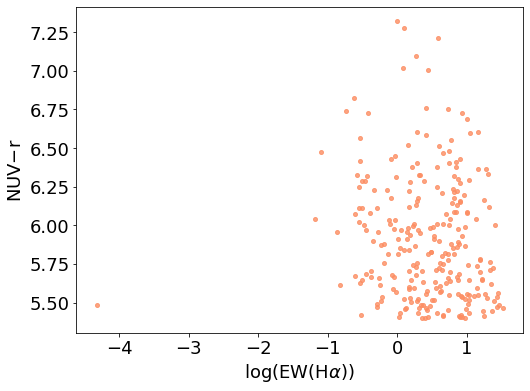

In [109]:
plt.plot(np.log10(x57), y57, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.ylabel('NUV$-$r')
plt.show()

In [110]:
x58 = data_EW_HA_uvweak['HA_EW_COMP']
y58 = data_EW_HA_uvweak['MAG_AB_FUV']-data_EW_HA_uvweak['MAG_AB_R']

plt.plot(x58, y58, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'EW(H$\alpha$)')
plt.ylabel('FUV$-$r')
plt.show()

In [111]:
plt.plot(np.log10(x58), y58, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.ylabel('FUV$-$r')
plt.show()

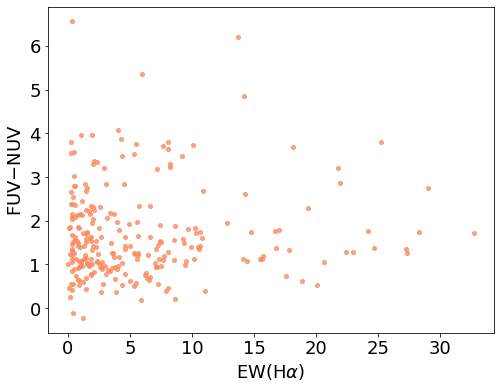

In [112]:
x59 = data_EW_HA_uvweak['HA_EW_COMP']
y59 = data_EW_HA_uvweak['MAG_AB_FUV']-data_EW_HA_uvweak['MAG_AB_NUV']

plt.plot(x59, y59, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'EW(H$\alpha$)')
plt.ylabel('FUV$-$NUV')
plt.show()

In [113]:
plt.plot(np.log10(x59), y59, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.ylabel('FUV$-$NUV')
plt.show()

In [114]:
x60 = data_EW_HA_uvweak['HA_EW_COMP']
y60 = data_EW_HA_uvweak['MAG_ABSOLUTE_NUV']

plt.plot(x60, y60, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'EW(H$\alpha$)')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

In [115]:
plt.plot(np.log10(x60), y60, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

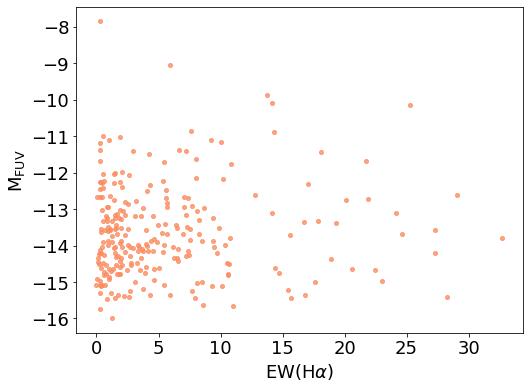

In [116]:
x61 = data_EW_HA_uvweak['HA_EW_COMP']
y61 = data_EW_HA_uvweak['MAG_ABSOLUTE_FUV']

plt.plot(x61, y61, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'EW(H$\alpha$)')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

In [117]:
plt.plot(np.log10(x61), y61, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

In [118]:
x62 = data_EW_HA_uvweak['HA_EW_COMP']
y62 = data_EW_HA_uvweak['MAG_ABSOLUTE_R']

plt.plot(x62, y62, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'EW(H$\alpha$)')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

In [119]:
plt.plot(np.log10(x62), y62, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

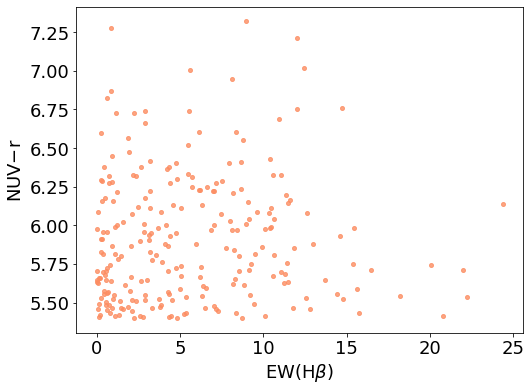

In [120]:
x63 = data_EW_HB_uvweak['HB_EW_COMP']
y63 = data_EW_HB_uvweak['MAG_AB_NUV']-data_EW_HB_uvweak['MAG_AB_R']

plt.plot(x63, y63, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'EW(H$\beta$)')
plt.ylabel('NUV$-$r')
plt.show()

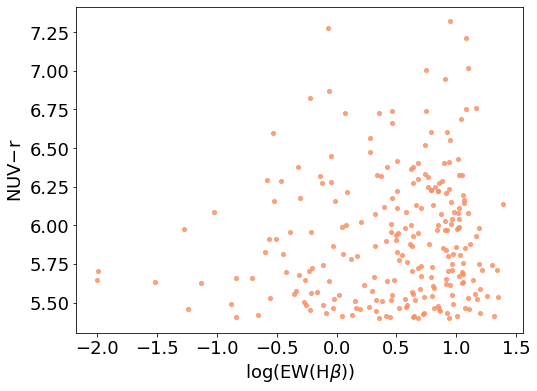

In [121]:
plt.plot(np.log10(x63), y63, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')
plt.ylabel('NUV$-$r')
plt.show()

In [122]:
x64 = data_EW_HB_uvweak['HB_EW_COMP']
y64 = data_EW_HB_uvweak['MAG_AB_FUV']-data_EW_HB_uvweak['MAG_AB_R']

plt.plot(x64, y64, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'EW(H$\beta$)')
plt.ylabel('FUV$-$r')
plt.show()

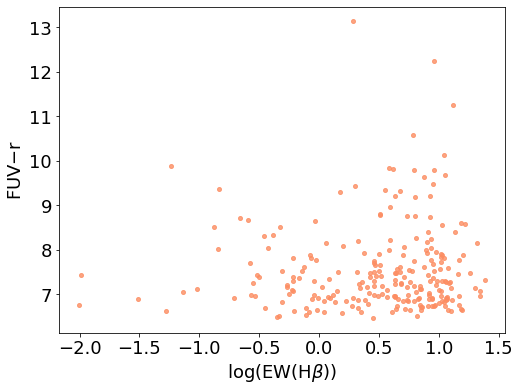

In [123]:
plt.plot(np.log10(x64), y64, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')
plt.ylabel('FUV$-$r')
plt.show()

In [124]:
x65 = data_EW_HB_uvweak['HB_EW_COMP']
y65 = data_EW_HB_uvweak['MAG_AB_FUV']-data_EW_HB_uvweak['MAG_AB_NUV']

plt.plot(x65, y65, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'EW(H$\beta$)')
plt.ylabel('FUV$-$NUV')
plt.show()

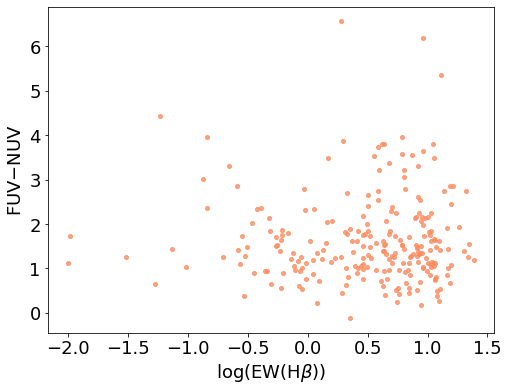

In [125]:
plt.plot(np.log10(x65), y65, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')
plt.ylabel('FUV$-$NUV')
plt.show()

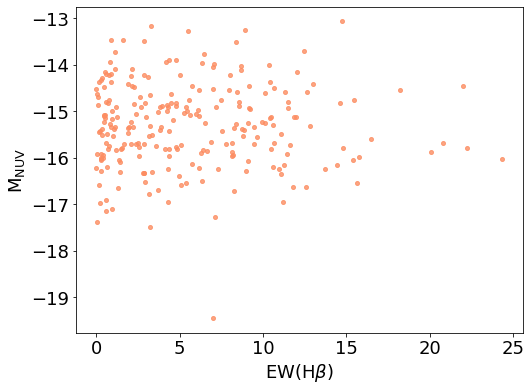

In [126]:
x66 = data_EW_HB_uvweak['HB_EW_COMP']
y66 = data_EW_HB_uvweak['MAG_ABSOLUTE_NUV']

plt.plot(x66, y66, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'EW(H$\beta$)')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

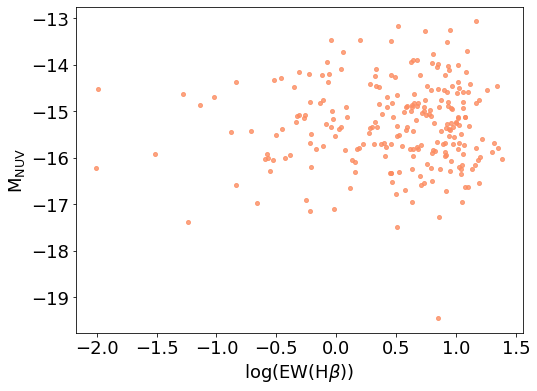

In [127]:
plt.plot(np.log10(x66), y66, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

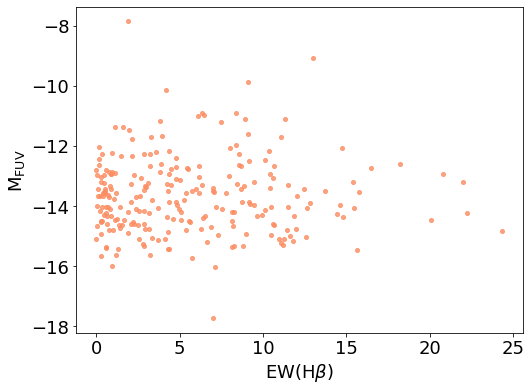

In [128]:
x67 = data_EW_HB_uvweak['HB_EW_COMP']
y67 = data_EW_HB_uvweak['MAG_ABSOLUTE_FUV']

plt.plot(x67, y67, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'EW(H$\beta$)')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

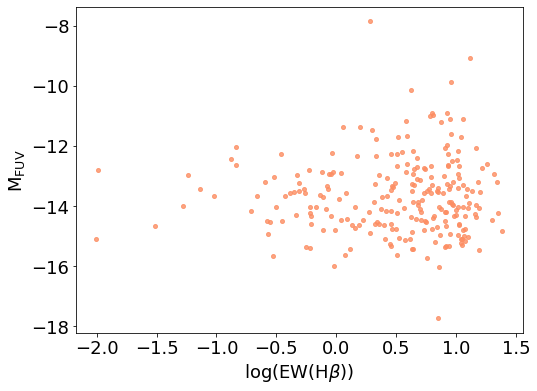

In [129]:
plt.plot(np.log10(x67), y67, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

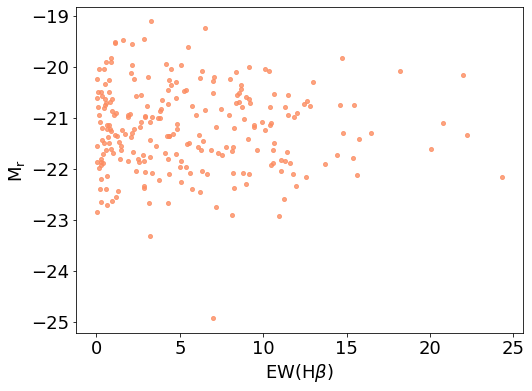

In [130]:
x68 = data_EW_HB_uvweak['HB_EW_COMP']
y68 = data_EW_HB_uvweak['MAG_ABSOLUTE_R']

plt.plot(x68, y68, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'EW(H$\beta$)')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

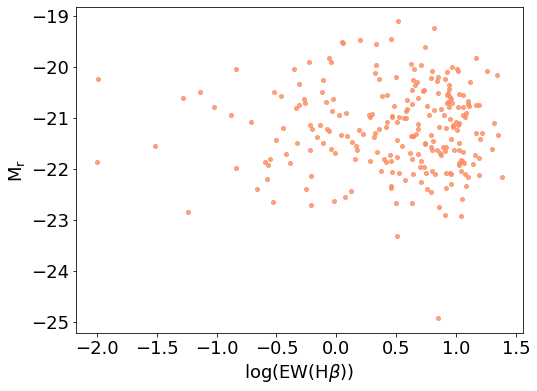

In [131]:
plt.plot(np.log10(x68), y68, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

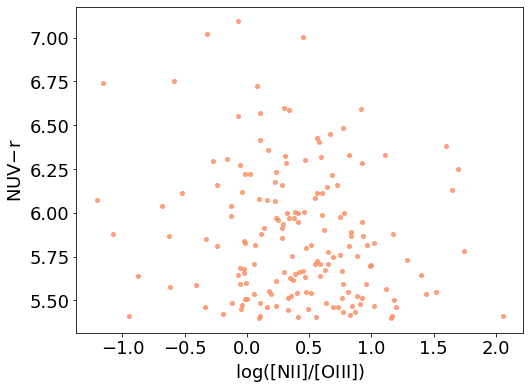

In [132]:
x69 = data_NII_OIII_uvweak['NIIR_FLUX_COMP']/data_NII_OIII_uvweak['OIIIR_FLUX_COMP']
y69 = data_NII_OIII_uvweak['MAG_AB_NUV']-data_NII_OIII_uvweak['MAG_AB_R']

plt.plot(np.log10(x69), y69, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')
plt.ylabel('NUV$-$r')
plt.show()

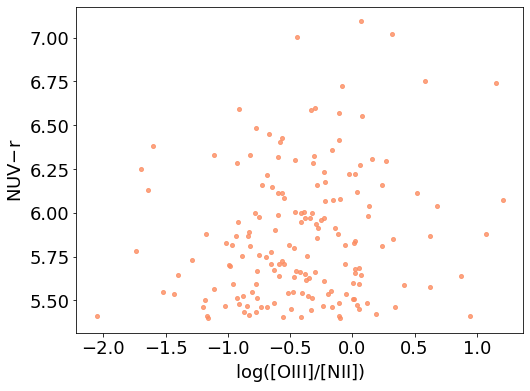

In [133]:
plt.plot(np.log10(1/x69), y69, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')
plt.ylabel('NUV$-$r')
plt.show()

In [134]:
x70 = data_NII_OIII_uvweak['NIIR_FLUX_COMP']/data_NII_OIII_uvweak['OIIIR_FLUX_COMP']
y70 = data_NII_OIII_uvweak['MAG_AB_FUV']-data_NII_OIII_uvweak['MAG_AB_R']

plt.plot(np.log10(x70), y70, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')
plt.ylabel('FUV$-$r')
plt.show()

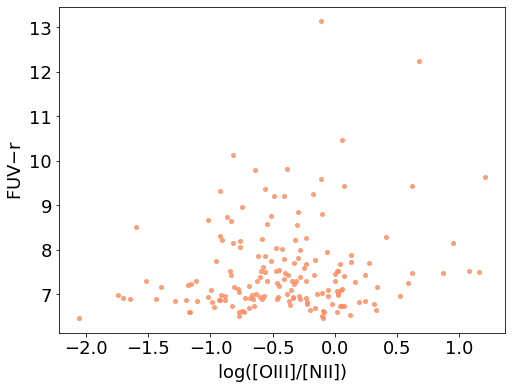

In [135]:
plt.plot(np.log10(1/x70), y70, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')
plt.ylabel('FUV$-$r')
plt.show()

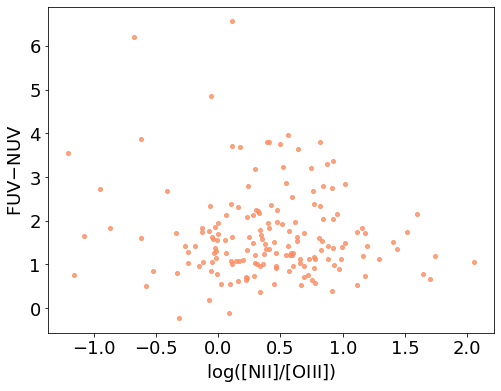

In [136]:
x71 = data_NII_OIII_uvweak['NIIR_FLUX_COMP']/data_NII_OIII_uvweak['OIIIR_FLUX_COMP']
y71 = data_NII_OIII_uvweak['MAG_AB_FUV']-data_NII_OIII_uvweak['MAG_AB_NUV']

plt.plot(np.log10(x71), y71, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')
plt.ylabel('FUV$-$NUV')
plt.show()

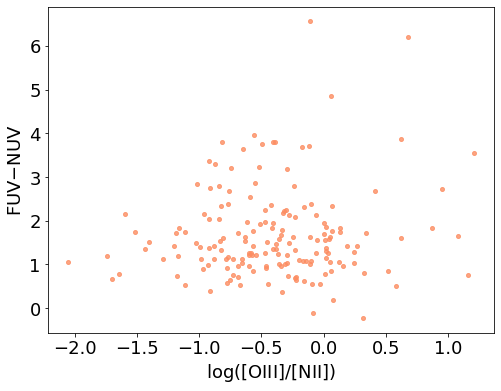

In [137]:
plt.plot(np.log10(1/x71), y71, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')
plt.ylabel('FUV$-$NUV')
plt.show()

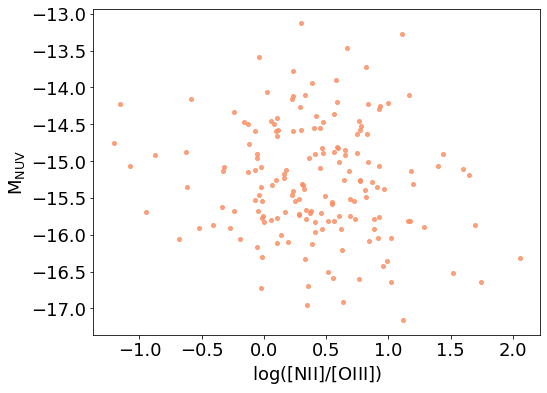

In [138]:
x72 = data_NII_OIII_uvweak['NIIR_FLUX_COMP']/data_NII_OIII_uvweak['OIIIR_FLUX_COMP']
y72 = data_NII_OIII_uvweak['MAG_ABSOLUTE_NUV']

plt.plot(np.log10(x72), y72, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

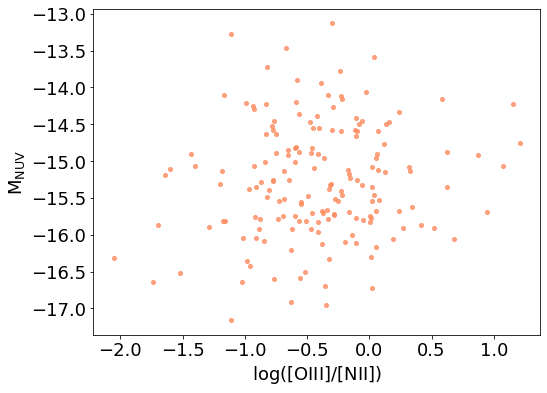

In [139]:
plt.plot(np.log10(1/x72), y72, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

In [140]:
x73 = data_NII_OIII_uvweak['NIIR_FLUX_COMP']/data_NII_OIII_uvweak['OIIIR_FLUX_COMP']
y73 = data_NII_OIII_uvweak['MAG_ABSOLUTE_FUV']

plt.plot(np.log10(x73), y73, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

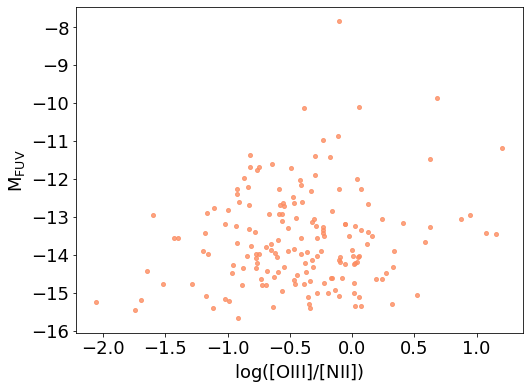

In [141]:
plt.plot(np.log10(1/x73), y73, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

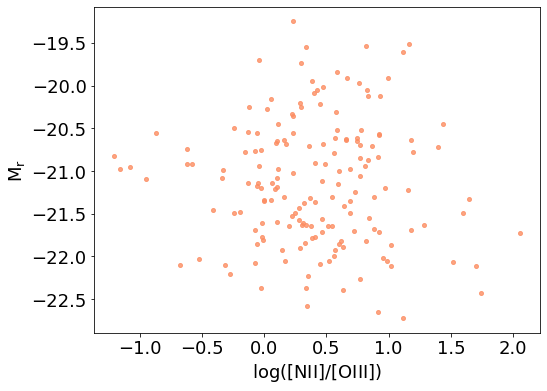

In [142]:
x74 = data_NII_OIII_uvweak['NIIR_FLUX_COMP']/data_NII_OIII_uvweak['OIIIR_FLUX_COMP']
y74 = data_NII_OIII_uvweak['MAG_ABSOLUTE_R']

plt.plot(np.log10(x74), y74, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

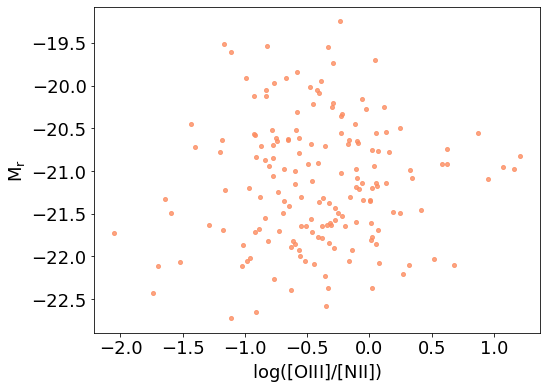

In [143]:
plt.plot(np.log10(1/x74), y74, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

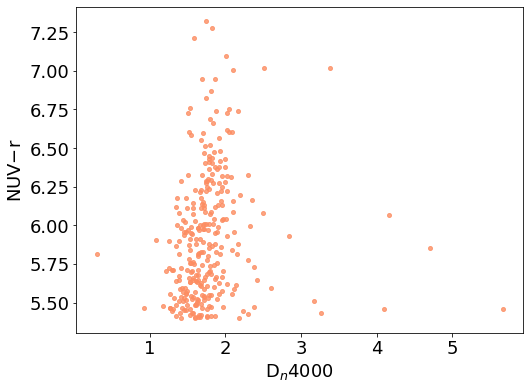

In [144]:
x75 = data_DN4000_uvweak['D4000N']
y75 = data_DN4000_uvweak['MAG_AB_NUV']-data_DN4000_uvweak['MAG_AB_R']

plt.plot(x75, y75, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel('D$_n$4000')
plt.ylabel('NUV$-$r')
plt.show()

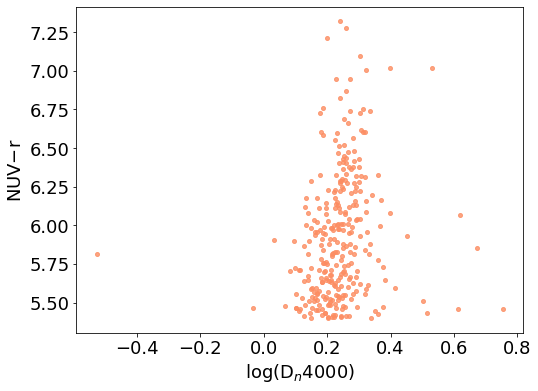

In [145]:
plt.plot(np.log10(x75), y75, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log(\mathrm{D}_n4000)$')
plt.ylabel('NUV$-$r')
plt.show()

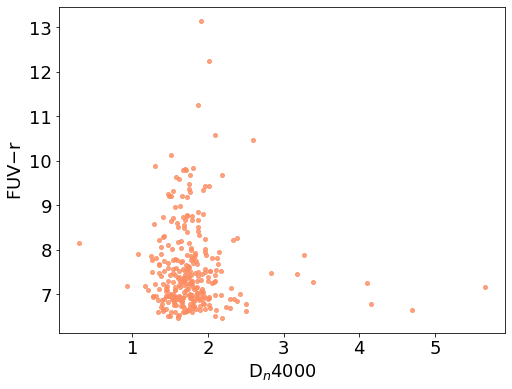

In [146]:
x76 = data_DN4000_uvweak['D4000N']
y76 = data_DN4000_uvweak['MAG_AB_FUV']-data_DN4000_uvweak['MAG_AB_R']

plt.plot(x76, y76, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel('D$_n$4000')
plt.ylabel('FUV$-$r')
plt.show()

In [147]:
plt.plot(np.log10(x76), y76, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log(\mathrm{D}_n4000)$')
plt.ylabel('FUV$-$r')
plt.show()

In [148]:
x77 = data_DN4000_uvweak['D4000N']
y77 = data_DN4000_uvweak['MAG_AB_FUV']-data_DN4000_uvweak['MAG_AB_NUV']

plt.plot(x77, y77, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel('D$_n$4000')
plt.ylabel('FUV$-$NUV')
plt.show()

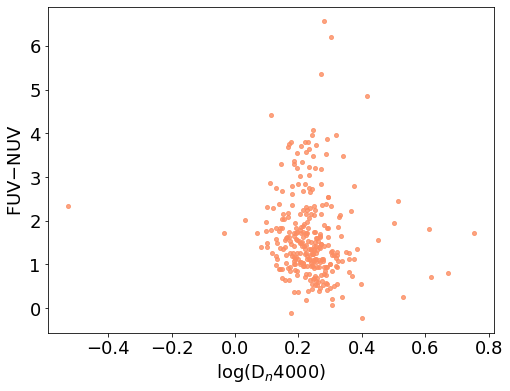

In [149]:
plt.plot(np.log10(x77), y77, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log(\mathrm{D}_n4000)$')
plt.ylabel('FUV$-$NUV')
plt.show()

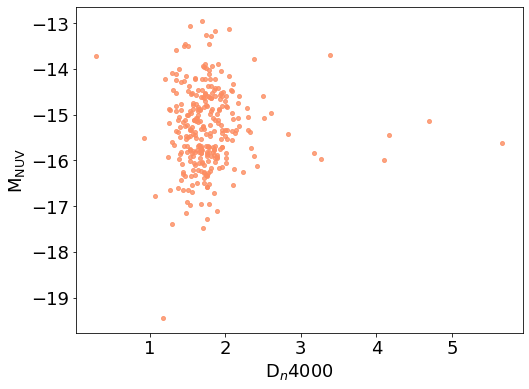

In [150]:
x78 = data_DN4000_uvweak['D4000N']
y78 = data_DN4000_uvweak['MAG_ABSOLUTE_NUV']

plt.plot(x78, y78, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel('D$_n$4000')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

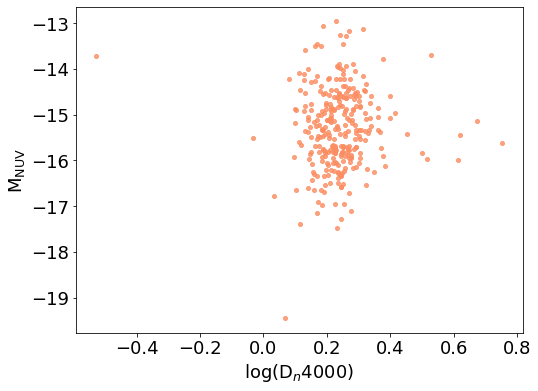

In [151]:
plt.plot(np.log10(x78), y78, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log(\mathrm{D}_n4000)$')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

In [152]:
x79 = data_DN4000_uvweak['D4000N']
y79 = data_DN4000_uvweak['MAG_ABSOLUTE_FUV']

plt.plot(x79, y79, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel('D$_n$4000')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

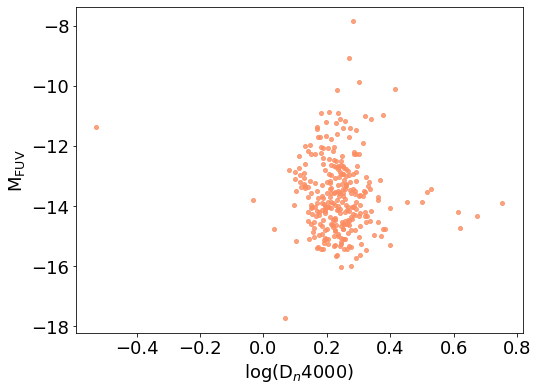

In [153]:
plt.plot(np.log10(x79), y79, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log(\mathrm{D}_n4000)$')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

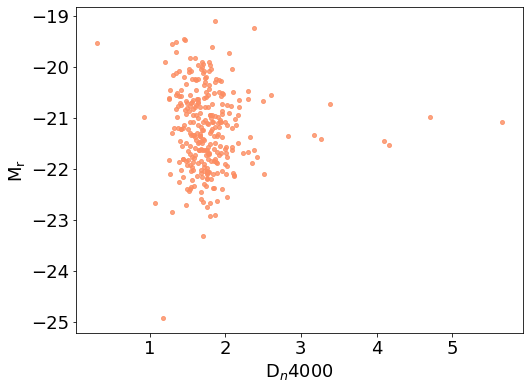

In [154]:
x80 = data_DN4000_uvweak['D4000N']
y80 = data_DN4000_uvweak['MAG_ABSOLUTE_R']

plt.plot(x80, y80, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel('D$_n$4000')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

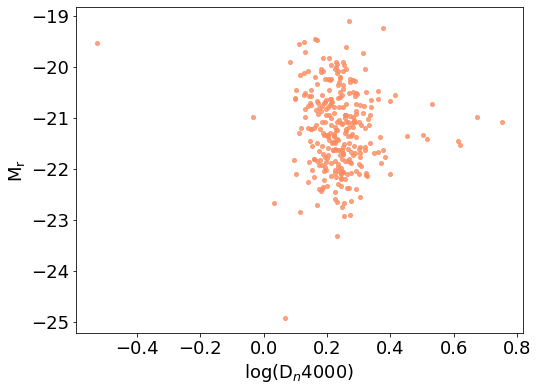

In [155]:
plt.plot(np.log10(x80), y80, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
plt.xlabel(r'$\log(\mathrm{D}_n4000)$')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

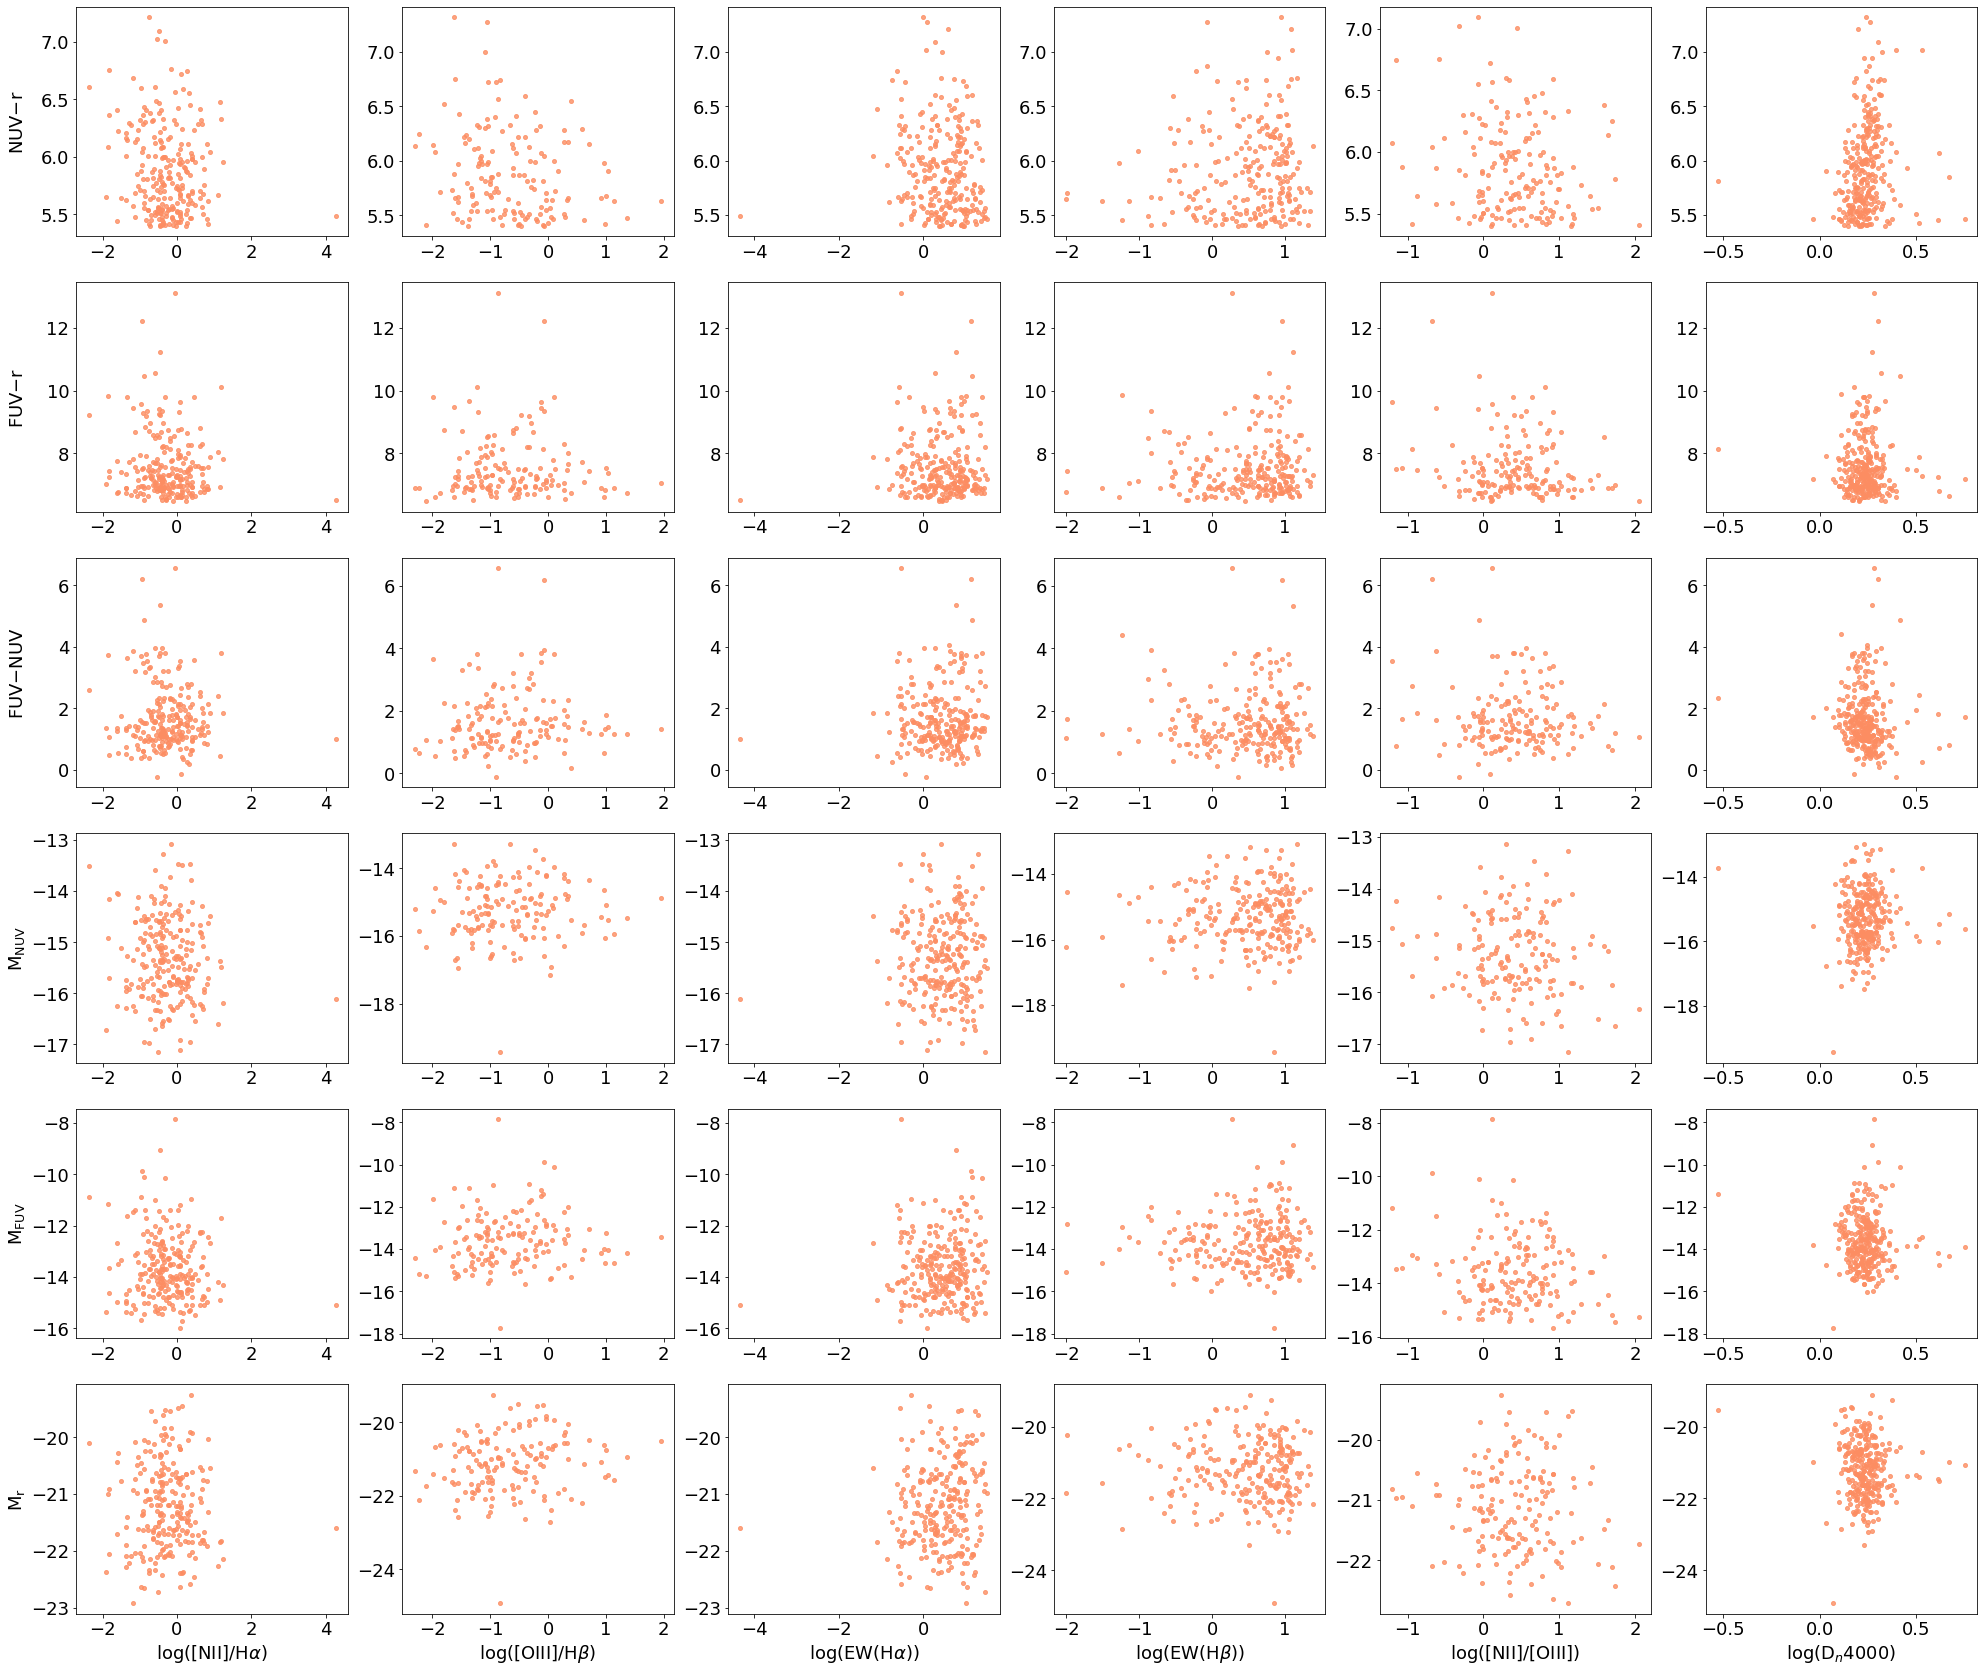

In [156]:
fig, ax = plt.subplots(nrows=6, ncols=6, figsize=(30,24))
plt.subplots_adjust(left=0.08, right=0.96, bottom=0.05, top=0.98)


ax[0,0].plot(np.log10(x45), y45, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[0,0].set_ylabel('NUV$-$r')
ax[1,0].plot(np.log10(x46), y46, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,0].set_ylabel('FUV$-$r')
ax[2,0].plot(np.log10(x47), y47, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,0].set_ylabel('FUV$-$NUV')
ax[3,0].plot(np.log10(x48), y48, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,0].set_ylabel('M$_\mathrm{NUV}$')
ax[4,0].plot(np.log10(x49), y49, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,0].set_ylabel('M$_\mathrm{FUV}$')
ax[5,0].plot(np.log10(x50), y50, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,0].set_ylabel('M$_\mathrm{r}$')
ax[5,0].set_xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')

ax[0,1].plot(np.log10(x51), y51, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,1].plot(np.log10(x52), y52, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,1].plot(np.log10(x53), y53, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,1].plot(np.log10(x54), y54, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,1].plot(np.log10(x55), y55, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,1].plot(np.log10(x56), y56, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,1].set_xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')

ax[0,2].plot(np.log10(x57), y57, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,2].plot(np.log10(x58), y58, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,2].plot(np.log10(x59), y59, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,2].plot(np.log10(x60), y60, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,2].plot(np.log10(x61), y61, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,2].plot(np.log10(x62), y62, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,2].set_xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')

ax[0,3].plot(np.log10(x63), y63, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,3].plot(np.log10(x64), y64, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,3].plot(np.log10(x65), y65, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,3].plot(np.log10(x66), y66, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,3].plot(np.log10(x67), y67, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,3].plot(np.log10(x68), y68, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,3].set_xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')

ax[0,4].plot(np.log10(x69), y69, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,4].plot(np.log10(x70), y70, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,4].plot(np.log10(x71), y71, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,4].plot(np.log10(x72), y72, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,4].plot(np.log10(x73), y73, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,4].plot(np.log10(x74), y74, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,4].set_xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')

ax[0,5].plot(np.log10(x75), y75, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,5].plot(np.log10(x76), y76, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,5].plot(np.log10(x77), y77, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,5].plot(np.log10(x78), y78, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,5].plot(np.log10(x79), y79, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,5].plot(np.log10(x80), y80, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,5].set_xlabel(r'$\log(\mathrm{D}_n4000)$')

fig.align_xlabels(ax[5, :])
fig.align_ylabels(ax[:, 0])

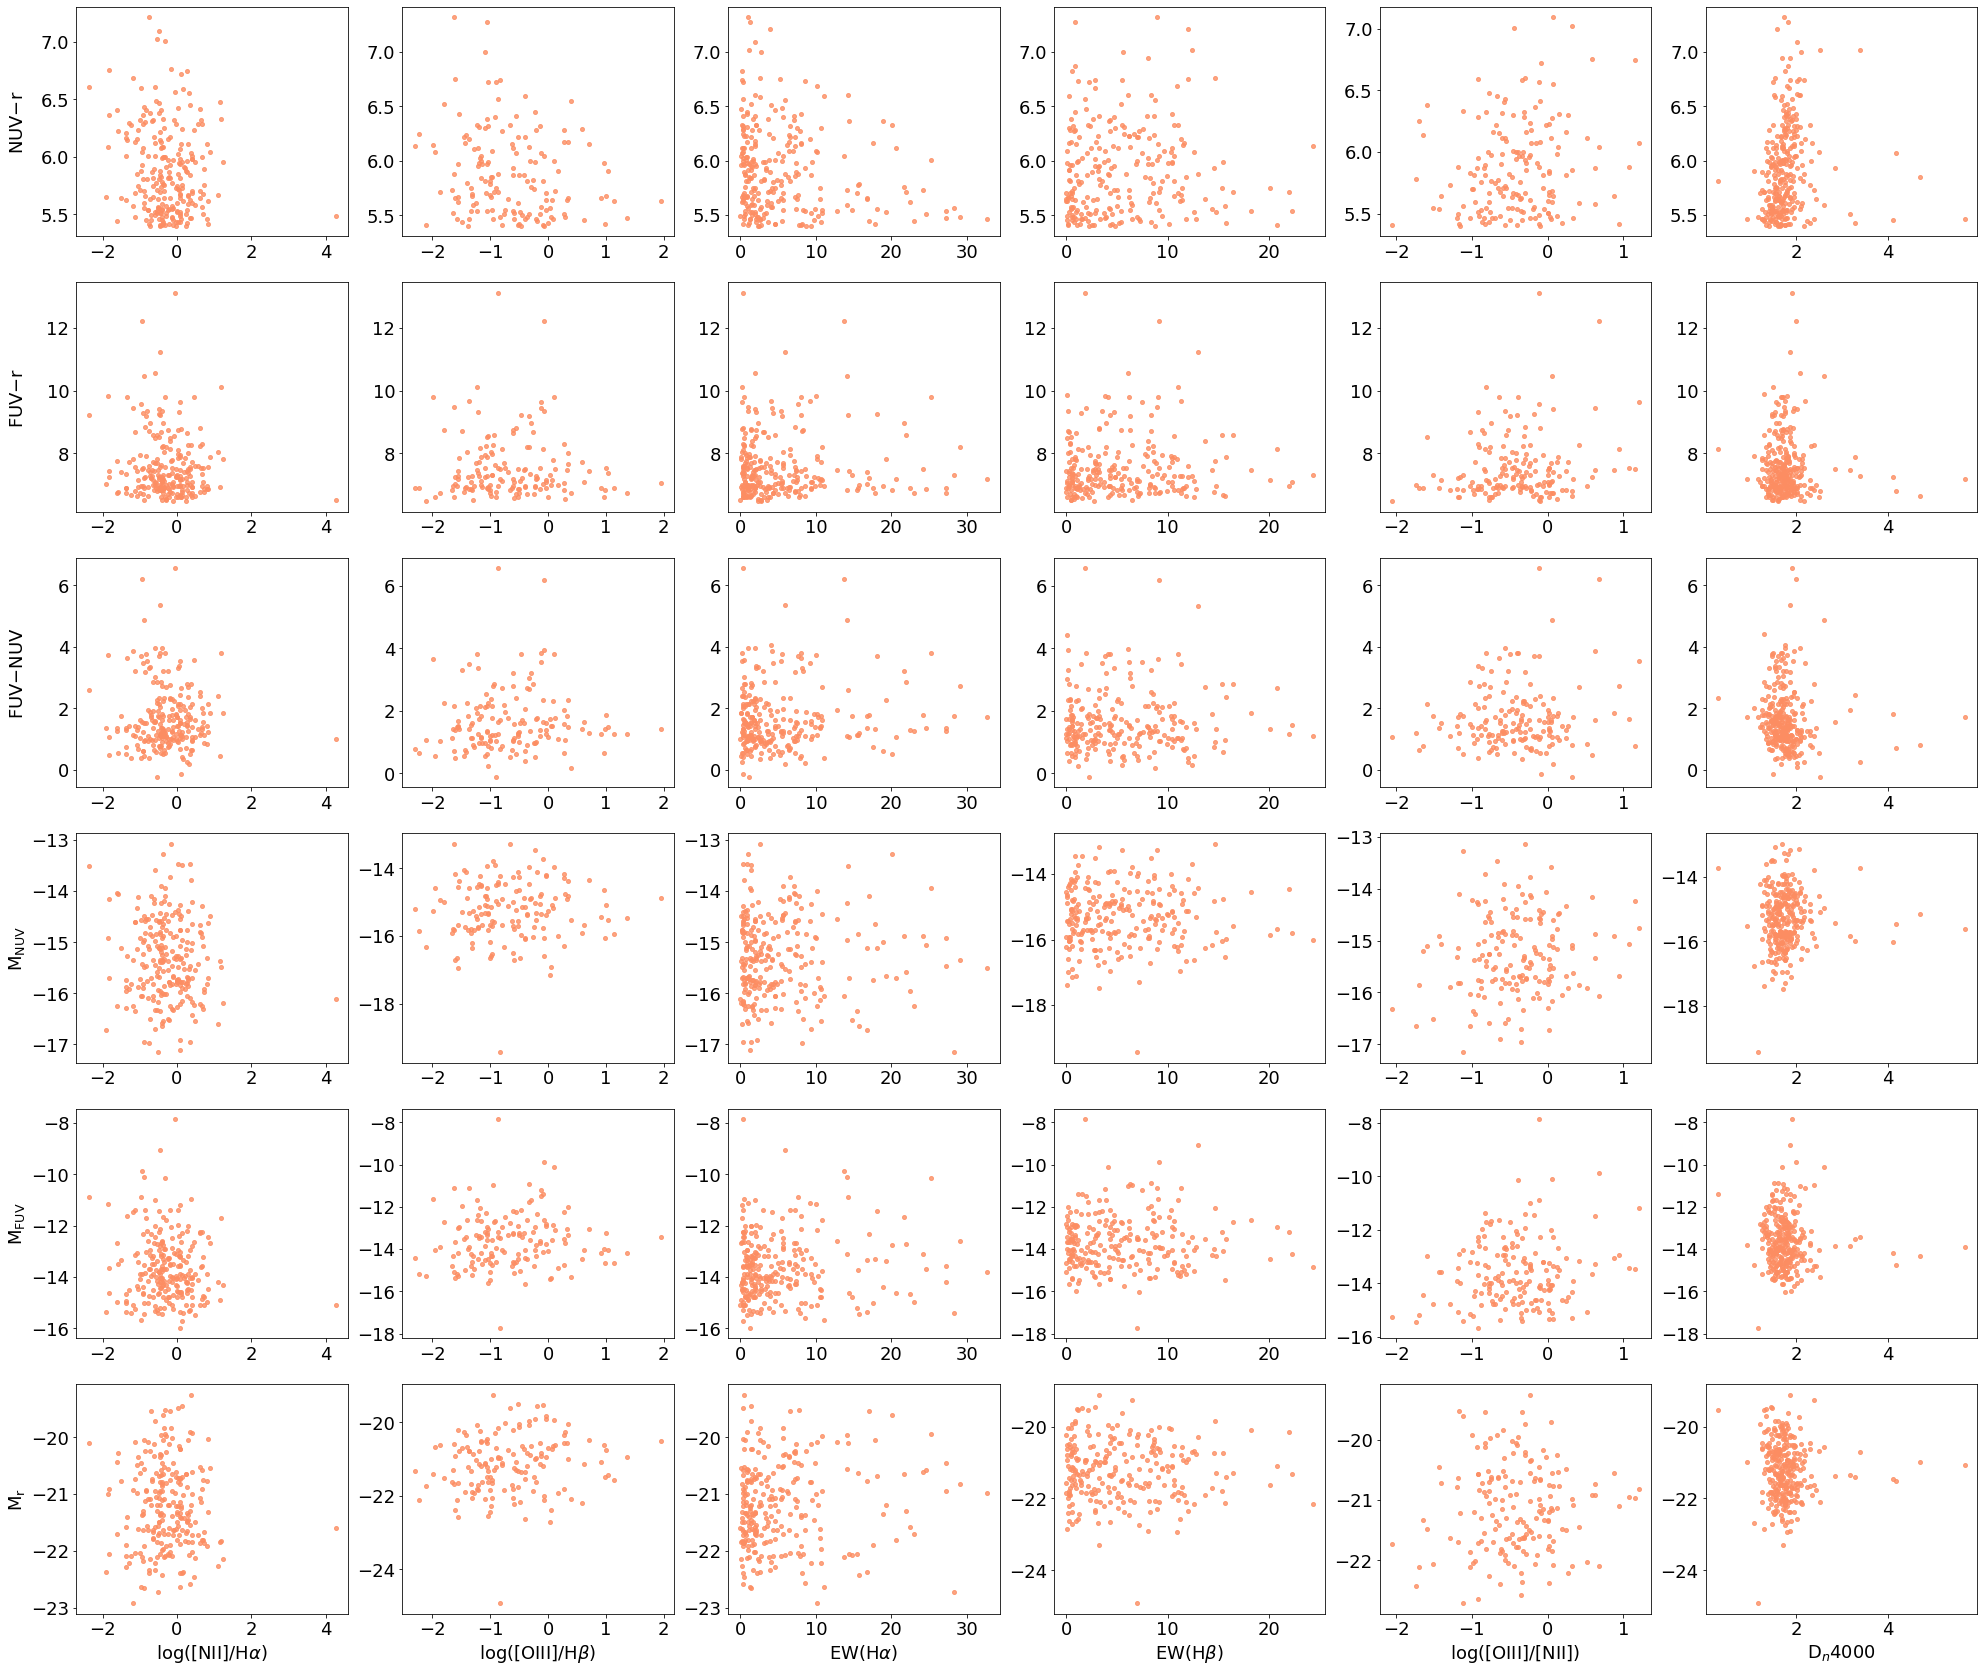

In [157]:
fig, ax = plt.subplots(nrows=6, ncols=6, figsize=(30,24))
plt.subplots_adjust(left=0.08, right=0.96, bottom=0.05, top=0.98)

ax[0,0].plot(np.log10(x45), y45, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[0,0].set_ylabel('NUV$-$r')
ax[1,0].plot(np.log10(x46), y46, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,0].set_ylabel('FUV$-$r')
ax[2,0].plot(np.log10(x47), y47, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,0].set_ylabel('FUV$-$NUV')
ax[3,0].plot(np.log10(x48), y48, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,0].set_ylabel('M$_\mathrm{NUV}$')
ax[4,0].plot(np.log10(x49), y49, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,0].set_ylabel('M$_\mathrm{FUV}$')
ax[5,0].plot(np.log10(x50), y50, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,0].set_ylabel('M$_\mathrm{r}$')
ax[5,0].set_xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')

ax[0,1].plot(np.log10(x51), y51, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,1].plot(np.log10(x52), y52, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,1].plot(np.log10(x53), y53, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,1].plot(np.log10(x54), y54, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,1].plot(np.log10(x55), y55, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,1].plot(np.log10(x56), y56, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,1].set_xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')

ax[0,2].plot(x57, y57, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,2].plot(x58, y58, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,2].plot(x59, y59, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,2].plot(x60, y60, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,2].plot(x61, y61, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,2].plot(x62, y62, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,2].set_xlabel(r'EW(H$\alpha$)')

ax[0,3].plot(x63, y63, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,3].plot(x64, y64, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,3].plot(x65, y65, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,3].plot(x66, y66, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,3].plot(x67, y67, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,3].plot(x68, y68, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,3].set_xlabel(r'EW(H$\beta$)')

ax[0,4].plot(np.log10(1/x69), y69, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,4].plot(np.log10(1/x70), y70, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,4].plot(np.log10(1/x71), y71, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,4].plot(np.log10(1/x72), y72, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,4].plot(np.log10(1/x73), y73, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,4].plot(np.log10(1/x74), y74, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,4].set_xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')

ax[0,5].plot(x75, y75, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,5].plot(x76, y76, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,5].plot(x77, y77, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,5].plot(x78, y78, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,5].plot(x79, y79, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,5].plot(x80, y80, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,5].set_xlabel('D$_n$4000')

fig.align_xlabels(ax[5, :])
fig.align_ylabels(ax[:, 0])

# UV upturn

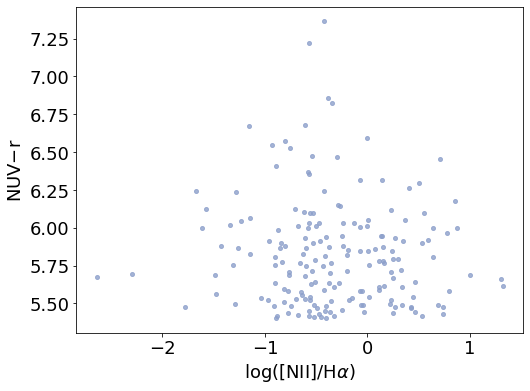

In [158]:
x81 = data_NII_HA_uvupturn['NIIR_FLUX_COMP']/data_NII_HA_uvupturn['HA_FLUX_COMP']
y81 = data_NII_HA_uvupturn['MAG_AB_NUV']-data_NII_HA_uvupturn['MAG_AB_R']

plt.plot(np.log10(x81), y81, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel('NUV$-$r')
plt.show()

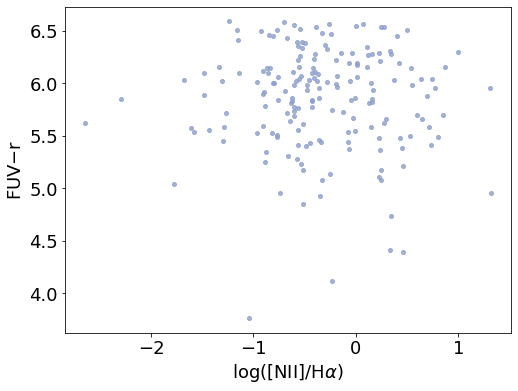

In [159]:
x82 = data_NII_HA_uvupturn['NIIR_FLUX_COMP']/data_NII_HA_uvupturn['HA_FLUX_COMP']
y82 = data_NII_HA_uvupturn['MAG_AB_FUV']-data_NII_HA_uvupturn['MAG_AB_R']

plt.plot(np.log10(x82), y82, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel('FUV$-$r')
plt.show()

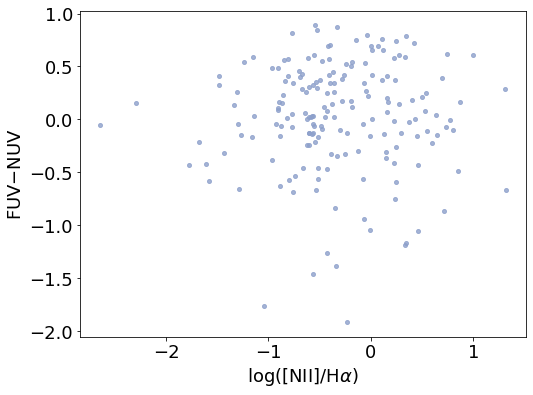

In [160]:
x83 = data_NII_HA_uvupturn['NIIR_FLUX_COMP']/data_NII_HA_uvupturn['HA_FLUX_COMP']
y83 = data_NII_HA_uvupturn['MAG_AB_FUV']-data_NII_HA_uvupturn['MAG_AB_NUV']

plt.plot(np.log10(x83), y83, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel('FUV$-$NUV')
plt.show()

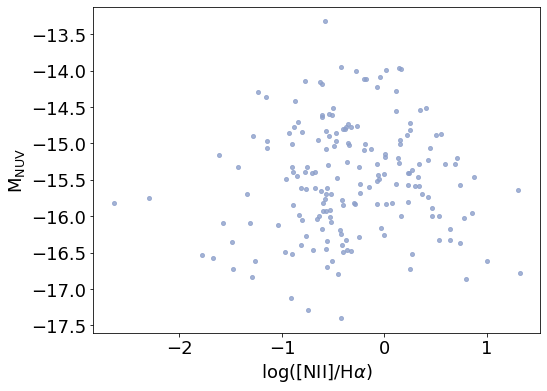

In [161]:
x84 = data_NII_HA_uvupturn['NIIR_FLUX_COMP']/data_NII_HA_uvupturn['HA_FLUX_COMP']
y84 = data_NII_HA_uvupturn['MAG_ABSOLUTE_NUV']

plt.plot(np.log10(x84), y84, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

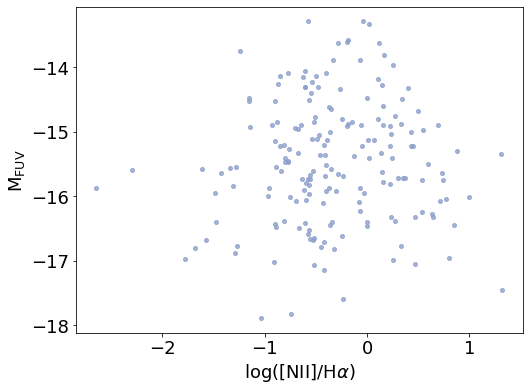

In [162]:
x85 = data_NII_HA_uvupturn['NIIR_FLUX_COMP']/data_NII_HA_uvupturn['HA_FLUX_COMP']
y85 = data_NII_HA_uvupturn['MAG_ABSOLUTE_FUV']

plt.plot(np.log10(x85), y85, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

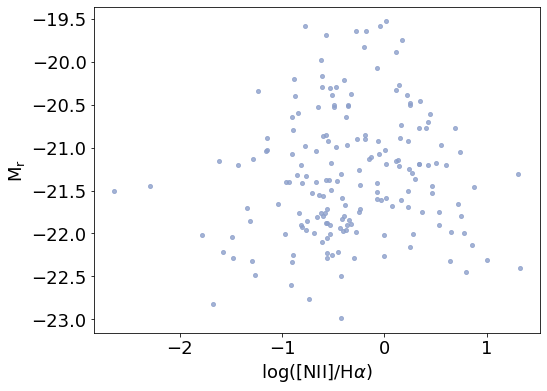

In [163]:
x86 = data_NII_HA_uvupturn['NIIR_FLUX_COMP']/data_NII_HA_uvupturn['HA_FLUX_COMP']
y86 = data_NII_HA_uvupturn['MAG_ABSOLUTE_R']

plt.plot(np.log10(x86), y86, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

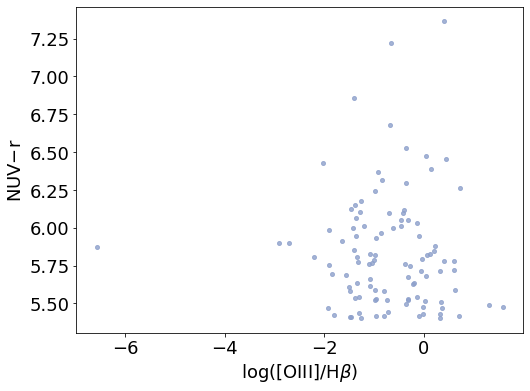

In [164]:
x87 = data_OIII_HB_uvupturn['OIIIR_FLUX_COMP']/data_OIII_HB_uvupturn['HB_FLUX_COMP']
y87 = data_OIII_HB_uvupturn['MAG_AB_NUV']-data_OIII_HB_uvupturn['MAG_AB_R']

plt.plot(np.log10(x87), y87, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.ylabel('NUV$-$r')
plt.show()

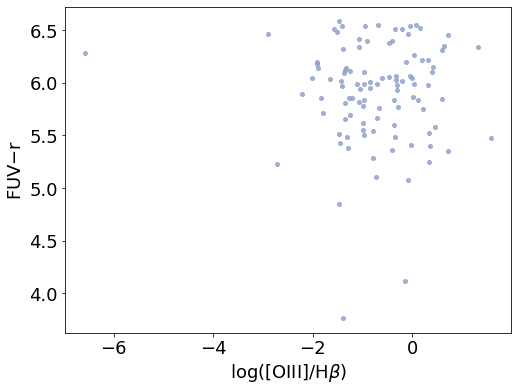

In [165]:
x88 = data_OIII_HB_uvupturn['OIIIR_FLUX_COMP']/data_OIII_HB_uvupturn['HB_FLUX_COMP']
y88 = data_OIII_HB_uvupturn['MAG_AB_FUV']-data_OIII_HB_uvupturn['MAG_AB_R']

plt.plot(np.log10(x88), y88, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.ylabel('FUV$-$r')
plt.show()

In [166]:
x89 = data_OIII_HB_uvupturn['OIIIR_FLUX_COMP']/data_OIII_HB_uvupturn['HB_FLUX_COMP']
y89 = data_OIII_HB_uvupturn['MAG_AB_FUV']-data_OIII_HB_uvupturn['MAG_AB_NUV']

plt.plot(np.log10(x89), y89, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.ylabel('FUV$-$NUV')
plt.show()

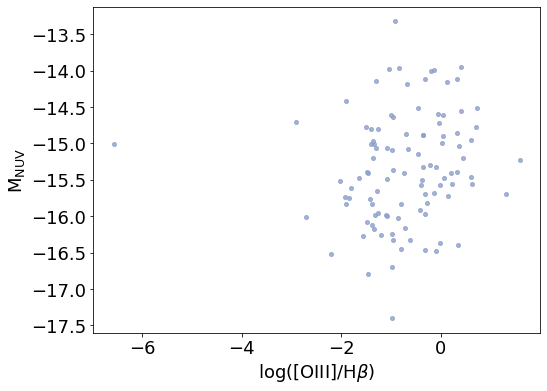

In [167]:
x90 = data_OIII_HB_uvupturn['OIIIR_FLUX_COMP']/data_OIII_HB_uvupturn['HB_FLUX_COMP']
y90 = data_OIII_HB_uvupturn['MAG_ABSOLUTE_NUV']

plt.plot(np.log10(x90), y90, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

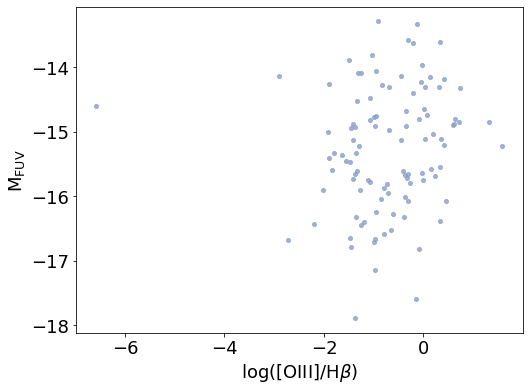

In [168]:
x91 = data_OIII_HB_uvupturn['OIIIR_FLUX_COMP']/data_OIII_HB_uvupturn['HB_FLUX_COMP']
y91 = data_OIII_HB_uvupturn['MAG_ABSOLUTE_FUV']

plt.plot(np.log10(x91), y91, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

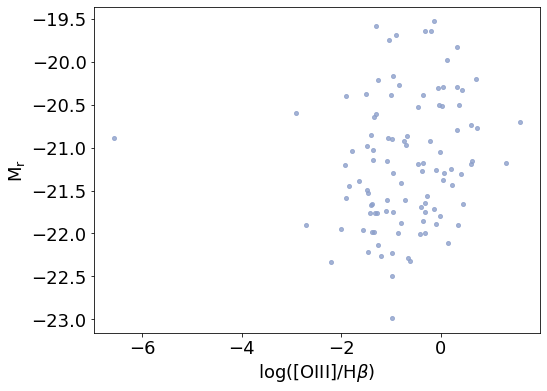

In [169]:
x92 = data_OIII_HB_uvupturn['OIIIR_FLUX_COMP']/data_OIII_HB_uvupturn['HB_FLUX_COMP']
y92 = data_OIII_HB_uvupturn['MAG_ABSOLUTE_R']

plt.plot(np.log10(x92), y92, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

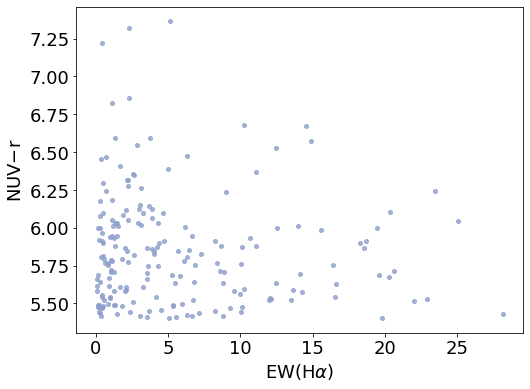

In [170]:
x93 = data_EW_HA_uvupturn['HA_EW_COMP']
y93 = data_EW_HA_uvupturn['MAG_AB_NUV']-data_EW_HA_uvupturn['MAG_AB_R']

plt.plot(x93, y93, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'EW(H$\alpha$)')
plt.ylabel('NUV$-$r')
plt.show()

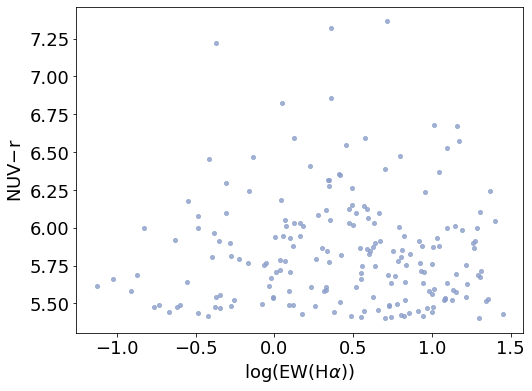

In [171]:
plt.plot(np.log10(x93), y93, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.ylabel('NUV$-$r')
plt.show()

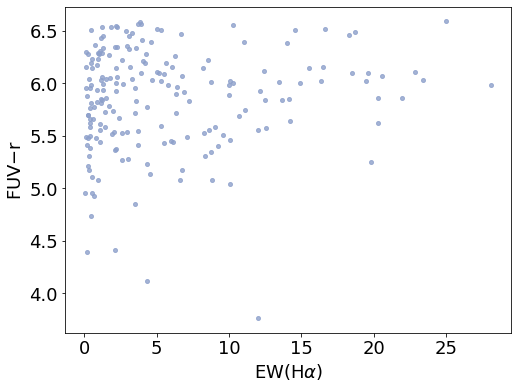

In [172]:
x94 = data_EW_HA_uvupturn['HA_EW_COMP']
y94 = data_EW_HA_uvupturn['MAG_AB_FUV']-data_EW_HA_uvupturn['MAG_AB_R']

plt.plot(x94, y94, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'EW(H$\alpha$)')
plt.ylabel('FUV$-$r')
plt.show()

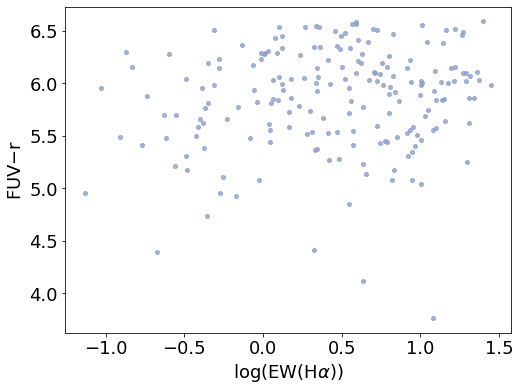

In [173]:
plt.plot(np.log10(x94), y94, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.ylabel('FUV$-$r')
plt.show()

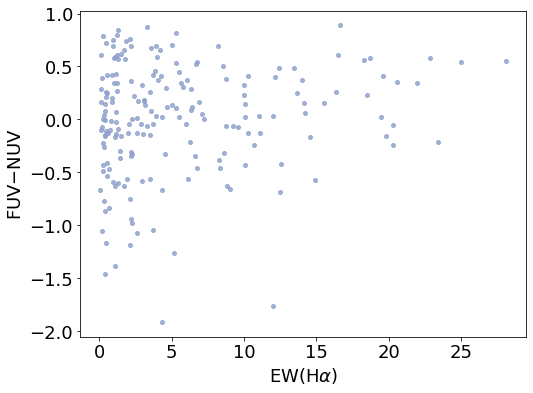

In [174]:
x95 = data_EW_HA_uvupturn['HA_EW_COMP']
y95 = data_EW_HA_uvupturn['MAG_AB_FUV']-data_EW_HA_uvupturn['MAG_AB_NUV']

plt.plot(x95, y95, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'EW(H$\alpha$)')
plt.ylabel('FUV$-$NUV')
plt.show()

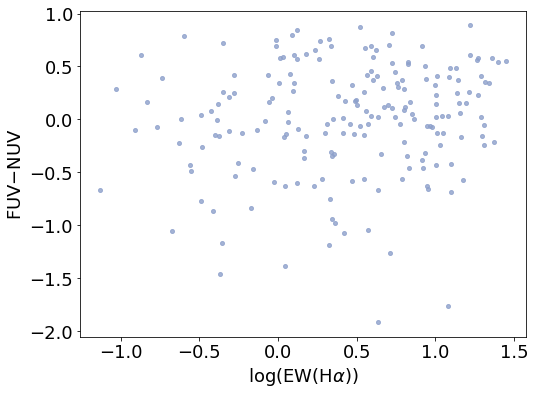

In [175]:
plt.plot(np.log10(x95), y95, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.ylabel('FUV$-$NUV')
plt.show()

In [176]:
x96 = data_EW_HA_uvupturn['HA_EW_COMP']
y96 = data_EW_HA_uvupturn['MAG_ABSOLUTE_NUV']

plt.plot(x96, y96, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'EW(H$\alpha$)')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

In [177]:
plt.plot(np.log10(x96), y96, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

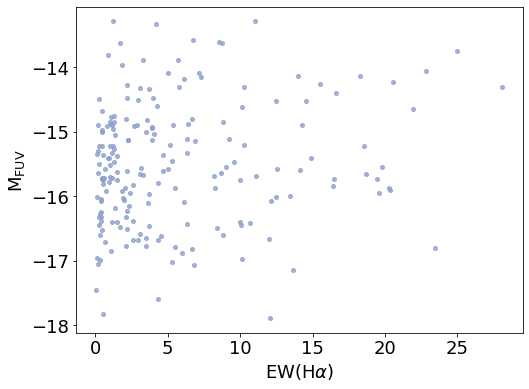

In [178]:
x97 = data_EW_HA_uvupturn['HA_EW_COMP']
y97 = data_EW_HA_uvupturn['MAG_ABSOLUTE_FUV']

plt.plot(x97, y97, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'EW(H$\alpha$)')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

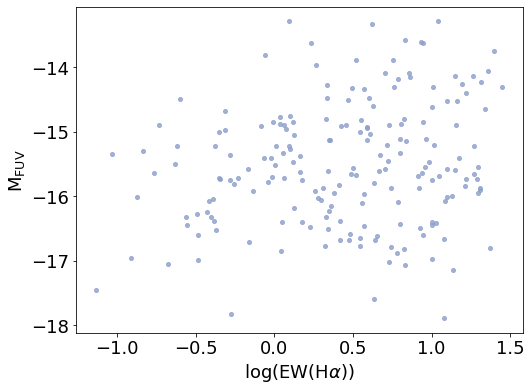

In [179]:
plt.plot(np.log10(x97), y97, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

In [180]:
x98 = data_EW_HA_uvupturn['HA_EW_COMP']
y98 = data_EW_HA_uvupturn['MAG_ABSOLUTE_R']

plt.plot(x98, y98, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'EW(H$\alpha$)')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

In [181]:
plt.plot(np.log10(x98), y98, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

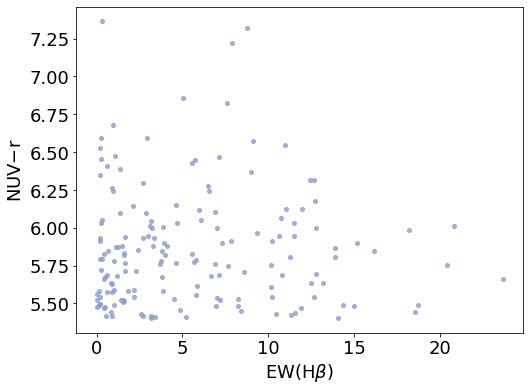

In [182]:
x99 = data_EW_HB_uvupturn['HB_EW_COMP']
y99 = data_EW_HB_uvupturn['MAG_AB_NUV']-data_EW_HB_uvupturn['MAG_AB_R']

plt.plot(x99, y99, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'EW(H$\beta$)')
plt.ylabel('NUV$-$r')
plt.show()

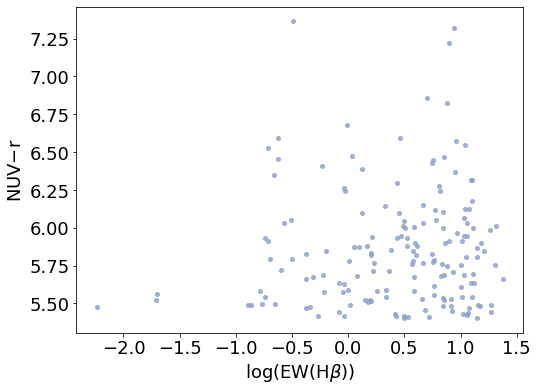

In [183]:
plt.plot(np.log10(x99), y99, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')
plt.ylabel('NUV$-$r')
plt.show()

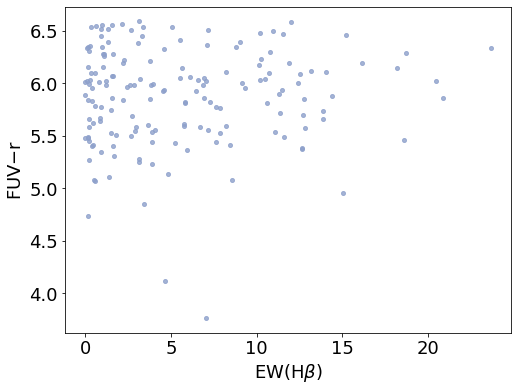

In [184]:
x100 = data_EW_HB_uvupturn['HB_EW_COMP']
y100 = data_EW_HB_uvupturn['MAG_AB_FUV']-data_EW_HB_uvupturn['MAG_AB_R']

plt.plot(x100, y100, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'EW(H$\beta$)')
plt.ylabel('FUV$-$r')
plt.show()

In [185]:
plt.plot(np.log10(x100), y100, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')
plt.ylabel('FUV$-$r')
plt.show()

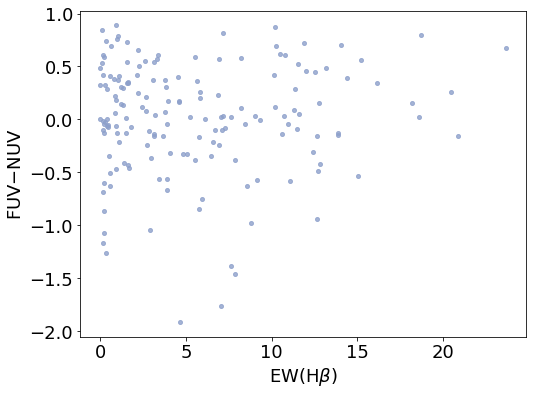

In [186]:
x101 = data_EW_HB_uvupturn['HB_EW_COMP']
y101 = data_EW_HB_uvupturn['MAG_AB_FUV']-data_EW_HB_uvupturn['MAG_AB_NUV']

plt.plot(x101, y101, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'EW(H$\beta$)')
plt.ylabel('FUV$-$NUV')
plt.show()

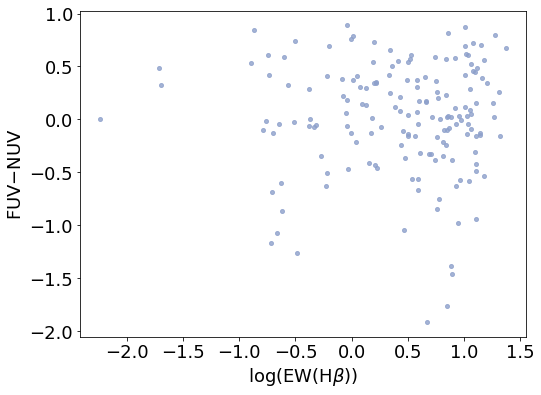

In [187]:
plt.plot(np.log10(x101), y101, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')
plt.ylabel('FUV$-$NUV')
plt.show()

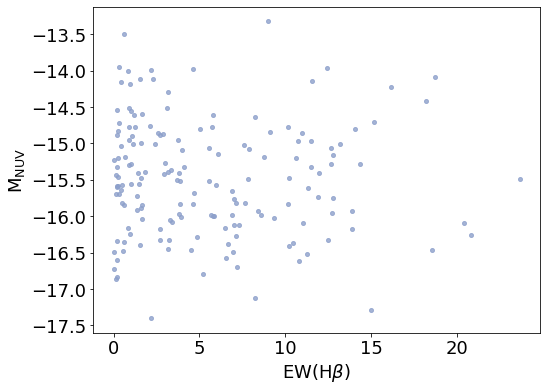

In [188]:
x102 = data_EW_HB_uvupturn['HB_EW_COMP']
y102 = data_EW_HB_uvupturn['MAG_ABSOLUTE_NUV']

plt.plot(x102, y102, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'EW(H$\beta$)')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

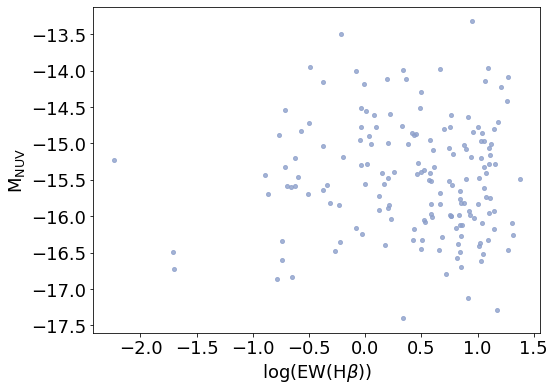

In [189]:
plt.plot(np.log10(x102), y102, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

In [190]:
x103 = data_EW_HB_uvupturn['HB_EW_COMP']
y103 = data_EW_HB_uvupturn['MAG_ABSOLUTE_FUV']

plt.plot(x103, y103, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'EW(H$\beta$)')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

In [191]:
plt.plot(np.log10(x103), y103, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

In [192]:
x104 = data_EW_HB_uvupturn['HB_EW_COMP']
y104 = data_EW_HB_uvupturn['MAG_ABSOLUTE_R']

plt.plot(x104, y104, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'EW(H$\beta$)')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

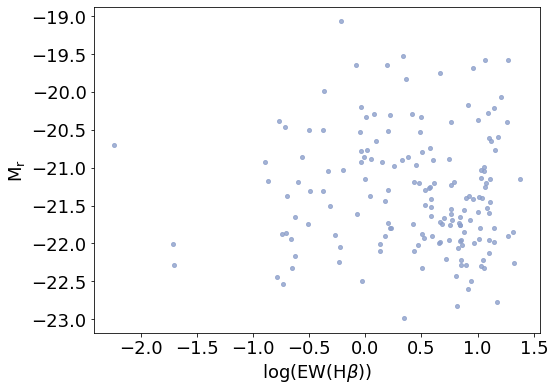

In [193]:
plt.plot(np.log10(x104), y104, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

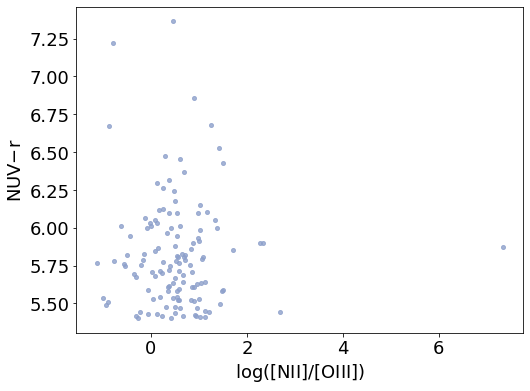

In [194]:
x105 = data_NII_OIII_uvupturn['NIIR_FLUX_COMP']/data_NII_OIII_uvupturn['OIIIR_FLUX_COMP']
y105 = data_NII_OIII_uvupturn['MAG_AB_NUV']-data_NII_OIII_uvupturn['MAG_AB_R']

plt.plot(np.log10(x105), y105, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')
plt.ylabel('NUV$-$r')
plt.show()

In [195]:
plt.plot(np.log10(1/x105), y105, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')
plt.ylabel('NUV$-$r')
plt.show()

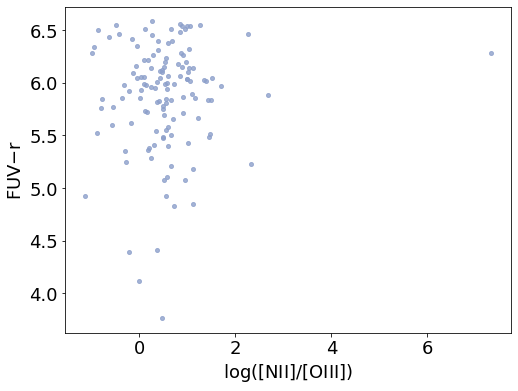

In [196]:
x106 = data_NII_OIII_uvupturn['NIIR_FLUX_COMP']/data_NII_OIII_uvupturn['OIIIR_FLUX_COMP']
y106 = data_NII_OIII_uvupturn['MAG_AB_FUV']-data_NII_OIII_uvupturn['MAG_AB_R']

plt.plot(np.log10(x106), y106, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')
plt.ylabel('FUV$-$r')
plt.show()

In [197]:
plt.plot(np.log10(1/x106), y106, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')
plt.ylabel('FUV$-$r')
plt.show()

In [198]:
x107 = data_NII_OIII_uvupturn['NIIR_FLUX_COMP']/data_NII_OIII_uvupturn['OIIIR_FLUX_COMP']
y107 = data_NII_OIII_uvupturn['MAG_AB_FUV']-data_NII_OIII_uvupturn['MAG_AB_NUV']

plt.plot(np.log10(x107), y107, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')
plt.ylabel('FUV$-$NUV')
plt.show()

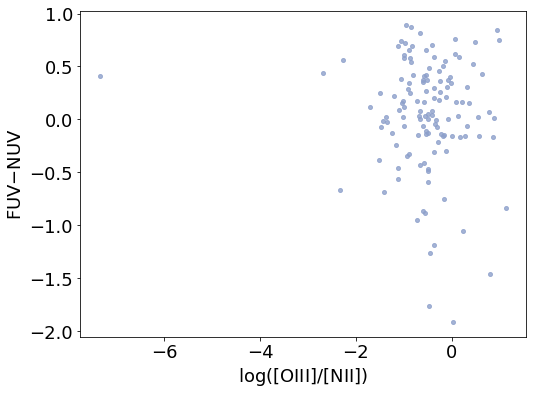

In [199]:
plt.plot(np.log10(1/x107), y107, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')
plt.ylabel('FUV$-$NUV')
plt.show()

In [200]:
x108 = data_NII_OIII_uvupturn['NIIR_FLUX_COMP']/data_NII_OIII_uvupturn['OIIIR_FLUX_COMP']
y108 = data_NII_OIII_uvupturn['MAG_ABSOLUTE_NUV']

plt.plot(np.log10(x108), y108, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

In [201]:
plt.plot(np.log10(1/x108), y108, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

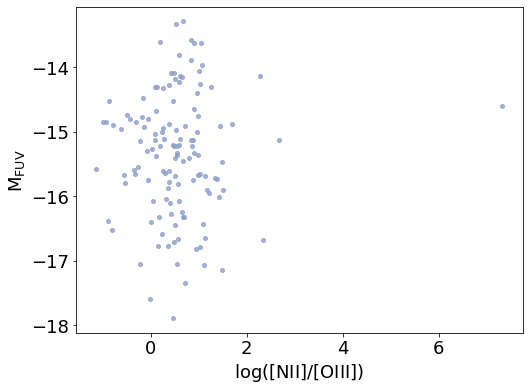

In [202]:
x109 = data_NII_OIII_uvupturn['NIIR_FLUX_COMP']/data_NII_OIII_uvupturn['OIIIR_FLUX_COMP']
y109 = data_NII_OIII_uvupturn['MAG_ABSOLUTE_FUV']

plt.plot(np.log10(x109), y109, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

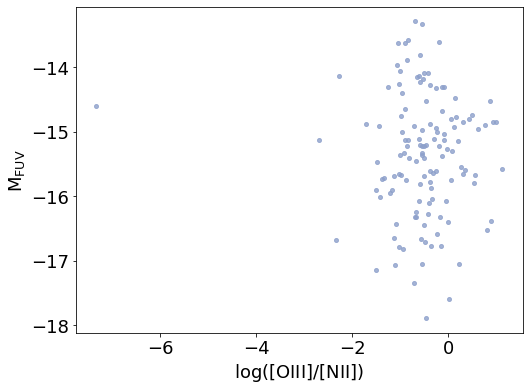

In [203]:
plt.plot(np.log10(1/x109), y109, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

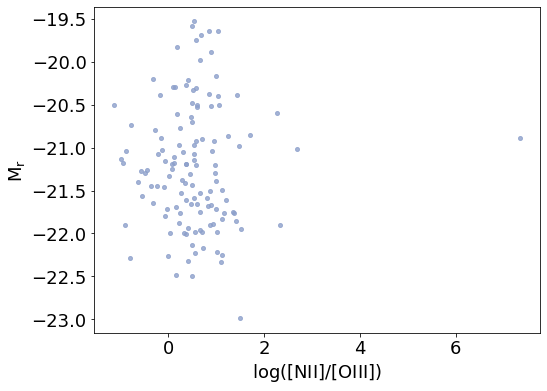

In [204]:
x110 = data_NII_OIII_uvupturn['NIIR_FLUX_COMP']/data_NII_OIII_uvupturn['OIIIR_FLUX_COMP']
y110 = data_NII_OIII_uvupturn['MAG_ABSOLUTE_R']

plt.plot(np.log10(x110), y110, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

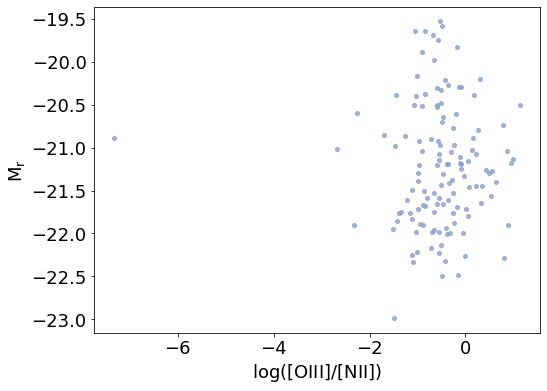

In [205]:
plt.plot(np.log10(1/x110), y110, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

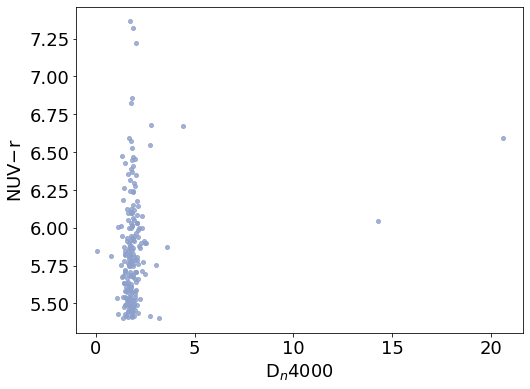

In [206]:
x111 = data_DN4000_uvupturn['D4000N']
y111 = data_DN4000_uvupturn['MAG_AB_NUV']-data_DN4000_uvupturn['MAG_AB_R']

plt.plot(x111, y111, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel('D$_n$4000')
plt.ylabel('NUV$-$r')
plt.show()

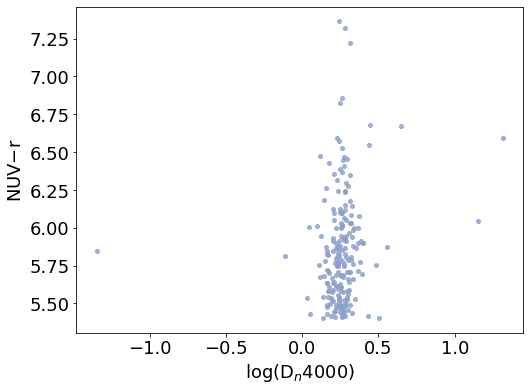

In [207]:
plt.plot(np.log10(x111), y111, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log(\mathrm{D}_n4000)$')
plt.ylabel('NUV$-$r')
plt.show()

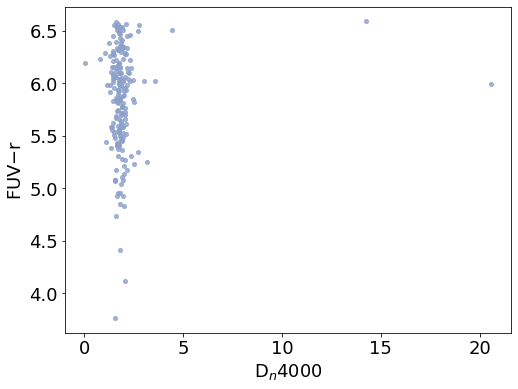

In [208]:
x112 = data_DN4000_uvupturn['D4000N']
y112 = data_DN4000_uvupturn['MAG_AB_FUV']-data_DN4000_uvupturn['MAG_AB_R']

plt.plot(x112, y112, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel('D$_n$4000')
plt.ylabel('FUV$-$r')
plt.show()

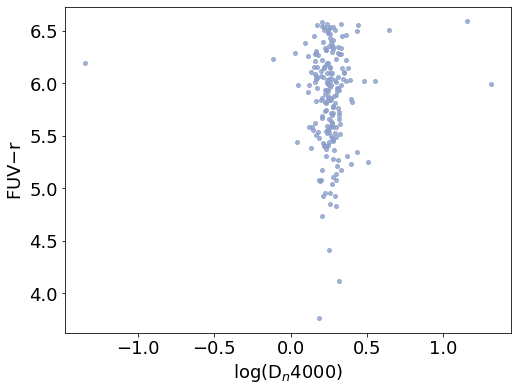

In [209]:
plt.plot(np.log10(x112), y112, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log(\mathrm{D}_n4000)$')
plt.ylabel('FUV$-$r')
plt.show()

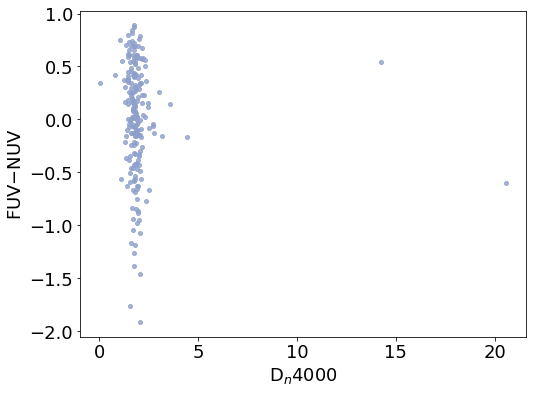

In [210]:
x113 = data_DN4000_uvupturn['D4000N']
y113 = data_DN4000_uvupturn['MAG_AB_FUV']-data_DN4000_uvupturn['MAG_AB_NUV']

plt.plot(x113, y113, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel('D$_n$4000')
plt.ylabel('FUV$-$NUV')
plt.show()

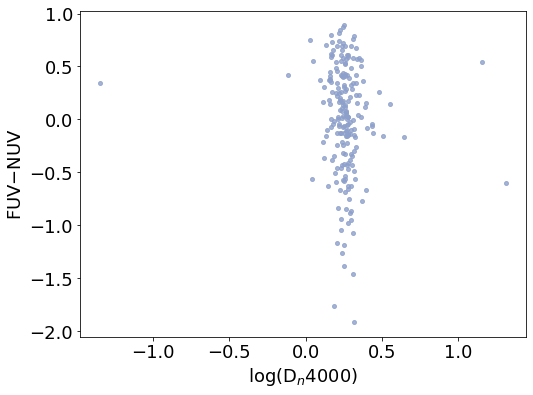

In [211]:
plt.plot(np.log10(x113), y113, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log(\mathrm{D}_n4000)$')
plt.ylabel('FUV$-$NUV')
plt.show()

In [212]:
x114 = data_DN4000_uvupturn['D4000N']
y114 = data_DN4000_uvupturn['MAG_ABSOLUTE_NUV']

plt.plot(x114, y114, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel('D$_n$4000')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

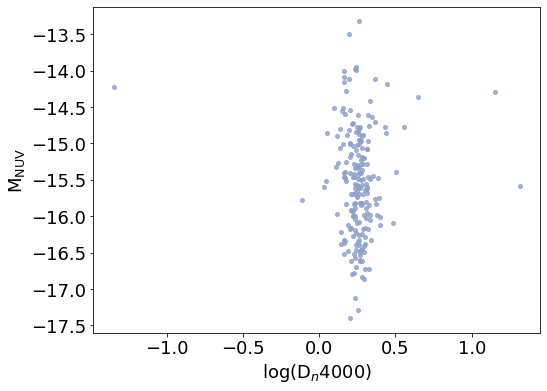

In [213]:
plt.plot(np.log10(x114), y114, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log(\mathrm{D}_n4000)$')
plt.ylabel('M$_\mathrm{NUV}$')
plt.show()

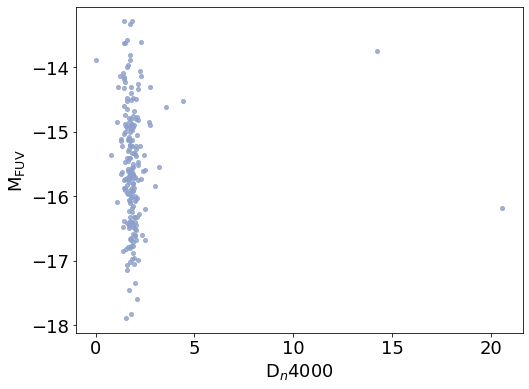

In [214]:
x115 = data_DN4000_uvupturn['D4000N']
y115 = data_DN4000_uvupturn['MAG_ABSOLUTE_FUV']

plt.plot(x115, y115, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel('D$_n$4000')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

In [215]:
plt.plot(np.log10(x115), y115, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log(\mathrm{D}_n4000)$')
plt.ylabel('M$_\mathrm{FUV}$')
plt.show()

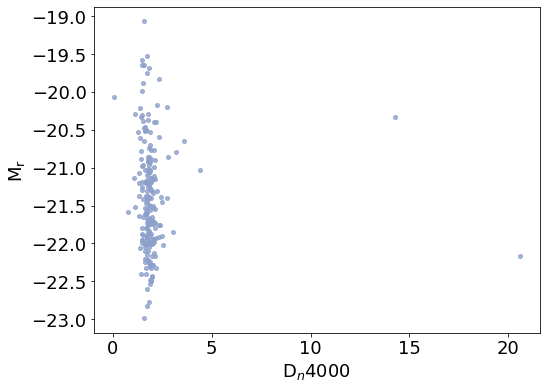

In [216]:
x116 = data_DN4000_uvupturn['D4000N']
y116 = data_DN4000_uvupturn['MAG_ABSOLUTE_R']

plt.plot(x116, y116, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel('D$_n$4000')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

In [217]:
plt.plot(np.log10(x116), y116, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
plt.xlabel(r'$\log(\mathrm{D}_n4000)$')
plt.ylabel('M$_\mathrm{r}$')
plt.show()

In [218]:
fig, ax = plt.subplots(nrows=6, ncols=6, figsize=(30,24))
plt.subplots_adjust(left=0.08, right=0.96, bottom=0.05, top=0.98)


ax[0,0].plot(np.log10(x81), y81, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[0,0].set_ylabel('NUV$-$r')
ax[1,0].plot(np.log10(x82), y82, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,0].set_ylabel('FUV$-$r')
ax[2,0].plot(np.log10(x83), y83, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,0].set_ylabel('FUV$-$NUV')
ax[3,0].plot(np.log10(x84), y84, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,0].set_ylabel('M$_\mathrm{NUV}$')
ax[4,0].plot(np.log10(x85), y85, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,0].set_ylabel('M$_\mathrm{FUV}$')
ax[5,0].plot(np.log10(x86), y86, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,0].set_ylabel('M$_\mathrm{r}$')
ax[5,0].set_xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')

ax[0,1].plot(np.log10(x87), y87, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,1].plot(np.log10(x88), y88, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,1].plot(np.log10(x89), y89, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,1].plot(np.log10(x90), y90, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,1].plot(np.log10(x91), y91, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,1].plot(np.log10(x92), y92, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,1].set_xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')

ax[0,2].plot(np.log10(x93), y93, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,2].plot(np.log10(x94), y94, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,2].plot(np.log10(x95), y95, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,2].plot(np.log10(x96), y96, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,2].plot(np.log10(x97), y97, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,2].plot(np.log10(x98), y98, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,2].set_xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')

ax[0,3].plot(np.log10(x99), y99, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,3].plot(np.log10(x100), y100, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,3].plot(np.log10(x101), y101, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,3].plot(np.log10(x102), y102, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,3].plot(np.log10(x103), y103, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,3].plot(np.log10(x104), y104, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,3].set_xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')

ax[0,4].plot(np.log10(x105), y105, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,4].plot(np.log10(x106), y106, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,4].plot(np.log10(x107), y107, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,4].plot(np.log10(x108), y108, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,4].plot(np.log10(x109), y109, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,4].plot(np.log10(x110), y110, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,4].set_xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')

ax[0,5].plot(np.log10(x111), y111, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,5].plot(np.log10(x112), y112, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,5].plot(np.log10(x113), y113, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,5].plot(np.log10(x114), y114, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,5].plot(np.log10(x115), y115, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,5].plot(np.log10(x116), y116, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,5].set_xlabel(r'$\log(\mathrm{D}_n4000)$')

fig.align_xlabels(ax[5, :])
fig.align_ylabels(ax[:, 0])

In [219]:
fig, ax = plt.subplots(nrows=6, ncols=6, figsize=(30,24))
plt.subplots_adjust(left=0.08, right=0.96, bottom=0.05, top=0.98)

ax[0,0].plot(np.log10(x81), y81, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[0,0].set_ylabel('NUV$-$r')
ax[1,0].plot(np.log10(x82), y82, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,0].set_ylabel('FUV$-$r')
ax[2,0].plot(np.log10(x83), y83, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,0].set_ylabel('FUV$-$NUV')
ax[3,0].plot(np.log10(x84), y84, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,0].set_ylabel('M$_\mathrm{NUV}$')
ax[4,0].plot(np.log10(x85), y85, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,0].set_ylabel('M$_\mathrm{FUV}$')
ax[5,0].plot(np.log10(x86), y86, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,0].set_ylabel('M$_\mathrm{r}$')
ax[5,0].set_xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')

ax[0,1].plot(np.log10(x87), y87, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,1].plot(np.log10(x88), y88, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,1].plot(np.log10(x89), y89, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,1].plot(np.log10(x90), y90, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,1].plot(np.log10(x91), y91, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,1].plot(np.log10(x92), y92, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,1].set_xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')

ax[0,2].plot(x93, y93, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,2].plot(x94, y94, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,2].plot(x95, y95, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,2].plot(x96, y96, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,2].plot(x97, y97, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,2].plot(x98, y98, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,2].set_xlabel(r'EW(H$\alpha$)')

ax[0,3].plot(x99, y99, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,3].plot(x100, y100, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,3].plot(x101, y101, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,3].plot(x102, y102, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,3].plot(x103, y103, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,3].plot(x104, y104, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,3].set_xlabel(r'EW(H$\beta$)')

ax[0,4].plot(np.log10(1/x105), y105, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,4].plot(np.log10(1/x106), y106, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,4].plot(np.log10(1/x107), y107, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,4].plot(np.log10(1/x108), y108, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,4].plot(np.log10(1/x109), y109, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,4].plot(np.log10(1/x110), y110, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,4].set_xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')

ax[0,5].plot(x111, y111, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,5].plot(x112, y112, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,5].plot(x113, y113, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,5].plot(x114, y114, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,5].plot(x115, y115, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,5].plot(x116, y116, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,5].set_xlabel('D$_n$4000')

fig.align_xlabels(ax[5, :])
fig.align_ylabels(ax[:, 0])

# Conjuncted

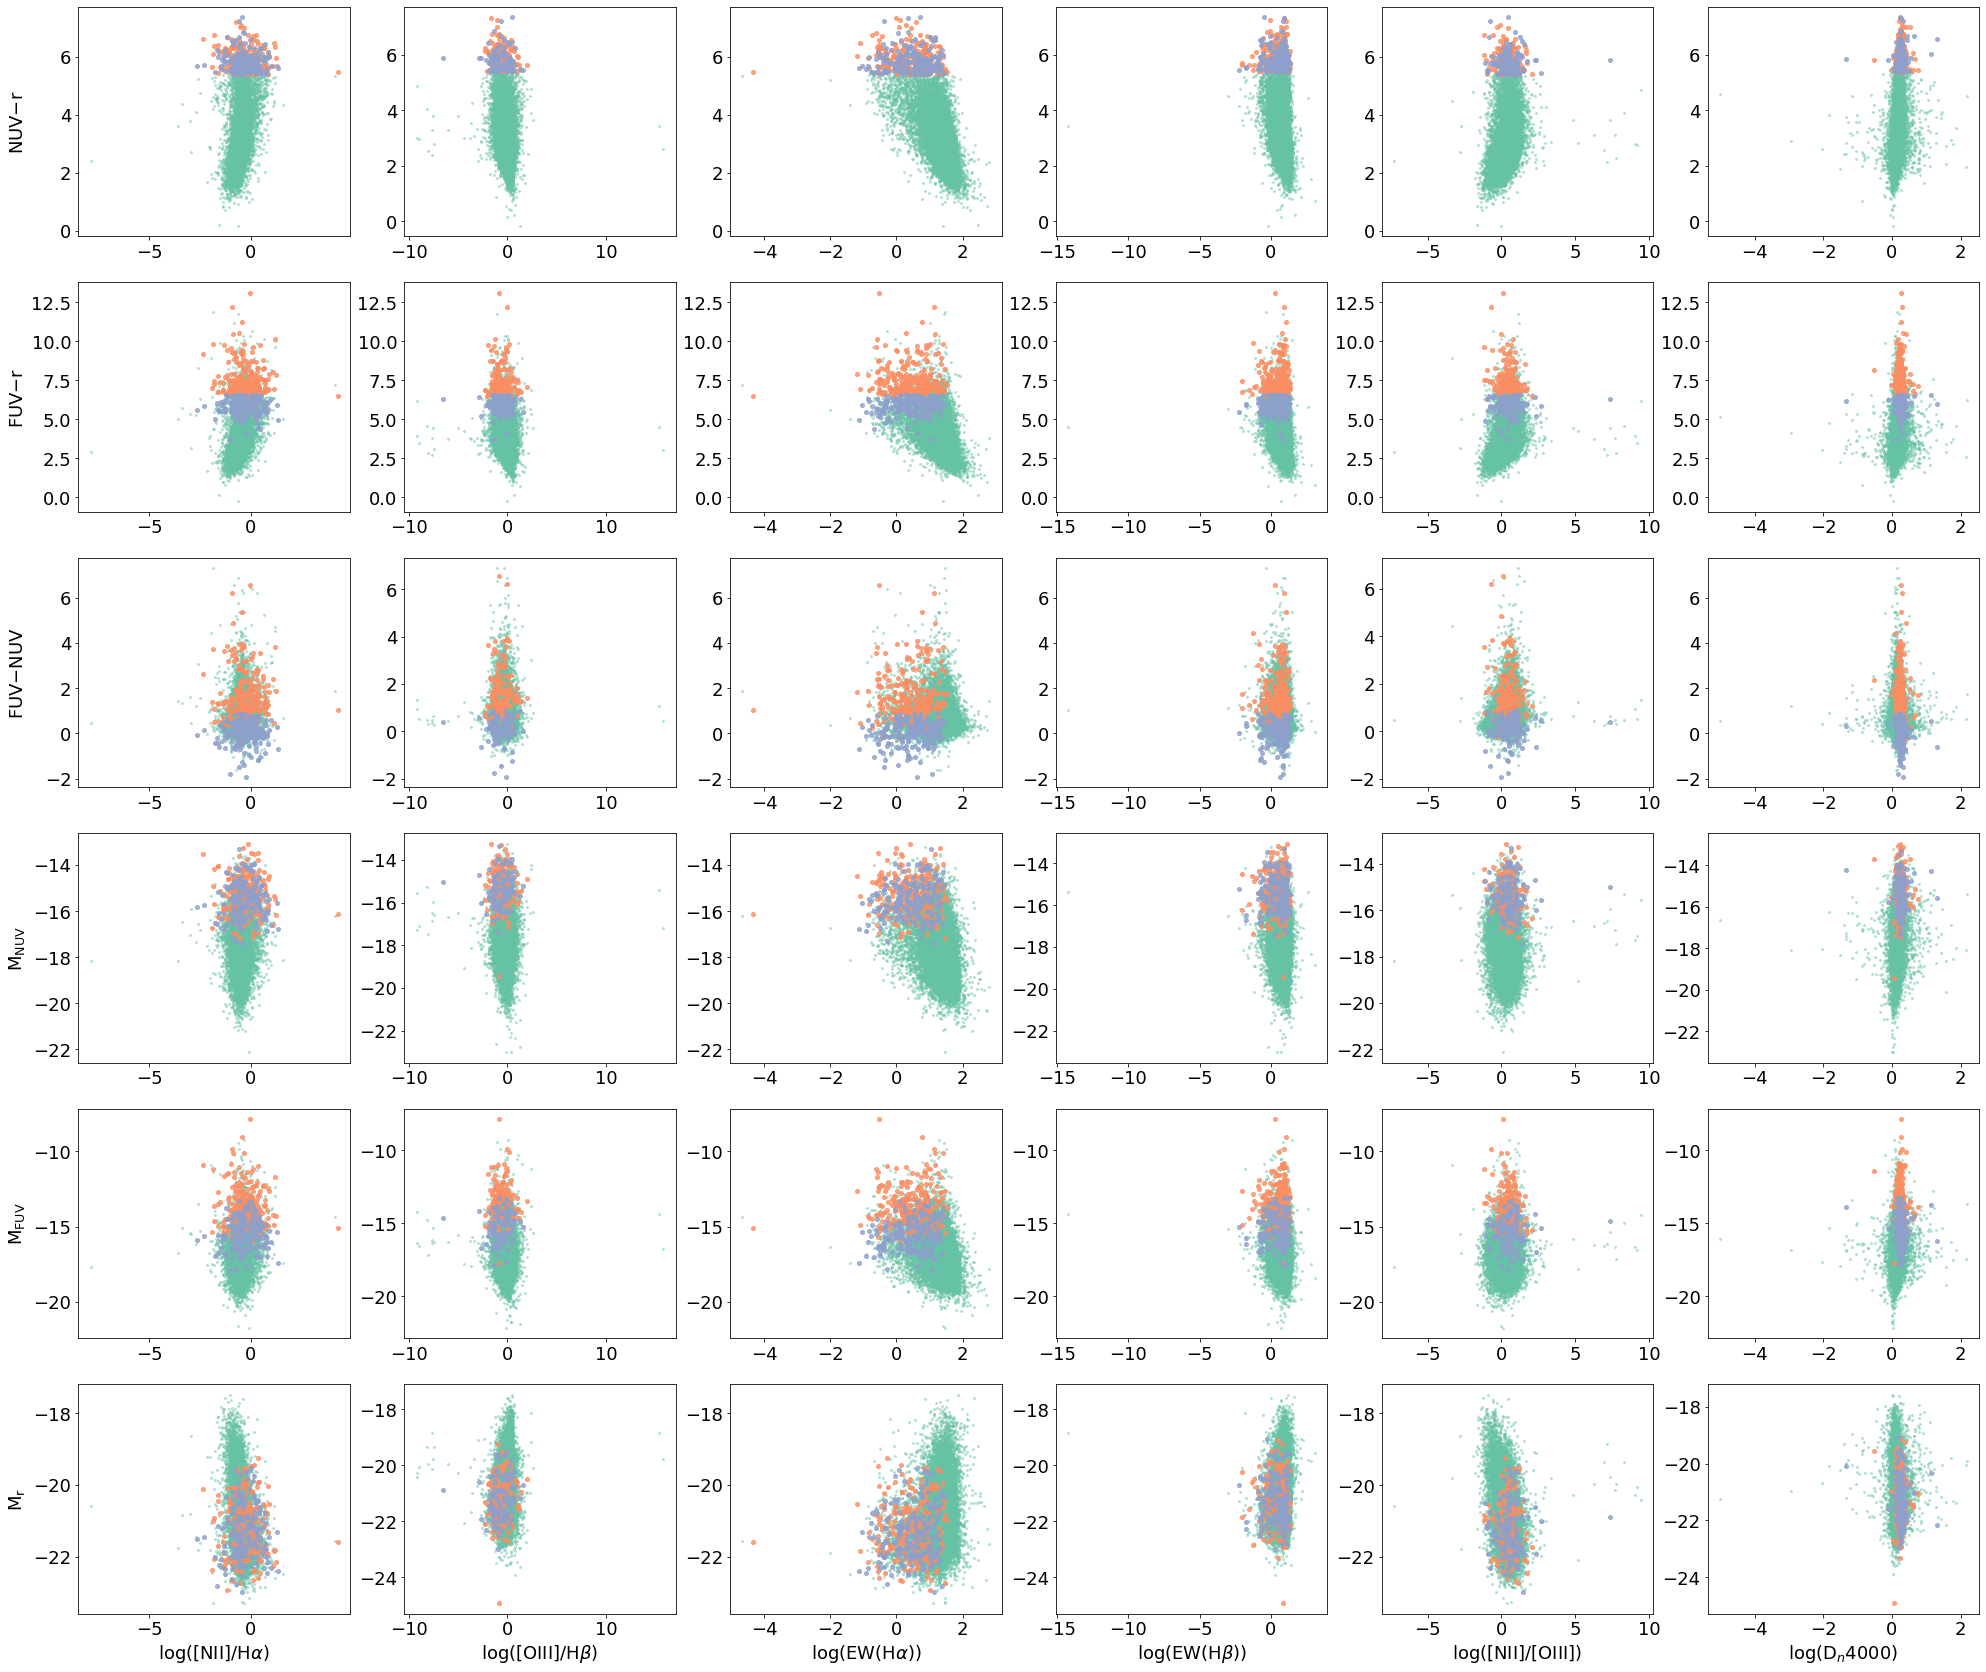

In [246]:
fig, ax = plt.subplots(nrows=6, ncols=6, figsize=(30,24))
plt.subplots_adjust(left=0.08, right=0.96, bottom=0.05, top=0.98)


ax[0,0].plot(np.log10(x9), y9, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[0,0].set_ylabel('NUV$-$r')
ax[1,0].plot(np.log10(x10), y10, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,0].set_ylabel('FUV$-$r')
ax[2,0].plot(np.log10(x11), y11, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,0].set_ylabel('FUV$-$NUV')
ax[3,0].plot(np.log10(x12), y12, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,0].set_ylabel('M$_\mathrm{NUV}$')
ax[4,0].plot(np.log10(x13), y13, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,0].set_ylabel('M$_\mathrm{FUV}$')
ax[5,0].plot(np.log10(x14), y14, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,0].set_ylabel('M$_\mathrm{r}$')
ax[5,0].set_xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')

ax[0,1].plot(np.log10(x15), y15, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,1].plot(np.log10(x16), y16, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,1].plot(np.log10(x17), y17, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,1].plot(np.log10(x18), y18, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,1].plot(np.log10(x19), y19, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,1].plot(np.log10(x20), y20, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,1].set_xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')

ax[0,2].plot(np.log10(x21), y21, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,2].plot(np.log10(x22), y22, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,2].plot(np.log10(x23), y23, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,2].plot(np.log10(x24), y24, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,2].plot(np.log10(x25), y25, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,2].plot(np.log10(x26), y26, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,2].set_xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')

ax[0,3].plot(np.log10(x27), y27, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,3].plot(np.log10(x28), y28, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,3].plot(np.log10(x29), y29, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,3].plot(np.log10(x30), y30, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,3].plot(np.log10(x31), y31, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,3].plot(np.log10(x32), y32, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,3].set_xlabel(r'$\log(\mathrm{EW}(\mathrm{H}\beta))$')

ax[0,4].plot(np.log10(x33), y33, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,4].plot(np.log10(x34), y34, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,4].plot(np.log10(x35), y35, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,4].plot(np.log10(x36), y36, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,4].plot(np.log10(x37), y37, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,4].plot(np.log10(x38), y38, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,4].set_xlabel(r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$')

ax[0,5].plot(np.log10(x39), y39, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,5].plot(np.log10(x40), y40, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,5].plot(np.log10(x41), y41, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,5].plot(np.log10(x42), y42, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,5].plot(np.log10(x43), y43, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,5].plot(np.log10(x44), y44, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,5].set_xlabel(r'$\log(\mathrm{D}_n4000)$')

ax[0,0].plot(np.log10(x45), y45, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,0].plot(np.log10(x46), y46, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,0].plot(np.log10(x47), y47, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,0].plot(np.log10(x48), y48, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,0].plot(np.log10(x49), y49, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,0].plot(np.log10(x50), y50, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])

ax[0,1].plot(np.log10(x51), y51, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,1].plot(np.log10(x52), y52, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,1].plot(np.log10(x53), y53, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,1].plot(np.log10(x54), y54, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,1].plot(np.log10(x55), y55, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,1].plot(np.log10(x56), y56, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])

ax[0,2].plot(np.log10(x57), y57, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,2].plot(np.log10(x58), y58, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,2].plot(np.log10(x59), y59, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,2].plot(np.log10(x60), y60, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,2].plot(np.log10(x61), y61, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,2].plot(np.log10(x62), y62, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])

ax[0,3].plot(np.log10(x63), y63, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,3].plot(np.log10(x64), y64, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,3].plot(np.log10(x65), y65, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,3].plot(np.log10(x66), y66, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,3].plot(np.log10(x67), y67, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,3].plot(np.log10(x68), y68, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])

ax[0,4].plot(np.log10(x69), y69, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,4].plot(np.log10(x70), y70, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,4].plot(np.log10(x71), y71, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,4].plot(np.log10(x72), y72, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,4].plot(np.log10(x73), y73, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,4].plot(np.log10(x74), y74, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])

ax[0,5].plot(np.log10(x75), y75, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,5].plot(np.log10(x76), y76, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,5].plot(np.log10(x77), y77, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,5].plot(np.log10(x78), y78, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,5].plot(np.log10(x79), y79, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,5].plot(np.log10(x80), y80, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])

ax[0,0].plot(np.log10(x81), y81, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,0].plot(np.log10(x82), y82, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,0].plot(np.log10(x83), y83, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,0].plot(np.log10(x84), y84, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,0].plot(np.log10(x85), y85, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,0].plot(np.log10(x86), y86, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])

ax[0,1].plot(np.log10(x87), y87, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,1].plot(np.log10(x88), y88, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,1].plot(np.log10(x89), y89, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,1].plot(np.log10(x90), y90, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,1].plot(np.log10(x91), y91, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,1].plot(np.log10(x92), y92, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])

ax[0,2].plot(np.log10(x93), y93, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,2].plot(np.log10(x94), y94, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,2].plot(np.log10(x95), y95, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,2].plot(np.log10(x96), y96, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,2].plot(np.log10(x97), y97, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,2].plot(np.log10(x98), y98, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])

ax[0,3].plot(np.log10(x99), y99, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,3].plot(np.log10(x100), y100, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,3].plot(np.log10(x101), y101, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,3].plot(np.log10(x102), y102, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,3].plot(np.log10(x103), y103, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,3].plot(np.log10(x104), y104, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])

ax[0,4].plot(np.log10(x105), y105, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,4].plot(np.log10(x106), y106, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,4].plot(np.log10(x107), y107, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,4].plot(np.log10(x108), y108, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,4].plot(np.log10(x109), y109, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,4].plot(np.log10(x110), y110, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])

ax[0,5].plot(np.log10(x111), y111, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,5].plot(np.log10(x112), y112, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,5].plot(np.log10(x113), y113, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,5].plot(np.log10(x114), y114, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,5].plot(np.log10(x115), y115, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,5].plot(np.log10(x116), y116, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])

fig.align_xlabels(ax[5, :])
fig.align_ylabels(ax[:, 0])

plt.savefig('parameters.jpg', dpi=100)

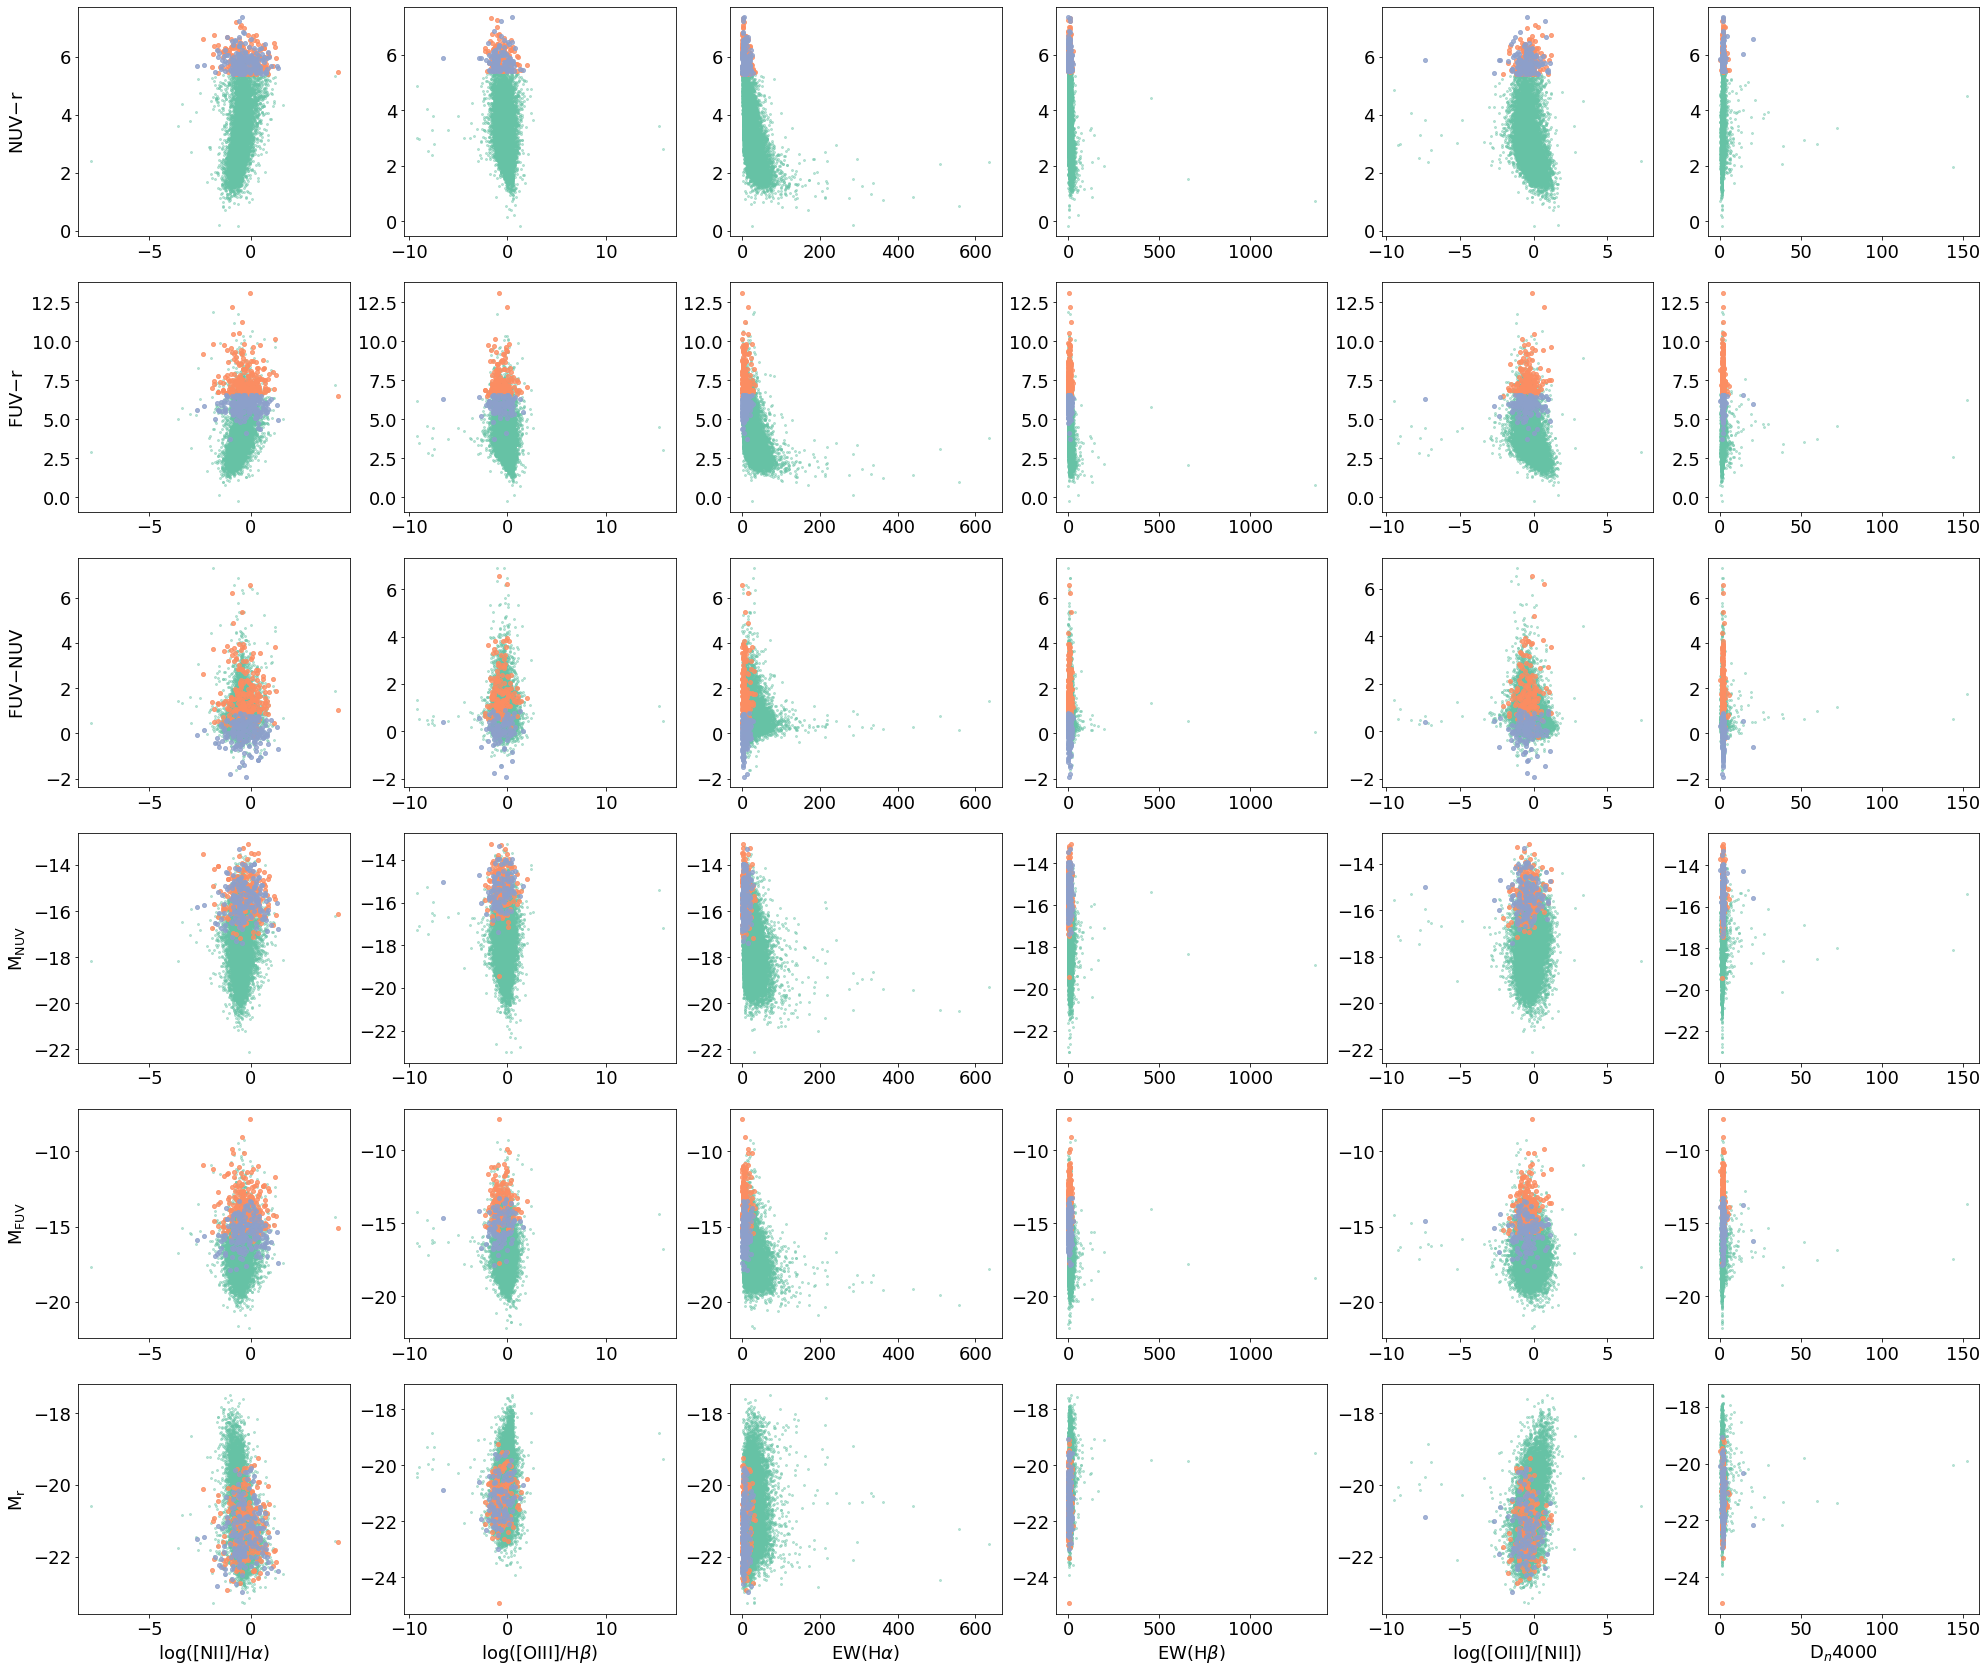

In [221]:
fig, ax = plt.subplots(nrows=6, ncols=6, figsize=(30,24))
plt.subplots_adjust(left=0.08, right=0.96, bottom=0.05, top=0.98)


ax[0,0].plot(np.log10(x9), y9, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[0,0].set_ylabel('NUV$-$r')
ax[1,0].plot(np.log10(x10), y10, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,0].set_ylabel('FUV$-$r')
ax[2,0].plot(np.log10(x11), y11, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,0].set_ylabel('FUV$-$NUV')
ax[3,0].plot(np.log10(x12), y12, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,0].set_ylabel('M$_\mathrm{NUV}$')
ax[4,0].plot(np.log10(x13), y13, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,0].set_ylabel('M$_\mathrm{FUV}$')
ax[5,0].plot(np.log10(x14), y14, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,0].set_ylabel('M$_\mathrm{r}$')
ax[5,0].set_xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')

ax[0,1].plot(np.log10(x15), y15, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,1].plot(np.log10(x16), y16, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,1].plot(np.log10(x17), y17, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,1].plot(np.log10(x18), y18, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,1].plot(np.log10(x19), y19, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,1].plot(np.log10(x20), y20, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,1].set_xlabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')

ax[0,2].plot(x21, y21, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,2].plot(x22, y22, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,2].plot(x23, y23, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,2].plot(x24, y24, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,2].plot(x25, y25, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,2].plot(x26, y26, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,2].set_xlabel(r'EW(H$\alpha$)')

ax[0,3].plot(x27, y27, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,3].plot(x28, y28, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,3].plot(x29, y29, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,3].plot(x30, y30, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,3].plot(x31, y31, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,3].plot(x32, y32, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,3].set_xlabel(r'EW(H$\beta$)')

ax[0,4].plot(np.log10(1/x33), y33, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,4].plot(np.log10(1/x34), y34, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,4].plot(np.log10(1/x35), y35, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,4].plot(np.log10(1/x36), y36, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,4].plot(np.log10(1/x37), y37, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,4].plot(np.log10(1/x38), y38, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,4].set_xlabel(r'$\log([\mathrm{OIII}]/[\mathrm{NII}])$')

ax[0,5].plot(x39, y39, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[1,5].plot(x40, y40, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[2,5].plot(x41, y41, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[3,5].plot(x42, y42, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[4,5].plot(x43, y43, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,5].plot(x44, y44, ls='', marker='o', markersize=2, alpha=0.4, c=palette[0])
ax[5,5].set_xlabel('D$_n$4000')

ax[0,0].plot(np.log10(x45), y45, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,0].plot(np.log10(x46), y46, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,0].plot(np.log10(x47), y47, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,0].plot(np.log10(x48), y48, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,0].plot(np.log10(x49), y49, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,0].plot(np.log10(x50), y50, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])

ax[0,1].plot(np.log10(x51), y51, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,1].plot(np.log10(x52), y52, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,1].plot(np.log10(x53), y53, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,1].plot(np.log10(x54), y54, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,1].plot(np.log10(x55), y55, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,1].plot(np.log10(x56), y56, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])

ax[0,2].plot(x57, y57, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,2].plot(x58, y58, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,2].plot(x59, y59, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,2].plot(x60, y60, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,2].plot(x61, y61, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,2].plot(x62, y62, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])

ax[0,3].plot(x63, y63, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,3].plot(x64, y64, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,3].plot(x65, y65, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,3].plot(x66, y66, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,3].plot(x67, y67, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,3].plot(x68, y68, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])

ax[0,4].plot(np.log10(1/x69), y69, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,4].plot(np.log10(1/x70), y70, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,4].plot(np.log10(1/x71), y71, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,4].plot(np.log10(1/x72), y72, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,4].plot(np.log10(1/x73), y73, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,4].plot(np.log10(1/x74), y74, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])

ax[0,5].plot(x75, y75, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[1,5].plot(x76, y76, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[2,5].plot(x77, y77, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[3,5].plot(x78, y78, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[4,5].plot(x79, y79, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])
ax[5,5].plot(x80, y80, ls='', marker='o', markersize=4, alpha=0.8, c=palette[1])

ax[0,0].plot(np.log10(x81), y81, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,0].plot(np.log10(x82), y82, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,0].plot(np.log10(x83), y83, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,0].plot(np.log10(x84), y84, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,0].plot(np.log10(x85), y85, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,0].plot(np.log10(x86), y86, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])

ax[0,1].plot(np.log10(x87), y87, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,1].plot(np.log10(x88), y88, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,1].plot(np.log10(x89), y89, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,1].plot(np.log10(x90), y90, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,1].plot(np.log10(x91), y91, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,1].plot(np.log10(x92), y92, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])

ax[0,2].plot(x93, y93, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,2].plot(x94, y94, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,2].plot(x95, y95, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,2].plot(x96, y96, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,2].plot(x97, y97, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,2].plot(x98, y98, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])

ax[0,3].plot(x99, y99, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,3].plot(x100, y100, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,3].plot(x101, y101, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,3].plot(x102, y102, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,3].plot(x103, y103, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,3].plot(x104, y104, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])

ax[0,4].plot(np.log10(1/x105), y105, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,4].plot(np.log10(1/x106), y106, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,4].plot(np.log10(1/x107), y107, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,4].plot(np.log10(1/x108), y108, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,4].plot(np.log10(1/x109), y109, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,4].plot(np.log10(1/x110), y110, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])

ax[0,5].plot(x111, y111, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[1,5].plot(x112, y112, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[2,5].plot(x113, y113, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[3,5].plot(x114, y114, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[4,5].plot(x115, y115, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])
ax[5,5].plot(x116, y116, ls='', marker='o', markersize=4, alpha=0.8, c=palette[2])

fig.align_xlabels(ax[5, :])
fig.align_ylabels(ax[:, 0])